# Welcome to 511 keV imaging with cosipy classic
In this notebook, we'll use a Richardson-Lucy deconvolution algorithm to image 511 keV emission from the center of the Milky Way Galaxy. As MeV gamma-ray instruments, COSI-balloon and the COSI satellite are uniquely equipped to study this signal, which traces one of the biggest unsolved mysteries in gamma-ray astrophysics. 

For context, a strong 511 keV signal emanating from the direction of the Galactic Center ($\ell = 0^{\circ}, b = 0^{\circ}$) was first discovered in the 1970s on a series of balloon missions [(Johnson III et al. 1972,](https://adsabs.harvard.edu/full/1972ApJ...172L...1J?TB_iframe=true&width=370.8&height=658.8) [ Leventhal et al. 1978,](https://adsabs.harvard.edu/full/record/seri/ApJ../0225/1978ApJ...225L..11L.html) [ Johnson III & Haymes 1973,](https://adsabs.harvard.edu/pdf/1973ApJ...184..103J) [ Haymes et al. 1975,](https://adsabs.harvard.edu/full/record/seri/ApJ../0201/1975ApJ...201..593H.html) [ Ling et al. 1977,](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JA082i010p01463) [ Albernhe et al. 1981)](https://adsabs.harvard.edu/pdf/1981A%26A....94..214A). Despite decades of observation since the initial measurements, several questions remain regarding the nature of this abundant **positron-electron annihilation**. 

1. What is the underlying nature of the emission morphology?

The 511 keV image from the INTEGRAL SPI satellite ([Bouchet et al. 2010](https://iopscience.iop.org/article/10.1088/0004-637X/720/2/1772/meta), shown below as a significance map) reveals two seemingly distinct components: an extended "disk" which traces the Galactic Plane and a central, bright "bulge" around the Galactic Center. The notable difference between these structures is not understood. The extended disk emission may suggest that positrons are propogating away from and annihilating at a distance from their production sites, thereby smearing out the emission into a diffuse presentation. It is also possible, however, that there could be a collection of point-like sources emitting positrons which annihilate close to their progenitors; it is the collection of these sources together which may form a total diffuse structure. However, no point source of positrons has been detected. It is likely that positrons propogate away from their production sites and slow down to low enough energies to form positronium.

Imaging with fine angular resolution can help disentangle this dichotomy. The detection of an individual point source, for example, could revolutionize our understanding of the morphology. High-resolution spectroscopy is also critical to understanding the transport and eventual annihilation sites of these positrons: a significant ortho-Positronum (o-Ps; $\leq 511$ keV) component of the spectrum would suggest annihilation in colder regions of the interstellar medium (ISM). A stronger signature at the line energy of 511 keV (para-Positronium, p-Ps) indicates annhilation in warmer regions of the ISM. Data from SPI currently favor the latter scenario, though additional measurements of this o-Ps to p-Ps fraction are necessary.

![SPI 511 keV image (Bouchet et al. 2010)](Bouchet_2010_SPI_511keV.png)


2. Where are all of these positrons coming from?

The bulge emission exhibits a positron annihilation rate of $10^{43} e^+ s^{-1}$. Positrons from the $\beta^+$ decay of nucleosynthesis products may account for the $\sim 10^{42} e^+ s^{-1}$ in the disk and some of the bulge, but the origin of the remaining postirons in the bulge is unknown. Important to note is that there is no lack of potential positron sources; rather, there are too many possible sources to explain the emission! Positrons are readily created in a wide variety of astrophysical objects and processes. Stellar flares, massive stars, supernovae (core-collapse and Type Ia), classical novae, and neutron star mergers all synthesis radioactive isotopes which can $\beta^+$ decay. Secondary interactions with cosmic rays produce positrons, positrons are created through pair creation channels in strong photon and magnetic fields, evaporating black holes may potentially produce positrons, dark matter density profiles may trace positron annihilation,...and more. 

Ultimately, we can boil the "positron puzzle" down to uncertainty around the *source, transport, and sink* (the annihilation itself) of these particles. 

The COSI-balloon flight in 2016 detected the 511 keV signature of the positron puzzle with $7.2\sigma$ significance [(Kierans et al. 2020)](https://iopscience.iop.org/article/10.3847/1538-4357/ab89a9/meta). It also clearly imaged the bright bulge emission near the Galactic Center [(Siegert et al. 2020)](https://iopscience.iop.org/article/10.3847/1538-4357/ab9607/meta). Both measurements are consistent with those from SPI and indicate additional extended emission. 

In this notebook, you will image the Galactic 511 keV emission, simulated at 10X its true flux (10X flux = $1.1 \times 10^{-2}$ ph cm$^{-2}$ s$^{-1}$) for robust statistics, as seen during the COSI-balloon flight in 2016. You should expect to see the bright bulge emission near the Galactic Center (but not the disk emission, which is too weak for COSI-balloon to see during its 46-day flight; SPI was able to detect the disk's $\sim 1$ ph/week with over a decade of observation time).

# Setup

## Check to make sure you're in the python environment you configured for COSI

In [1]:
!which python

/home/jacqueline/.virtualenvs/python3-virt/bin/python


## Import packages
We'll need functions from COSIpy "classic," including those in COSIpy.py and response.py

We also need some other standard Python packages.

In [2]:
from COSIpy import *
import response
from COSIpy_tools import *

import pickle
import pystan


Welcome to JupyROOT 6.24/06


/home/jacqueline/MEGAlib/external/root_v6.24.06/lib/ROOT/_facade.py:150: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  return _orig_ihook(name, *args, **kwds)


# Load the data

## Define the path to your simulations

In [3]:
data_dir = '/home/jacqueline/COSItools/cosi-data-challenge-1/data_products'


## Enter the file name of the simulation to be imaged
This file contains the 10X flux 511 keV simulation and Ling BG. 

You can optionally image only 511 keV (without background) by changing this file to **insert file name of 511-only simulation.** You will have to adjust the RL algorithm parameters later in the notebook.

In [4]:
# 511 keV with Ling BG
tra = 'GC511_10xFlux_and_Ling.inc1.id1.extracted.tra.gz'


## Create the main cosipy "analysis1" object, which provides various functionalities to study the specified file.

In [5]:
analysis1 = COSIpy(data_dir, tra)


## Read the file. This could take a few minutes to run.

In [6]:
analysis1.read_COSI_DataSet()


# Bin the data and generate the light curve and energy spectrum.

## Bin the data in time. 
The COSI-balloon instrument freely floated on the balloon platform. This means that, unlike a space or ground-based telescope with well-defined pointings and slewing schedule, its orientation was largely dependent on the unconstrained path of the balloon. It was a zenith-pointing instrument, meaning that its vertical orientation pointed straight above the hanging instrument, towards the balloon above it.

The exception to this freedom is that during the day time, COSI's azimuthal orientation was fixed such that its solar panels remained oriented facing the Sun. At nighttime, though, the instrument freely rotated about its azimuth. 

This is all to say that COSI's orientation (e.g. roll/pitch/yaw) changed rapidly during flight. As such, we might prefer to bin the data into very small (~seconds) time bins to preserve an accurate orientation of the instrument tied to the data. However, this would require massive computational resources. Also, time bins which are too small may contain too few photons for meaningful analysis. 

Through extensive testing, **1800 second** (30 minute) time bins were found to strike a practical balance between a sufficiently precise treatment of instrument orientation and computational means. 

You can feel free to play with the time binning. You may choose to decrease the size to 900 s, or increase it to 3600 s, for example, to see if there's an effect on the image (e.g. does it look less/more blurred, respectively, as you lump more data into more/fewer time bins?)

You can also manually define time bins as an array of time stamps.

In [7]:
# Define time bins of equal width "Delta_T"
# You can change Delta_T, though keep in mind that making it too small could use too much memory!! 
Delta_T = 1800 # s
analysis1.dataset.time_binning_tags(time_bin_size=Delta_T)

# Or, manually define time bins by time stamps. For example,
# time_bin_edges_trunc = np.arange(min(times), max(times)-86400, Delta_T)
# print(time_bin_edges_trunc)
# print(time_bin_edges_trunc[-2], time_bin_edges_trunc[-1], '\n')
# analysis1.dataset.time_binning_tags_2(time_bin_edges_trunc)


## Bin the data in energy.
Define the energy bins exactly as they are defined in the response. 

For positron-electron annihilation keV, we use a response simulation with only one energy bin around the 511 keV signature: **501-521 keV**.


In [8]:
# definition of energy bins (same as the response)
energy_bin_edges = np.array([501, 521])

energy_bin_edges

array([501, 521])

## Define the size of pixels in the sky.
As with the energy binning, the pixel size here must match that of the response. The responses that have been simulated for COSI-balloon assume $6^{\circ} \times 6^{\circ}$ resolution.

In [9]:
pixel_size = 6.


## Initiate the binning and bin the data.
Calling "get_binned_data()" may take several minutes, depending on the size of the dataset and the number of bins. Keep an eye on memory here: if your time bins are very small, for example, this could be an expensive operation.

As currently written, "get_binned_data()" uses about 4 GB memory.

In [10]:
# initiate the binning
analysis1.dataset.init_binning(energy_bin_edges=energy_bin_edges, pixel_size=pixel_size)


In [11]:
# bin data
analysis1.dataset.get_binned_data()


## Examine the shape of the binned data.
The binned data are contained in "analysis1.dataset.binned_data." This is a 4-dimensional object: \
(time, energy, $\phi$, FISBEL)

The number of bins in each dimension are shown by calling "shape."

Per the binning definitions above, there are 365 time bins, 10 energy bins (as governed by those in the response), 30 $\phi$ bins ($\phi$ is the Compton scattering angle; 30 bins of $6^{\circ}$ spanning the full $0-180^{\circ}$ range of possible Compton scattering angles), and 1145 FISBEL bins. 

FISBEL is a unique index which specifies the $\chi$ and $\psi$ dimensions of the Compton Data Space (CDS), whose third dimension is $\phi$. The $\chi$ and $\psi$ dimensions specify the direction of the scattered photon in a Compton interaction. 

How do we end up with 1145 FISBEL bins? Consider a sphere which is $4 \pi( 180^{\circ}/ \pi)^2 = 41252.96 \textrm{ deg}^{2}$ \
Given our $6 \textrm{ deg}^{2}$ binning, we have $41252.96 \textrm{ deg}^{2}$ / $6 \textrm{ deg}^{2}$ $\sim$ 1145 bins.

In [12]:
print("time, energy, phi, fisbel")
print(analysis1.dataset.binned_data.shape)


time, energy, phi, fisbel
(2240, 1, 30, 1145)


In [13]:
# Can print the number of time bins, the width of each time bin, and the total time
print(analysis1.dataset.times.n_time_bins)
print(analysis1.dataset.times.times_wid)
print(analysis1.dataset.times.total_time)

2240
[900.         900.         900.         ... 900.         900.
 898.27507758]
4031996.550155163


## To get a lightcurve, we integrate over all energies and the entire CDS ($\phi$ + FISBEL). In python, this is a sum over the latter three dimensions of the binned_data object, i.e. everything except time.

In [14]:
# summing over energy, phi and fisbel. Everything except the time axis
binned_counts = np.sum(analysis1.dataset.binned_data, axis=(1, 2, 3))

print(f'Number of counts: {np.sum(binned_counts)}')

Number of counts: 222824.0


In [15]:
n_time_bins = analysis1.dataset.binned_data.shape[0]
print(f'Number of time bins: {n_time_bins}')

Number of time bins: 2240


In [16]:
analysis1.dataset.n_time_bins

2240

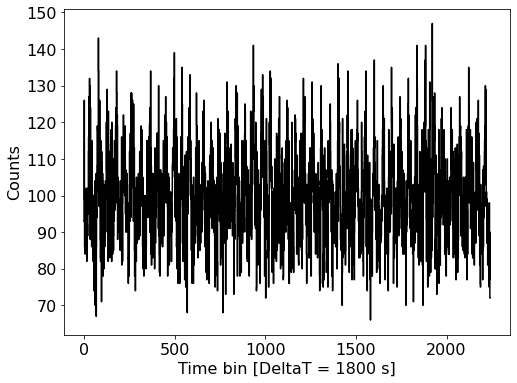

In [17]:
# lightcurve
plt.step(np.arange(n_time_bins), binned_counts, where='mid', color='k')

plt.xlabel(f'Time bin [DeltaT = {Delta_T} s]')
plt.ylabel('Counts');

## We can plot the energy spectrum directly from the cosipy analysis object.
For a single energy bin, the spectrum is necessarily a top hat in the sole non-zero bin.

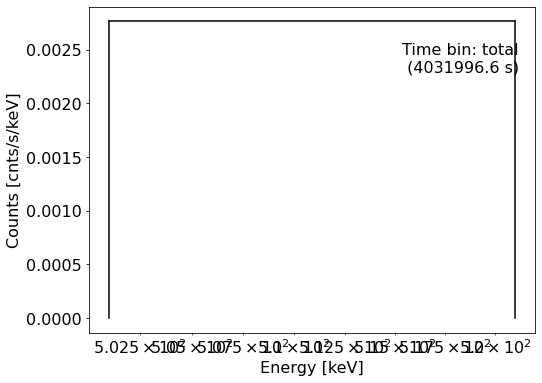

In [18]:
analysis1.dataset.plot_raw_spectrum()
plt.xscale('log')

# Define the pointing object with the cosipy pointing class.
This may also take several minutes to run.

In [19]:
# definition of poitings (balloon stability + Earth rotation)
pointing1 = Pointing(dataset=analysis1.dataset,)

# Define the BG model. 
We model the background using extensive simulations of Earth's atmospheric $\gamma$-ray background. The simulations assume the Ling model of atmospheric $\gamma$-ray emission ([Ling 1975](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JA080i022p03241), which is often adopted for this purpose in MeV $\gamma$-ray astrophysics experiments.

The simulations use an accurate mass model of the COSI-balloon instrument during flight and follow the true orientation of the instrument as it traveled along its flight path.

Notably, this background model excludes the significant background from instrumental activation. Instrumental activation refers to the excitation of instrument materials by bombarding high-energy particles, e.g. cosmic rays. The instrument materials subsequently de-excite via the emission of $\gamma$-rays which fall in COSI's energy bandpass. Often, the de-excitation lines exactly overlap with astrophysical lines of interest, including 511 keV and 1809 keV. 

A complete treatment of the background, therefore, would include both atmospheric and instrumental activation simulations. For simplicity, however, in this imaging tutorial we model only atmospheric background. Future data challenges will include instrumental activation.

In [20]:
# Ling BG simulation to model atmospheric background
background1 = BG(dataset=analysis1.dataset,
                mode='from file',
                filename='/home/jacqueline/COSItools/cosi-data-challenge-1/data_products/Scaled_Ling_BG_1x.npz')


Using background mode: from file


# Read in the response.

In [21]:
# 511 keV response
rsp = response.SkyResponse(
   filename='/home/jacqueline/COSItools/cosi-data-challenge-1/data_products/511keV_imaging_response.npz', pixel_size=pixel_size)


Reading complete continuum response. This might take a while...
Done.

You probably used a line response, there is no RMF.
If not, think again.
Done.

Creating general IRF. Wait for it...
Done.

Deleting full matrix.
Done. Now have fun.


## The shape of the response spans (Galactic latitude $b$, Galactic longitude $\ell$, Compton scattering angle $\phi$,  FISBEL, energy).

The size of each dimension depends on the chosen pixel size. Here, we've chosen $6^{\circ}$ pixels. 

Galactic latitude $b \in [-90^{\circ}, 90^{\circ}] \rightarrow$ 30 bins.\
Galactic longitude $\ell \in [-180^{\circ}, 180^{\circ}] \rightarrow$ 60 bins.\
Compton scattering angle $\phi \in [0^{\circ}, 180^{\circ}] \rightarrow$ 30 bins ("analysis1.dataset.phis.n_phi_bins").\
See above for explanation of 1145 FISBEL bins ("rsp.rsp.n_fisbel_bins").\
There is 1 energy bin in the 1809 keV response ("analysis1.dataset.energies.n_energy_bins"). This is why there is no fifth dimension for energy printed below. When using the continuum response (see point source imaging notebook), which has 10 energy bins, this cell prints (30, 60, 30, 1145, 10).

In [22]:
rsp.rsp.response_grid_normed_efinal.shape

(30, 60, 30, 1145)

## The shape of the data and background objects span (time, Galactic latitude $b$, Galactic longitude $\ell$, FISBEL).

Given the time bin size "Delta_T" which we defined at the beginning of the notebook, there are 2242 time bins.

In [23]:
np.shape(analysis1.dataset.binned_data)

(2240, 1, 30, 1145)

In [24]:
np.shape(background1.bg_model)

(2240, 1, 30, 1145)

## Truncate the response at $90^{\circ}$. 
As discussed above, COSI's field of view extends $60^{\circ}$ beyond its zenith. The data/simulations themselves, however, only have hard cut manually applied at $90^{\circ}$: this is the Earth Horizon Cut (EHC). The EHC is applied to the data in order to remove background $\gamma$-ray emanating from the Earth's atmosphere below the instrument. 

To preserve any photons which may scatter in just beyond COSI's nominal $60^{\circ}$ field of view but not beyond the $90^{\circ}$ EHC, we define a "cut" which trucates, i.e. zeroes out, the response at $90^{\circ}$. 

Note that because the EHC has removed all photons beyond $90^{\circ}$, setting the cut to a value greater than $90^{\circ}$ will behave identically to cut = $90^{\circ}$.

In [25]:
cut = 90

# Choose an energy bin to analyze.
We only have one energy bin (501-521 keV), so the index is necessarily 0.

In [26]:
ebin = 0 

# Define a grid on the sky to make images

In [27]:
# Convenient variable for deg --> radian conversion
deg2rad = np.pi/180.

# We define our sky-grid on a regular (pixel_size x pixel_size) grid for testing (later finer grid)
binsize = pixel_size

# Galactic coordiantes: l and b pixel edges
l_arrg = np.linspace(-180, 180, int(360/binsize)+1)
b_arrg = np.linspace(-90, 90, int(180/binsize)+1)

# Number of pixels in l and b
n_l = int(360/binsize)
n_b = int(180/binsize)

# Making a grid
L_ARRg, B_ARRg = np.meshgrid(l_arrg, b_arrg)

# Choosing the centre points as representative
l_arr = l_arrg[0:-1] + binsize/2
b_arr = b_arrg[0:-1] + binsize/2
L_ARR, B_ARR = np.meshgrid(l_arr, b_arr)

# Define solid angle for each pixel for normalisations later
domega = (binsize*deg2rad)*(np.sin(np.deg2rad(B_ARR + binsize/2)) - np.sin(np.deg2rad(B_ARR - binsize/2)))

## Convert sky grid to zenith/azimuth pairs for all pointings:

In [28]:
# calculate the zeniths and azimuths on that grid for all times
# zensgrid,azisgrid = zenaziGrid(pointing1.xpoins[:, 0], pointing1.xpoins[:, 1],
#                                pointing1.ypoins[:, 0], pointing1.ypoins[:, 1],
#                                pointing1.zpoins[:, 0], pointing1.zpoins[:, 1],
#                                L_ARR.ravel(), B_ARR.ravel())

#### 4/20/22: cosipy is rotating the source position with the above lines? don't understand...the crab
# was in the right place...
zensgrid,azisgrid = zenaziGrid(pointing1.ypoins[:,0], pointing1.ypoins[:,1],
                               pointing1.xpoins[:,0], pointing1.xpoins[:,1],
                               pointing1.zpoins[:,0], pointing1.zpoins[:,1],
                               L_ARR.ravel(), B_ARR.ravel())

In [29]:
# Reshape for next routines ... 
zensgrid = zensgrid.reshape(n_b, n_l, len(pointing1.xpoins))
azisgrid = azisgrid.reshape(n_b, n_l, len(pointing1.xpoins))

## Getting the observation indices where we actually have measured photons (important for later)

In [30]:
nonzero_idx = background1.calc_this[ebin]


## Function to get the response of an image for arbitrary time binning

In [31]:
def get_image_response_from_pixelhit_general(Response,zenith,azimuth,dt,n_hours,binsize=6,cut=60,altitude_correction=False,al=None):
    """
    Get Compton response from hit pixel for each zenith/azimuth vector(!) input.
    Binsize determines regular(!!!) sky coordinate grid in degrees.

    :param: zenith        Zenith positions of all points of predefined sky grid with
                          respect to the instrument (in deg)
    :param: azimuth       Azimuth positions of all points of predefined sky grid with
                          respect to the instrument (in deg)
    :option: binsize      Default 5 deg (matching the sky dimension of the response). If set
                          differently, make sure it matches the sky dimension as otherwise,
                          false results may be returned
    :option: cut          Threshold to cut the response calculation after a certain zenith angle.
                          Default 60
    :param: n_hours       Number of hours in cdxervation
    :option: altitude_correction Default False: use interpolated transmission probability, normalised to 33 km and 500 keV,
                          to modify number of expected photons as a function of altitude and zenith angle of cdxervation
    :option: al           Altitude values according to dt from construct_pointings(); used of altitude_correction is set to True
    """

    # assuming useful input:
    # azimuthal angle is periodic in the range [0,360[
    # zenith ranges from [0,180[

    # check which pixel (index) was hit on regular grid
    hit_pixel_zi = np.floor(zenith/binsize)
    hit_pixel_ai = np.floor(azimuth/binsize)

    # and which pixel centre
    hit_pixel_z = (hit_pixel_zi+0.5)*binsize
    hit_pixel_a = (hit_pixel_ai+0.5)*binsize

    # check which zeniths are beyond threshold
    bad_idx = np.where(hit_pixel_z > cut)

    # set hit pixels to output array
    za_idx = np.array([hit_pixel_zi,hit_pixel_ai]).astype(int)

    nz = zenith.shape[2]

    n_lon = int(360/binsize)
    n_lat = int(180/binsize)
    
    l_arrg = np.linspace(-180,180,int(360/binsize)+1)
    b_arrg = np.linspace(-90,90,int(180/binsize)+1)
    L_ARRg, B_ARRg = np.meshgrid(l_arrg,b_arrg)
    l_arr = l_arrg[0:-1]+binsize/2
    b_arr = b_arrg[0:-1]+binsize/2
    L_ARR, B_ARR = np.meshgrid(l_arr,b_arr)

    # take care of regular grid by applying weighting with latitude
    weights = ((binsize*np.pi/180)*(np.sin(np.deg2rad(B_ARR+binsize/2)) - np.sin(np.deg2rad(B_ARR-binsize/2)))).repeat(nz).reshape(n_lat,n_lon,nz)
    weights[bad_idx] = 0

    
    # check for negative weights and indices and remove
    weights[za_idx[0,:] < 0] = 0.
    weights[za_idx[1,:] < 0] = 0.
    za_idx[0,za_idx[0,:] < 0] = 0.
    za_idx[1,za_idx[1,:] < 0] = 0.
        
    
    if altitude_correction == True:
        altitude_response = return_altitude_response()
    else:
        altitude_response = one_func

    # get responses at pixels    
    image_response = np.zeros((n_hours,n_lat,n_lon,Response.shape[2]))

    for c in tqdm(range(n_hours)):
        cdx = np.where((pointing1.cdtpoins > analysis1.dataset.times.times_min[analysis1.dataset.times.n_ph_dx[c]]) &
                       (pointing1.cdtpoins <= analysis1.dataset.times.times_max[analysis1.dataset.times.n_ph_dx[c]]))[0]
    
        # this calculation is basically a look-up of the response entries. In general, weighting (integration) with the true shape can be introduced, however with a lot more computation time (Simpson's rule in 2D ...)
        image_response[c,:,:,:] += np.sum(Response[za_idx[0,:,:,cdx],za_idx[1,:,:,cdx],:]*np.einsum('klij->iklj', weights[:,:,cdx,None])*dt[cdx,None,None,None],axis=0)#*altitude_weights[:,:,None]
        
    return image_response


# ??? Reduce the response dimensions

In [32]:
sky_response_CDS = rsp.rsp.response_grid_normed_efinal.reshape(
    n_b,
    n_l,
    analysis1.dataset.phis.n_phi_bins*\
    analysis1.dataset.fisbels.n_fisbel_bins, analysis1.dataset.energies.n_energy_bins)[:, :, nonzero_idx, ebin]

In [33]:
# reduced response dimensions:
# lat x lon x CDS
sky_response_CDS.shape

(30, 60, 2314)

# Calculation of the general response for the current data set.
This has to be done only once (for the data set).

Takes ~20 minutes to run and ~60 GB memory!

In [34]:
sky_response_scaled = get_image_response_from_pixelhit_general(
    Response=sky_response_CDS,
    zenith=zensgrid,
    azimuth=azisgrid,
    dt=pointing1.dtpoins,
    n_hours=analysis1.dataset.times.n_ph,
    binsize=pixel_size,
    cut=cut,
    altitude_correction=False,
    al=np.ones(len(pointing1.dtpoins)))

In [35]:
# data-set-specific response dimensions
# times x lat x lon x CDS
sky_response_scaled.shape

(2240, 30, 60, 2314)

# Calculation of the "exposure map," i.e. the response weighted by time

In [36]:
expo_map = np.zeros((n_b, n_l))

for i in tqdm(range(sky_response_scaled.shape[0])):
    expo_map += np.sum(sky_response_scaled[i,:,:,:], axis=2)
    
print(f'expo_map shape: {expo_map.shape}')


expo_map shape: (30, 60)


## Plotting the exposure map weighted with the pixel size

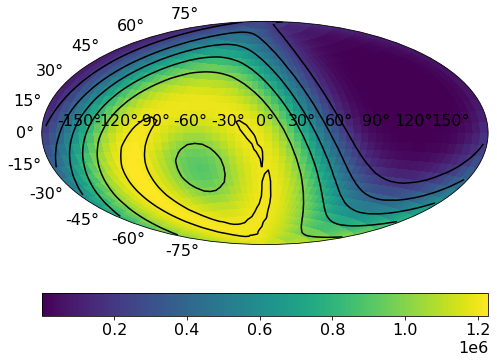

In [37]:
plt.subplot(projection='aitoff')
p = plt.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,np.roll(expo_map/domega,axis=1,shift=0))
plt.contour(L_ARR*deg2rad,B_ARR*deg2rad,np.roll(expo_map/domega,axis=1,shift=0),colors='black')
plt.colorbar(p, orientation='horizontal')

# Imaging
Set up the Richardson-Lucy deconvolution algorithm.

### Define regions of the sky that we actually cannot see

In [38]:
# here we select everything, i.e. we have no bad exposure

bad_expo = np.where(expo_map/domega <= 0)

### Define function for a starting map for the RL deconvolution. We choose an isotropic map, i.e. all pixels on the sky are initialized with the same value

In [39]:
def IsoMap(ll,bb,A0,binsize=pixel_size):
    shape = np.ones(ll.shape)
    norm = np.sum(shape*(binsize*np.pi/180)*(np.sin(np.deg2rad(bb+binsize/2)) - np.sin(np.deg2rad(bb-binsize/2))))
    val = A0*shape/norm
    return val

### Number of time bins (should be the first dimension of the response)

In [40]:
d2h = n_time_bins 
d2h

2240

### Select only one energy bin (as above) for data set

In [41]:
print('ebin: ',ebin)
dataset = analysis1.dataset.binned_data[:,ebin,:,:].reshape(d2h,
                                                            analysis1.dataset.phis.n_phi_bins*analysis1.dataset.fisbels.n_fisbel_bins)[:,nonzero_idx]


ebin:  0


### Same for background

In [42]:
background_model = background1.bg_model_reduced[ebin]

### Check for consistency of data and background
They must have the same dimensions. If not, the algorithm won't work.

In [43]:
dataset.shape,background_model.shape

((2240, 2314), (2240, 2314))

### Define background model cuts, indices, and resulting number of cuts

In [44]:
bg_cuts, idx_arr, Ncuts = background1.bg_cuts, background1.idx_arr, background1.Ncuts

### For the modified RL algorithm implemented here, we need to load a stan model that fits background plus two images (the current image plus a delta image given by the RL formalism)

# Ask Thomas: I just copied this .stan file from COSIpy and have been using it for all imaging. We have to upload this .stan file to the DC, right?

In [45]:
%%capture
#read filename.pkl (if already compiled)
# this might not work for you, let me know if there is a problem here

try:
    #read COSImodefit.pkl (if already compiled)
    model_multimap = pickle.load(open('fit_COSI_conved_2D_multimap_indivBG.pkl', 'rb'))

except:
    print('Model not yet compiled, doing that now (might take a while).')
    
    # compile model (if not yet compiled):
    model_multimap = pystan.StanModel('fit_COSI_conved_2D_multimap_indivBG.stan')

    with open(data_dir + 'fit_COSI_conved_2D_multimap_indivBG_continuum_rsp_ebin2.pkl', 'wb') as f:
        pickle.dump(model_multimap, f)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f2390c79fba64c04b17c25d7ffa1173f NOW.
In file included from /home/jacqueline/.virtualenvs/python3-virt/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1822,
                 from /home/jacqueline/.virtualenvs/python3-virt/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/jacqueline/.virtualenvs/python3-virt/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /tmp/pystan_fg7je6k5/stanfit4anon_model_f2390c79fba64c04b17c25d7ffa1173f_2717994834971141194.cpp:696:
/home/jacqueline/.virtualenvs/python3-virt/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from /home/jacquel

## Set an initial guess for the background amplitude
Feel free to play with this value, but here are suggestions informed by testing thus far:

### If source+BG:
We suggest setting "fitted_bg" to 0.9 or 0.99 when the loaded data/simulation (analysis1 object) contains both source and background. This is a rough estimate of the background contribution (90, 99%) to the entire data set.

### If analyzing source only:
When the analysis1 object does not contain background, we suggest setting this parameter to 1E-6, i.e. very close to zero background contribution.

In [46]:
fitted_bg = np.array([0.99])


# Richardson-Lucy algorithm

## Individual steps are explained in code.
The steps follow the algorithm as outlined in [Knödlseder et al. 1999](https://ui.adsabs.harvard.edu/abs/1999A%26A...345..813K/abstract). Refer to that paper for a mathematical description of the algorithm.

The total memory used during these iterations is about 74 GB!! You might not be able to do much else with your machine while this is running. 

## Adjustable parameters
There are three parameters at the beginning of this RL cell which we encourage you to adjust. In fact, it is often necessary to adjust these parameters depending on the data being studied.

- map_init\
This is the flux value of the initial, isotropic map. Typically, a value of 0.01 works well. For stronger sources, you can try increasing it to 0.1 or 1.0. As an example, running the algorithm on a source-only (no BG) simulation of the Crab, Cen A, Cygnus X-1, and Vela works well with map_init = 0.01. However, when imaging these sources each simulated with 10X their true flux values, the algorithm fails at 0.01 and work when map_init = 1.0.

- iterations\
This is the number of RL iterations. You can set this to a small value, say 50, as you get used to using the algorithm. In our testing, though, for fully converged images we usually let the algorithm run for 150 iterations. ***This can take anywhere from several hours (usually simulations without background) to overnight (simulations with background) to run.***

- afl_scl\
This is a scaling factor for the delta map which we call the "acceleration parameter." This allows the delta map to be afl_scl times stronger than the original RL algorithm suggests (c.f. Knoedlseder+1997).\
The default value here is 2000, though 1000 also works well. If you find that the algorithm returns "Fit failed" messages after running for awhile, for example, lowering this acceleration parameter to 1000 can help.

Other parameters you can adjust:
- mu_Abg, sigma_Abg\
There is a prior in the background fit defined by mu_Abg +/- sigma_Abg. By default, mu_Abg and sigma_Abg are set to fitted_bg and most testing has been done with this setting. You can try constraining the fit by decreasing sigma_Abg, for example, to sigma_Abg/2., sigma_Abg/10., which would enable to fit to vary by 50%, 10% of the initial guess.

- delta_map_tot_old\
You can change the exponent of the denominator. By default, it is set to 0.25 to help avoid exposure edge effects. All testing has been done with this fourth root. However, you can try setting it to 0, 0.5, etc. to see what happens. You can also try smoothing delta_map_tot_old with a Gaussian filter.

In [47]:
# Might not use this depending on if you choose to smooth the delta map
from scipy.ndimage import gaussian_filter

Convolving with response (init expectation), iteration 0


Calculating Delta image, iteration 1, numerator


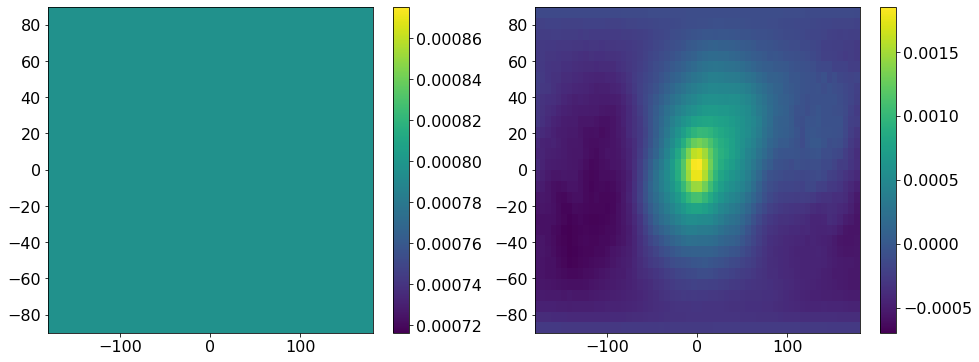

Convolving Delta image, iteration 1



Finding maximum acceleration parameter, iteration 1
Maximum acceleration parameter found:  1.14
Fitting delta-map in addition to old map, iteration 1
Saving new map, and fitted parameters, iteration 1
Calculating Delta image, iteration 2, numerator


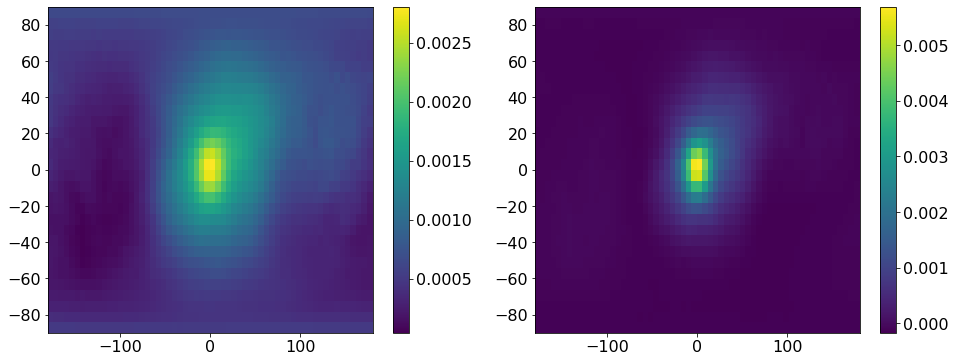

Convolving Delta image, iteration 2



Finding maximum acceleration parameter, iteration 2
Maximum acceleration parameter found:  1.48
Fitting delta-map in addition to old map, iteration 2
Saving new map, and fitted parameters, iteration 2
Calculating Delta image, iteration 3, numerator


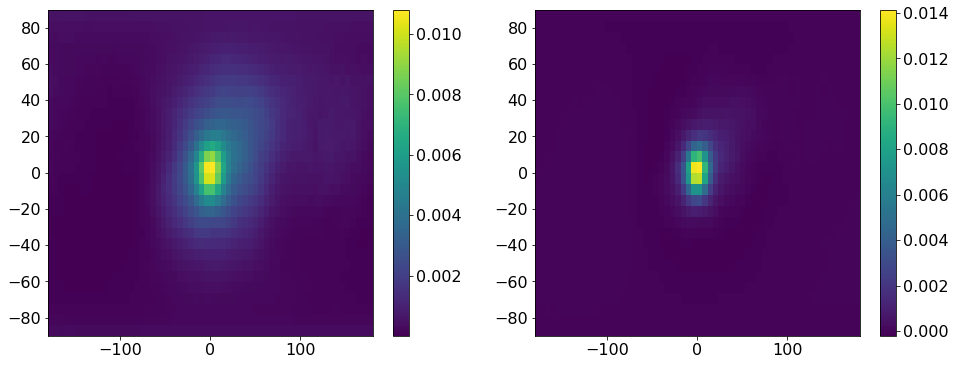

Convolving Delta image, iteration 3



Finding maximum acceleration parameter, iteration 3
Maximum acceleration parameter found:  1.588
Fitting delta-map in addition to old map, iteration 3
Saving new map, and fitted parameters, iteration 3
Calculating Delta image, iteration 4, numerator


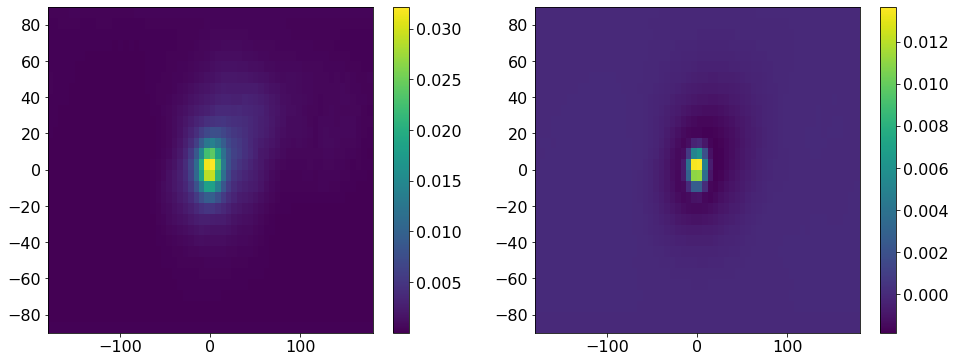

Convolving Delta image, iteration 4



Finding maximum acceleration parameter, iteration 4
Maximum acceleration parameter found:  1.636
Fitting delta-map in addition to old map, iteration 4
Saving new map, and fitted parameters, iteration 4
Calculating Delta image, iteration 5, numerator


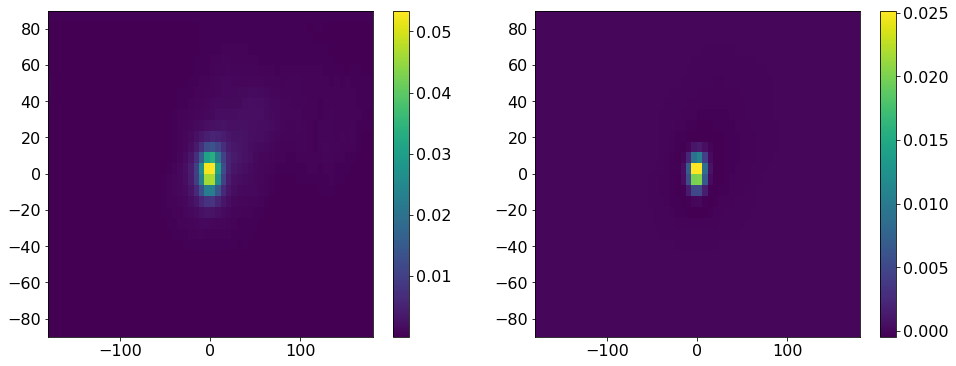

Convolving Delta image, iteration 5



Finding maximum acceleration parameter, iteration 5
Maximum acceleration parameter found:  1.67
Fitting delta-map in addition to old map, iteration 5
Saving new map, and fitted parameters, iteration 5
Calculating Delta image, iteration 6, numerator


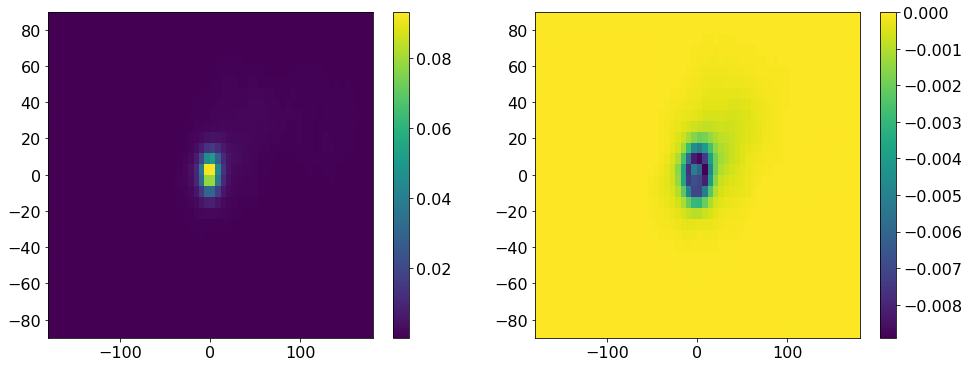

Convolving Delta image, iteration 6



Finding maximum acceleration parameter, iteration 6
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 6
Saving new map, and fitted parameters, iteration 6
Calculating Delta image, iteration 7, numerator


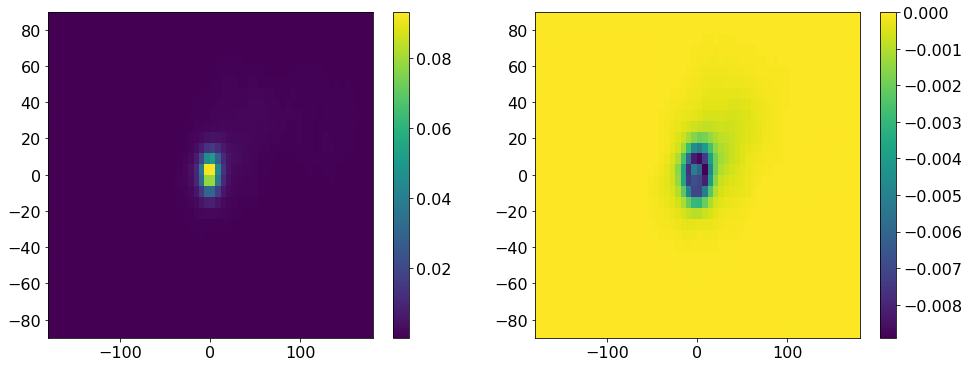

Convolving Delta image, iteration 7



Finding maximum acceleration parameter, iteration 7
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 7
Saving new map, and fitted parameters, iteration 7
Calculating Delta image, iteration 8, numerator


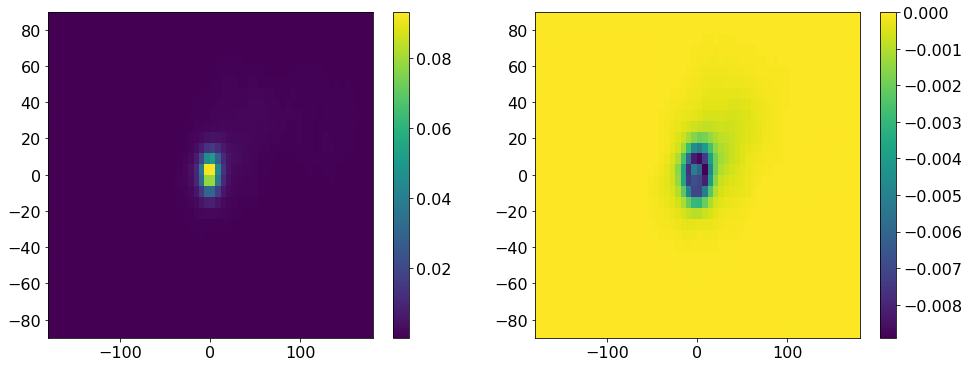

Convolving Delta image, iteration 8



Finding maximum acceleration parameter, iteration 8
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 8
Saving new map, and fitted parameters, iteration 8
Calculating Delta image, iteration 9, numerator


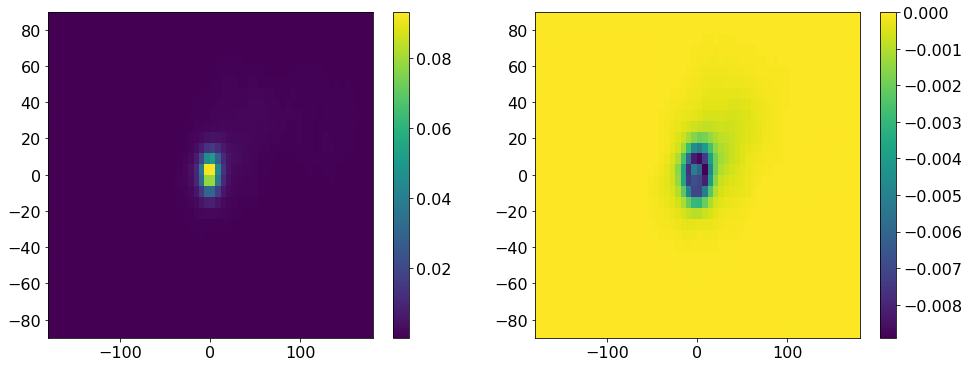

Convolving Delta image, iteration 9



Finding maximum acceleration parameter, iteration 9
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 9
Saving new map, and fitted parameters, iteration 9
Calculating Delta image, iteration 10, numerator


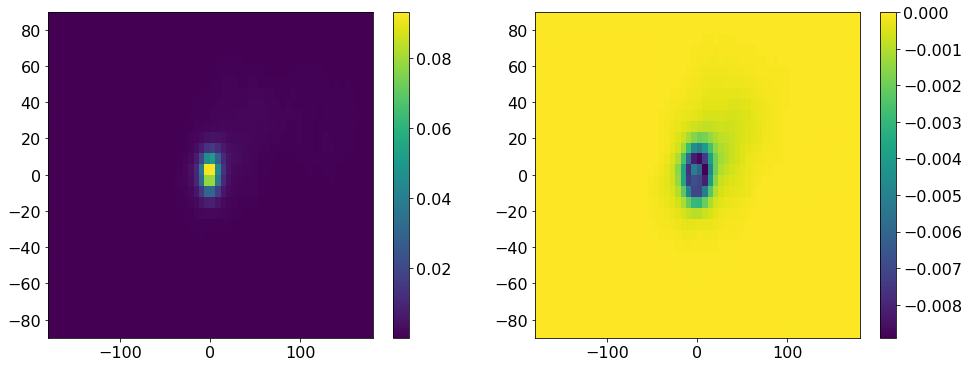

Convolving Delta image, iteration 10



Finding maximum acceleration parameter, iteration 10
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 10
Saving new map, and fitted parameters, iteration 10
Calculating Delta image, iteration 11, numerator


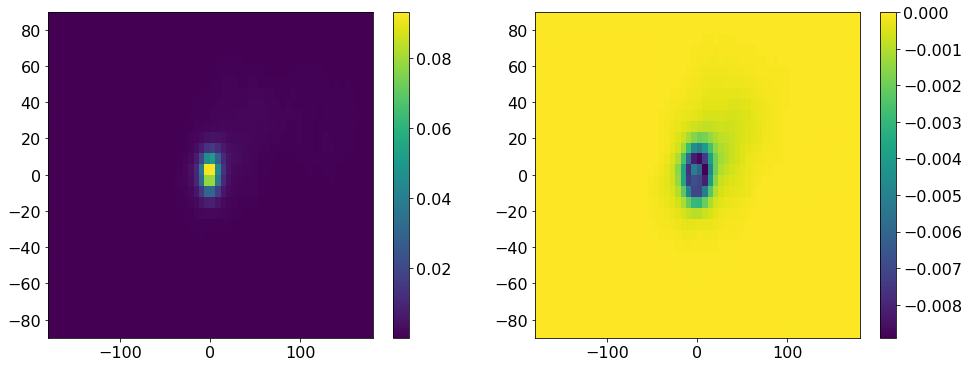

Convolving Delta image, iteration 11



Finding maximum acceleration parameter, iteration 11
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 11
Saving new map, and fitted parameters, iteration 11
Calculating Delta image, iteration 12, numerator


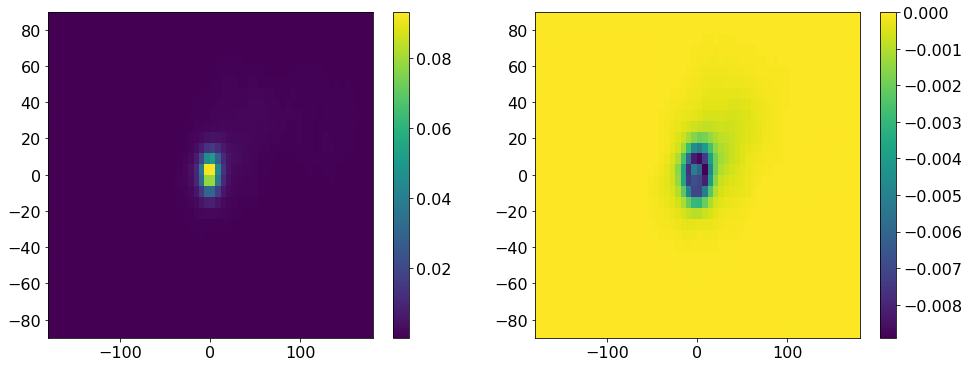

Convolving Delta image, iteration 12



Finding maximum acceleration parameter, iteration 12
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 12
Saving new map, and fitted parameters, iteration 12
Calculating Delta image, iteration 13, numerator


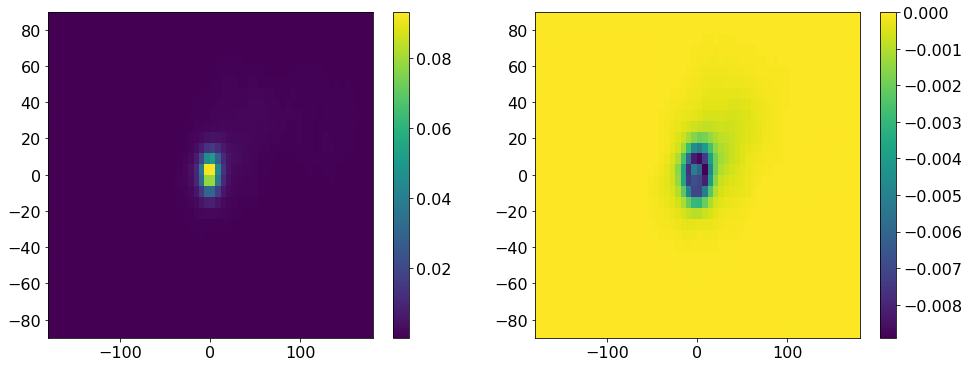

Convolving Delta image, iteration 13



Finding maximum acceleration parameter, iteration 13
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 13
Saving new map, and fitted parameters, iteration 13
Calculating Delta image, iteration 14, numerator


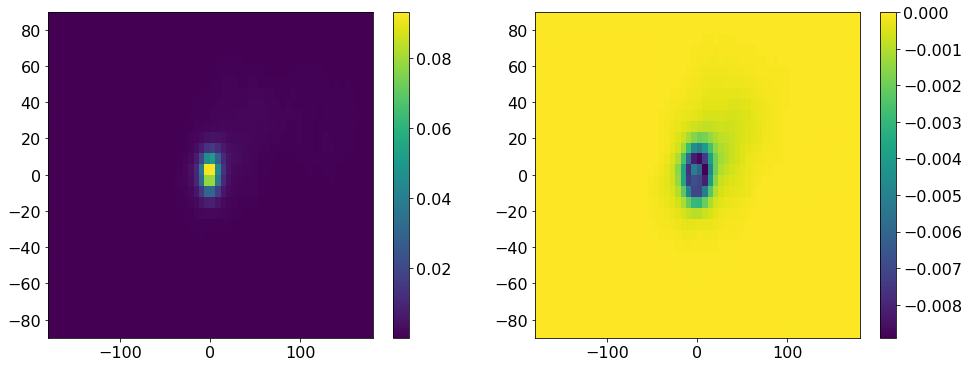

Convolving Delta image, iteration 14



Finding maximum acceleration parameter, iteration 14
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 14
Saving new map, and fitted parameters, iteration 14
Calculating Delta image, iteration 15, numerator


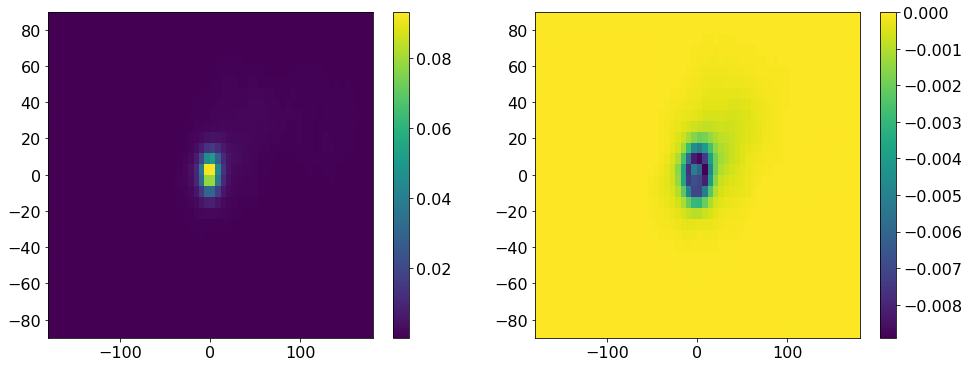

Convolving Delta image, iteration 15



Finding maximum acceleration parameter, iteration 15
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 15
Saving new map, and fitted parameters, iteration 15
Calculating Delta image, iteration 16, numerator


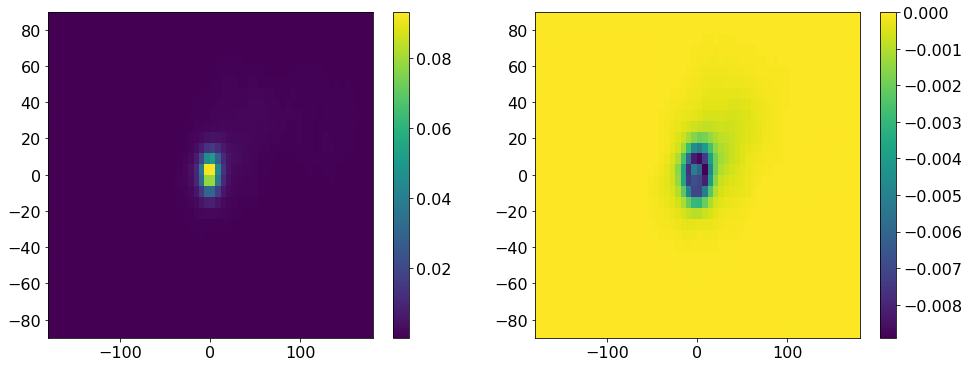

Convolving Delta image, iteration 16



Finding maximum acceleration parameter, iteration 16
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 16
Saving new map, and fitted parameters, iteration 16
Calculating Delta image, iteration 17, numerator


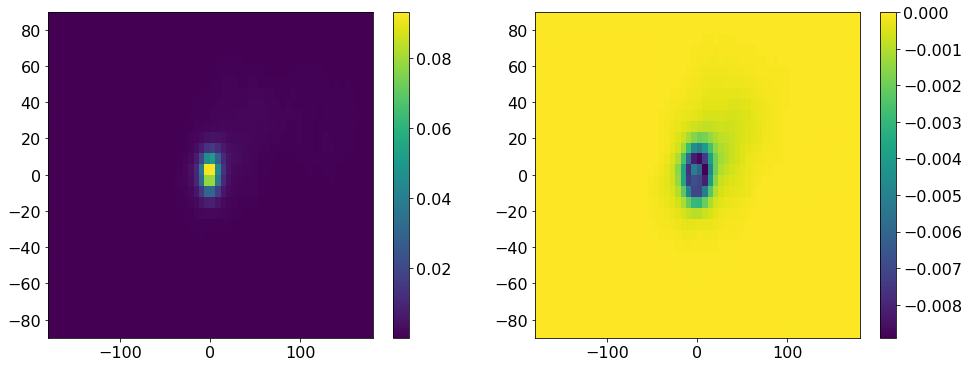

Convolving Delta image, iteration 17



Finding maximum acceleration parameter, iteration 17
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 17
Saving new map, and fitted parameters, iteration 17
Calculating Delta image, iteration 18, numerator


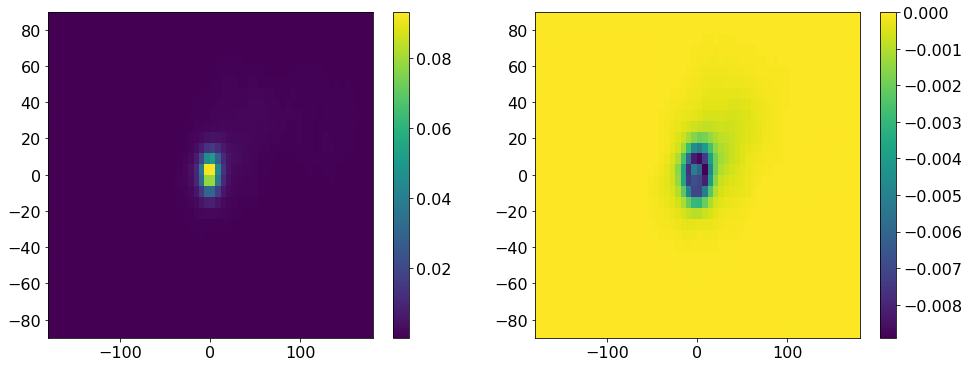

Convolving Delta image, iteration 18



Finding maximum acceleration parameter, iteration 18
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 18
Saving new map, and fitted parameters, iteration 18
Calculating Delta image, iteration 19, numerator


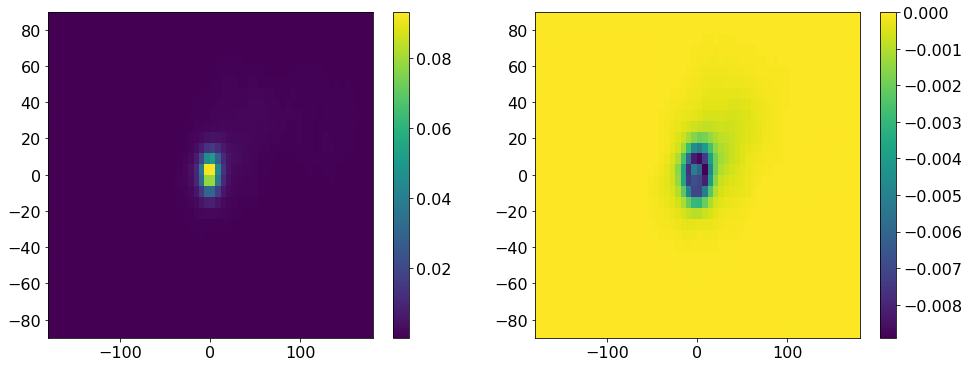

Convolving Delta image, iteration 19



Finding maximum acceleration parameter, iteration 19
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 19
Saving new map, and fitted parameters, iteration 19
Calculating Delta image, iteration 20, numerator


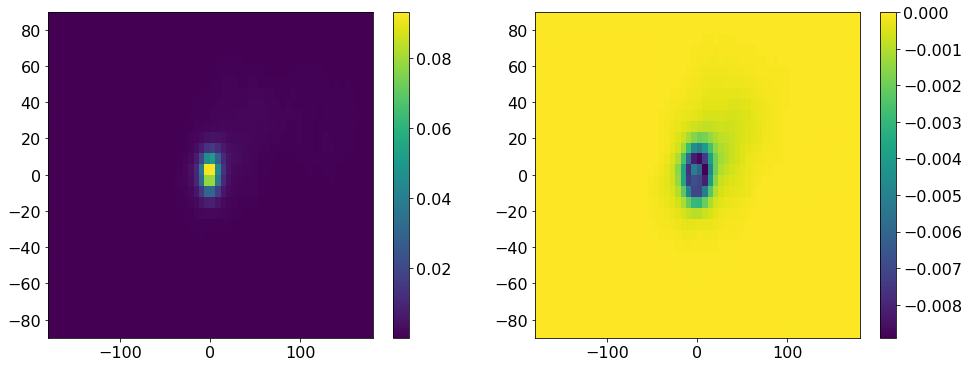

Convolving Delta image, iteration 20



Finding maximum acceleration parameter, iteration 20
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 20
Saving new map, and fitted parameters, iteration 20
Calculating Delta image, iteration 21, numerator


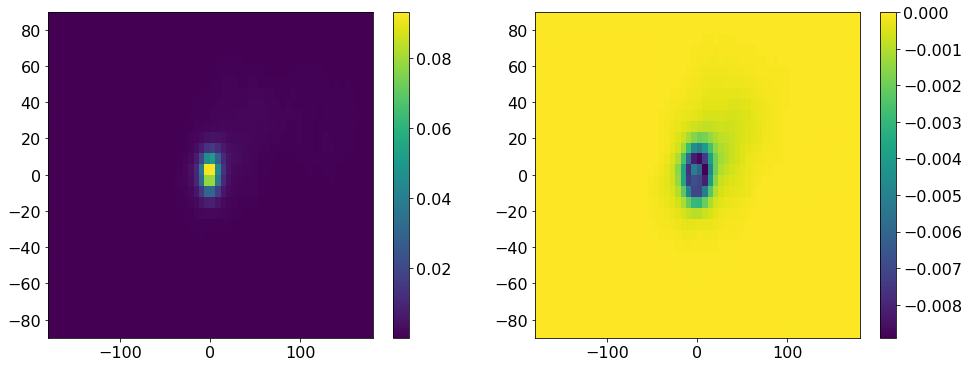

Convolving Delta image, iteration 21



Finding maximum acceleration parameter, iteration 21
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 21
Saving new map, and fitted parameters, iteration 21
Calculating Delta image, iteration 22, numerator


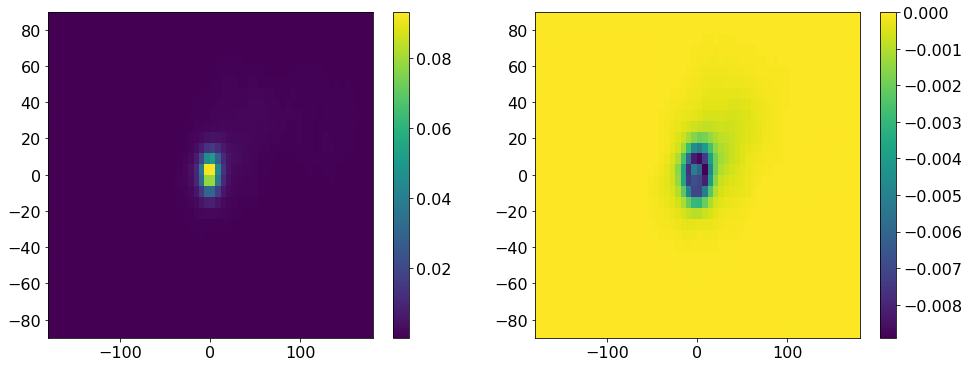

Convolving Delta image, iteration 22



Finding maximum acceleration parameter, iteration 22
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 22
Saving new map, and fitted parameters, iteration 22
Calculating Delta image, iteration 23, numerator


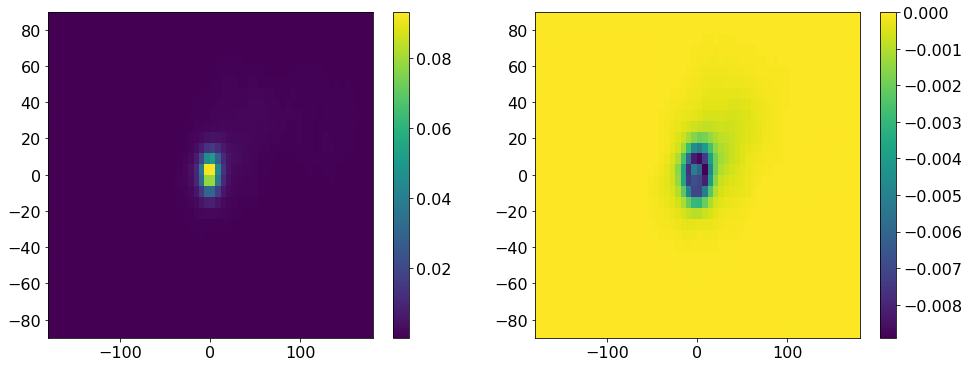

Convolving Delta image, iteration 23



Finding maximum acceleration parameter, iteration 23
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 23
Saving new map, and fitted parameters, iteration 23
Calculating Delta image, iteration 24, numerator


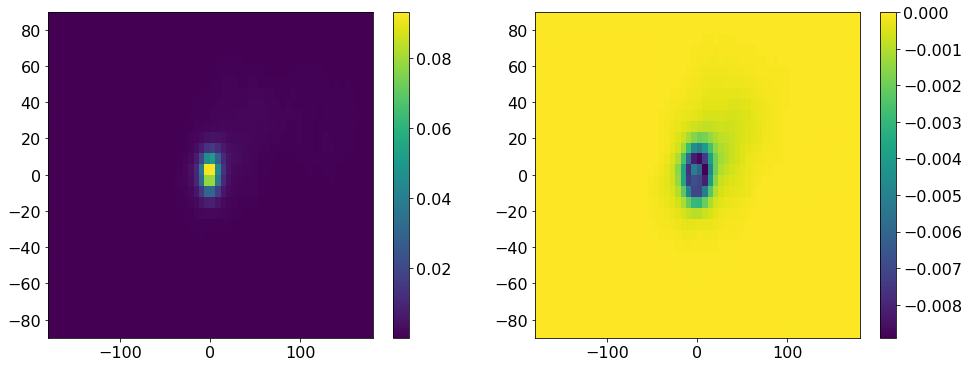

Convolving Delta image, iteration 24



Finding maximum acceleration parameter, iteration 24
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 24
Saving new map, and fitted parameters, iteration 24
Calculating Delta image, iteration 25, numerator


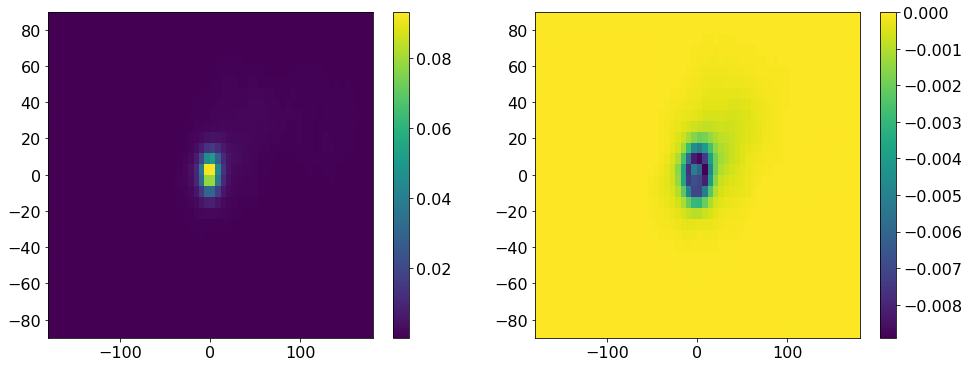

Convolving Delta image, iteration 25



Finding maximum acceleration parameter, iteration 25
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 25
Saving new map, and fitted parameters, iteration 25
Calculating Delta image, iteration 26, numerator


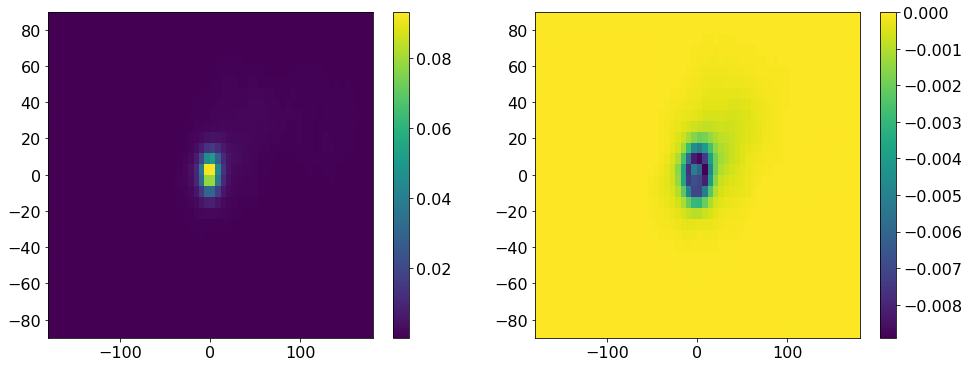

Convolving Delta image, iteration 26



Finding maximum acceleration parameter, iteration 26
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 26
Saving new map, and fitted parameters, iteration 26
Calculating Delta image, iteration 27, numerator


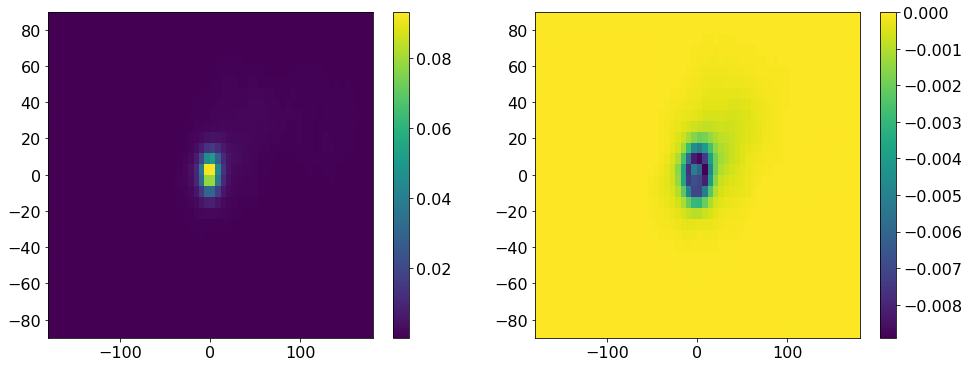

Convolving Delta image, iteration 27



Finding maximum acceleration parameter, iteration 27
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 27
Saving new map, and fitted parameters, iteration 27
Calculating Delta image, iteration 28, numerator


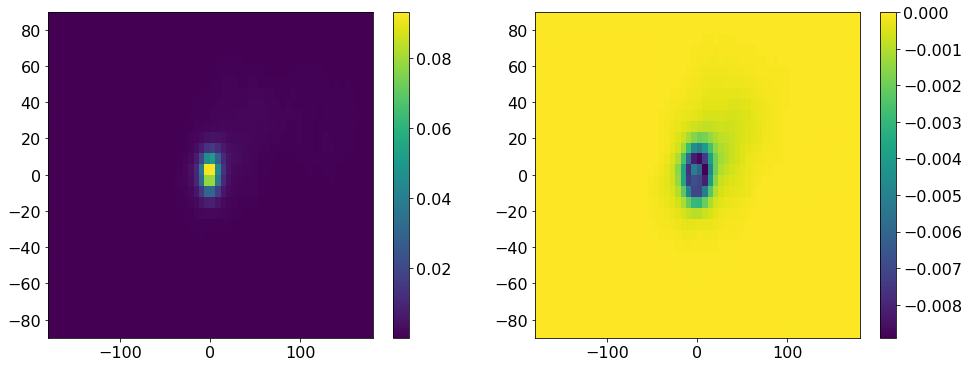

Convolving Delta image, iteration 28



Finding maximum acceleration parameter, iteration 28
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 28
Saving new map, and fitted parameters, iteration 28
Calculating Delta image, iteration 29, numerator


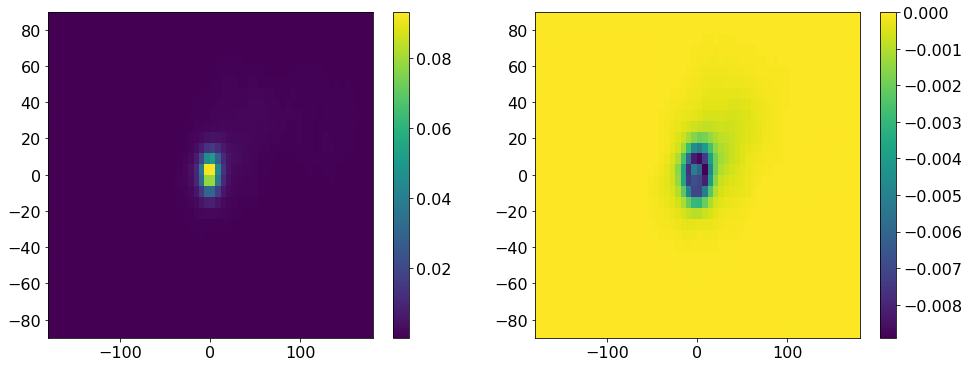

Convolving Delta image, iteration 29



Finding maximum acceleration parameter, iteration 29
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 29
Saving new map, and fitted parameters, iteration 29
Calculating Delta image, iteration 30, numerator


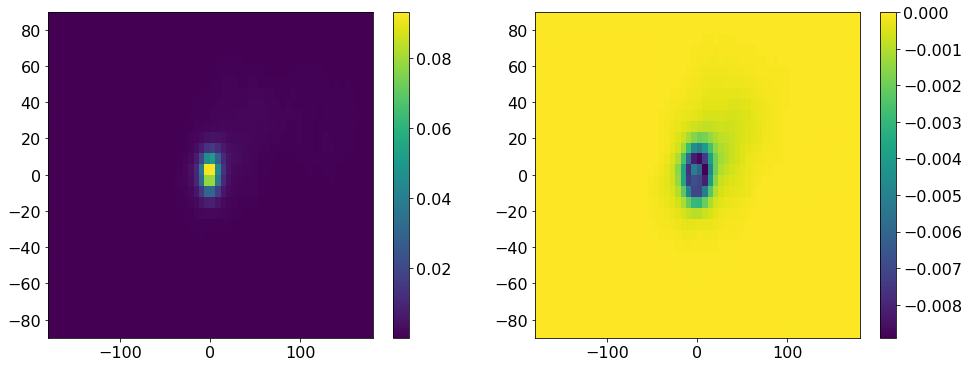

Convolving Delta image, iteration 30



Finding maximum acceleration parameter, iteration 30
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 30
Saving new map, and fitted parameters, iteration 30
Calculating Delta image, iteration 31, numerator


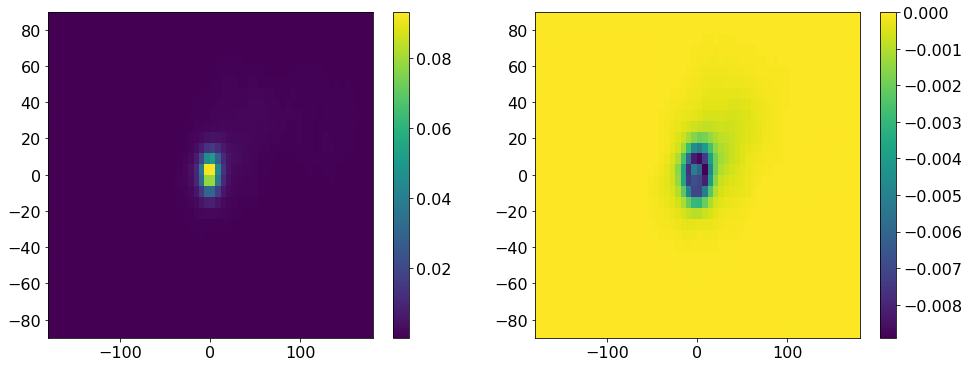

Convolving Delta image, iteration 31



Finding maximum acceleration parameter, iteration 31
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 31
Saving new map, and fitted parameters, iteration 31
Calculating Delta image, iteration 32, numerator


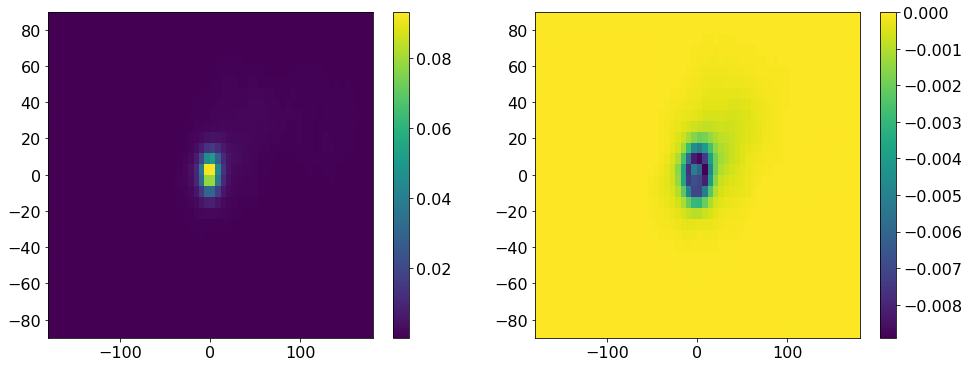

Convolving Delta image, iteration 32



Finding maximum acceleration parameter, iteration 32
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 32
Saving new map, and fitted parameters, iteration 32
Calculating Delta image, iteration 33, numerator


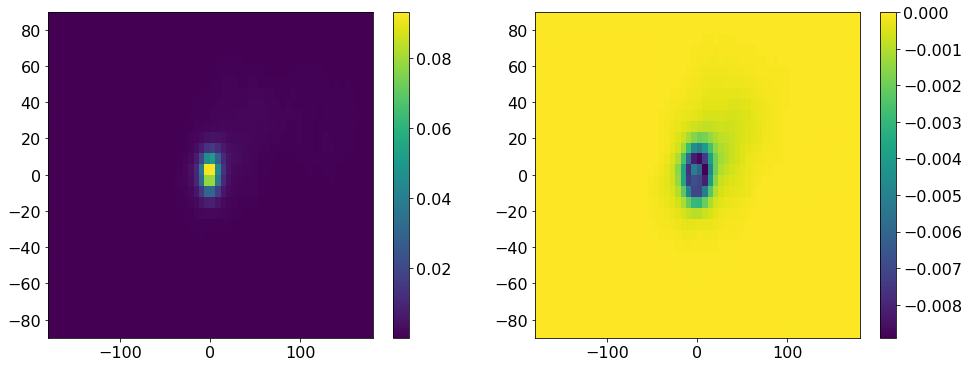

Convolving Delta image, iteration 33



Finding maximum acceleration parameter, iteration 33
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 33
Saving new map, and fitted parameters, iteration 33
Calculating Delta image, iteration 34, numerator


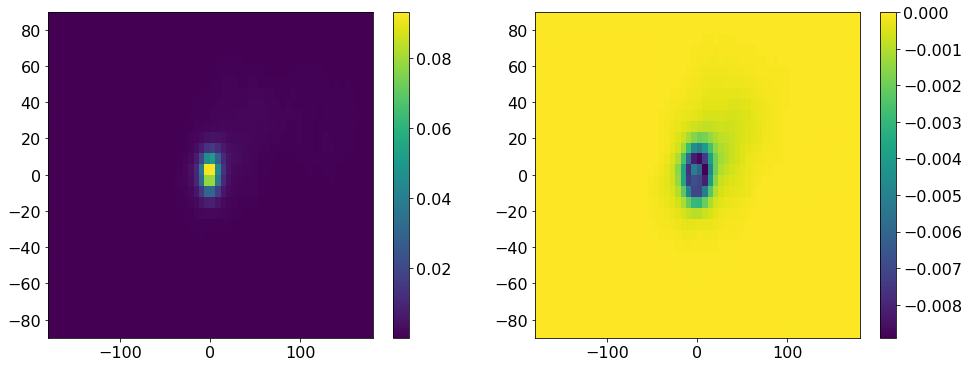

Convolving Delta image, iteration 34



Finding maximum acceleration parameter, iteration 34
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 34
Saving new map, and fitted parameters, iteration 34
Calculating Delta image, iteration 35, numerator


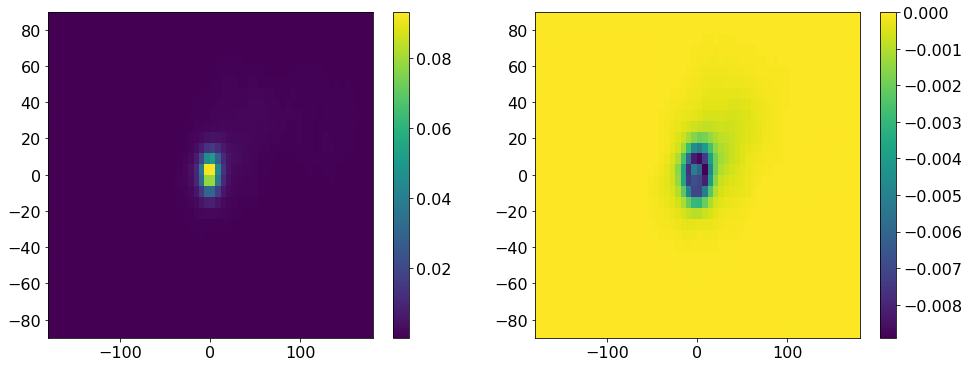

Convolving Delta image, iteration 35



Finding maximum acceleration parameter, iteration 35
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 35
Saving new map, and fitted parameters, iteration 35
Calculating Delta image, iteration 36, numerator


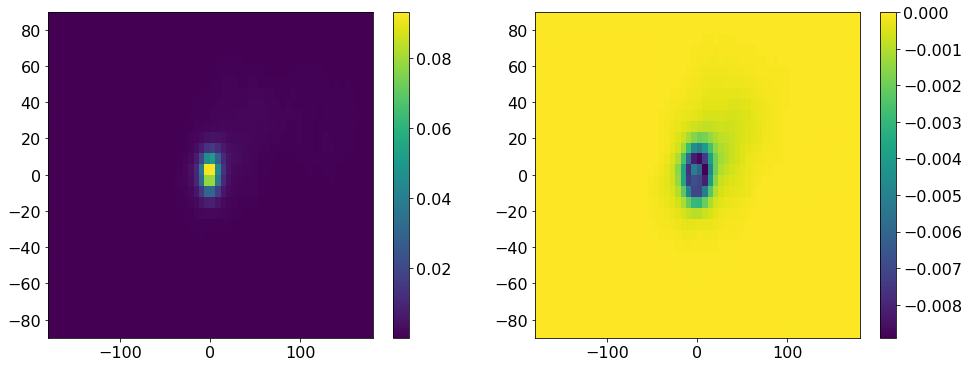

Convolving Delta image, iteration 36



Finding maximum acceleration parameter, iteration 36
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 36
Saving new map, and fitted parameters, iteration 36
Calculating Delta image, iteration 37, numerator


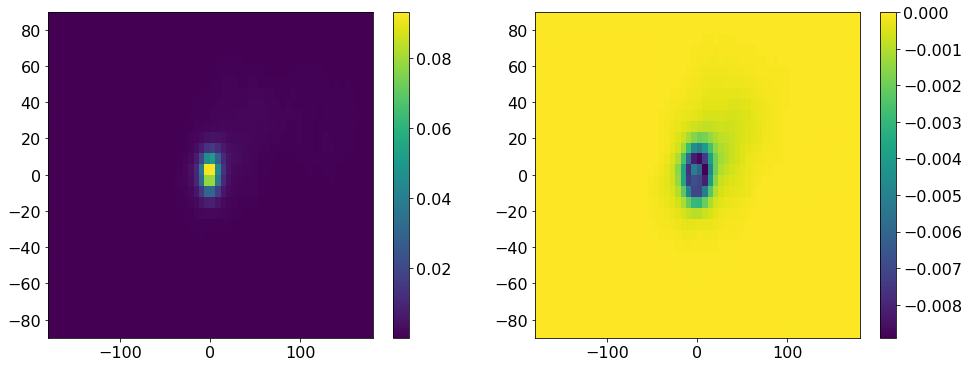

Convolving Delta image, iteration 37



Finding maximum acceleration parameter, iteration 37
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 37
Saving new map, and fitted parameters, iteration 37
Calculating Delta image, iteration 38, numerator


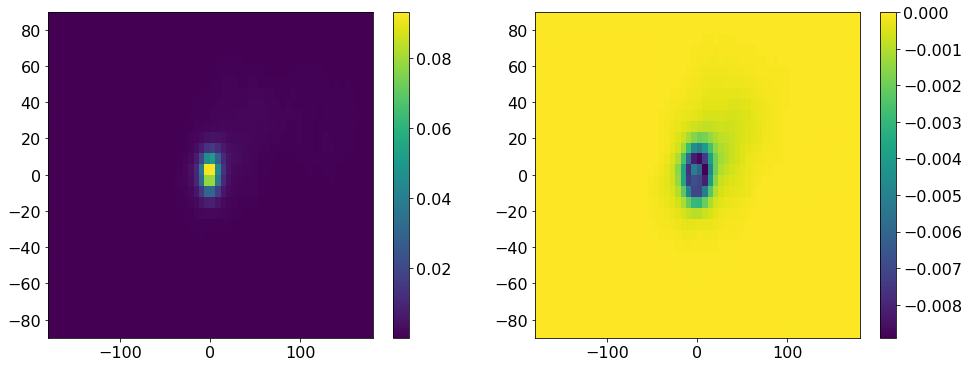

Convolving Delta image, iteration 38



Finding maximum acceleration parameter, iteration 38
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 38
Saving new map, and fitted parameters, iteration 38
Calculating Delta image, iteration 39, numerator


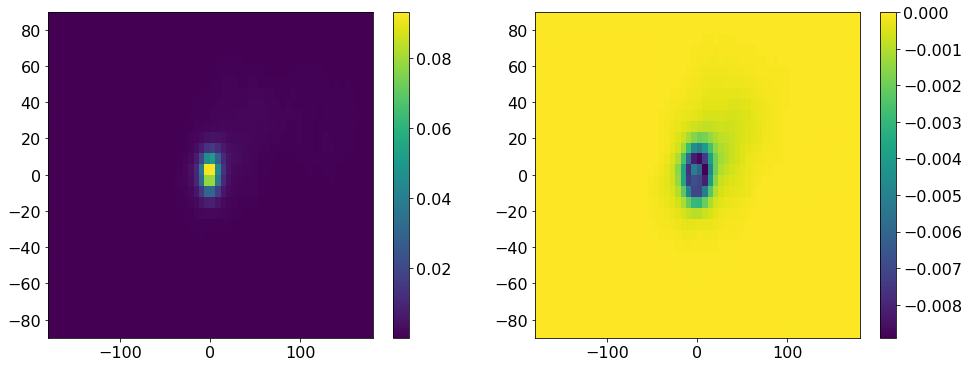

Convolving Delta image, iteration 39



Finding maximum acceleration parameter, iteration 39
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 39
Saving new map, and fitted parameters, iteration 39
Calculating Delta image, iteration 40, numerator


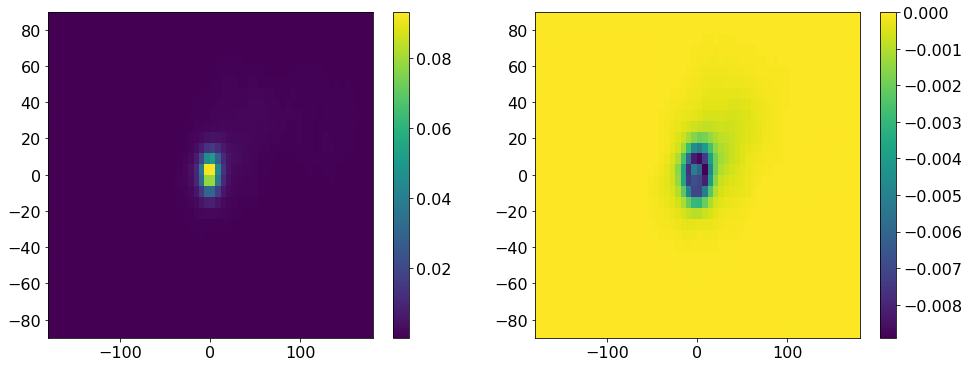

Convolving Delta image, iteration 40



Finding maximum acceleration parameter, iteration 40
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 40
Saving new map, and fitted parameters, iteration 40
Calculating Delta image, iteration 41, numerator


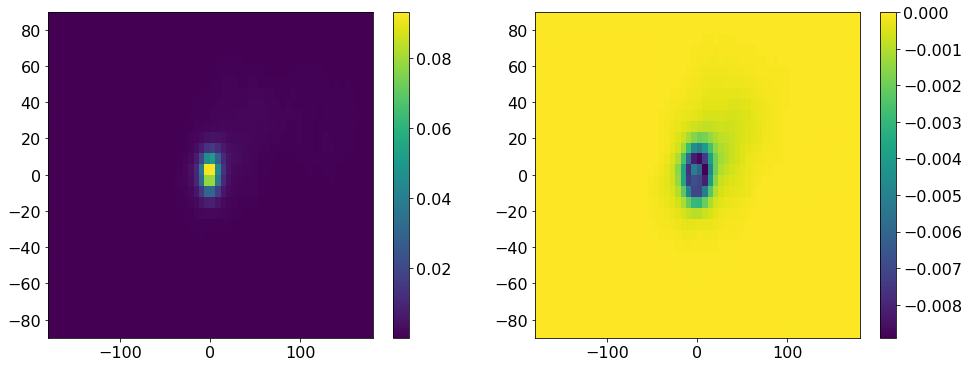

Convolving Delta image, iteration 41



Finding maximum acceleration parameter, iteration 41
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 41
Saving new map, and fitted parameters, iteration 41
Calculating Delta image, iteration 42, numerator


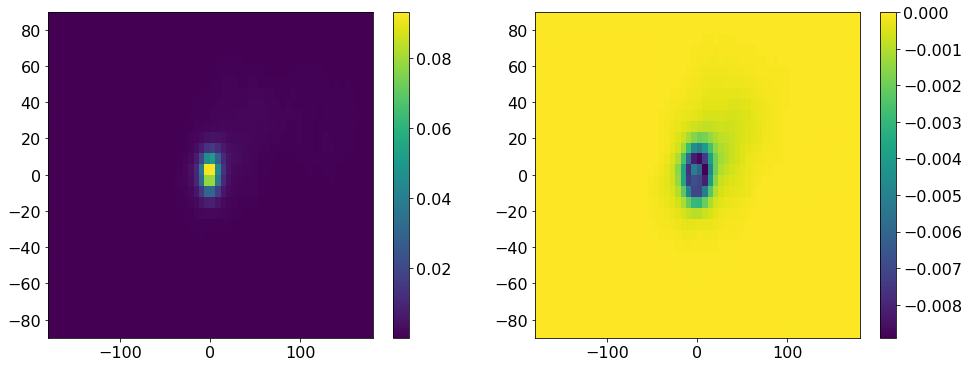

Convolving Delta image, iteration 42



Finding maximum acceleration parameter, iteration 42
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 42
Saving new map, and fitted parameters, iteration 42
Calculating Delta image, iteration 43, numerator


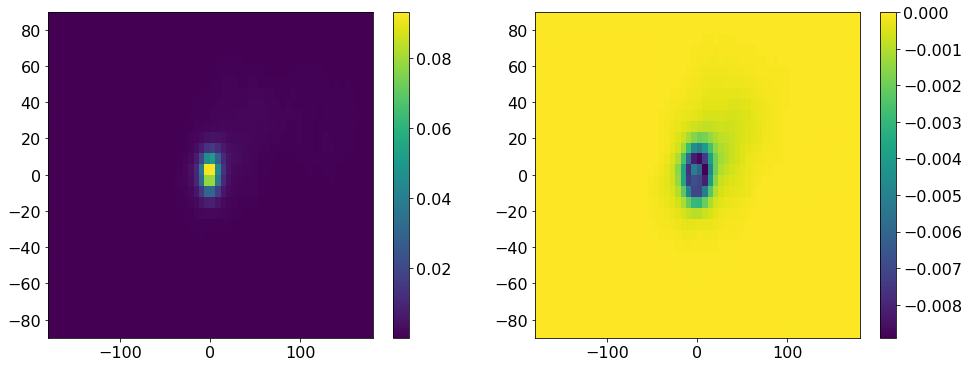

Convolving Delta image, iteration 43



Finding maximum acceleration parameter, iteration 43
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 43
Saving new map, and fitted parameters, iteration 43
Calculating Delta image, iteration 44, numerator


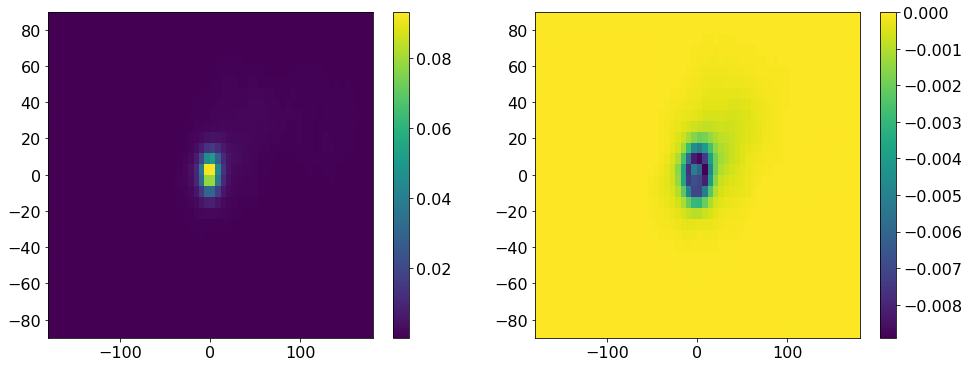

Convolving Delta image, iteration 44



Finding maximum acceleration parameter, iteration 44
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 44
Saving new map, and fitted parameters, iteration 44
Calculating Delta image, iteration 45, numerator


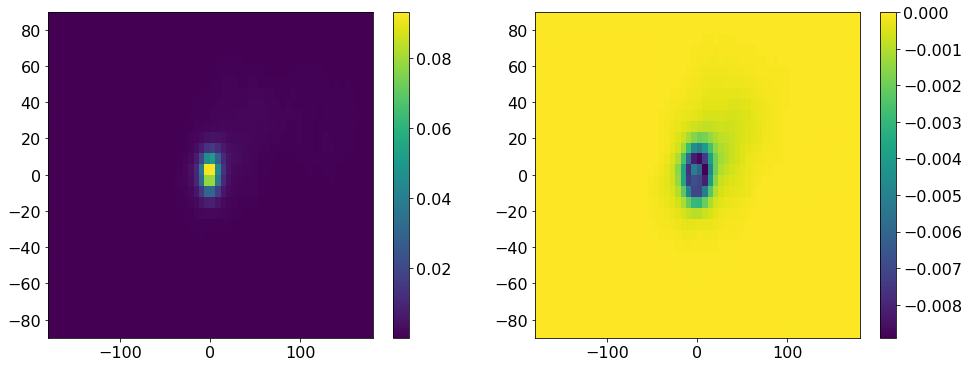

Convolving Delta image, iteration 45



Finding maximum acceleration parameter, iteration 45
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 45
Saving new map, and fitted parameters, iteration 45
Calculating Delta image, iteration 46, numerator


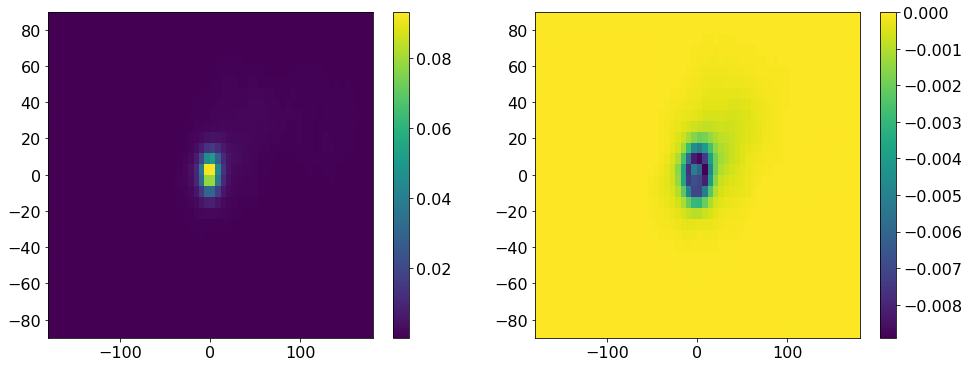

Convolving Delta image, iteration 46



Finding maximum acceleration parameter, iteration 46
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 46
Saving new map, and fitted parameters, iteration 46
Calculating Delta image, iteration 47, numerator


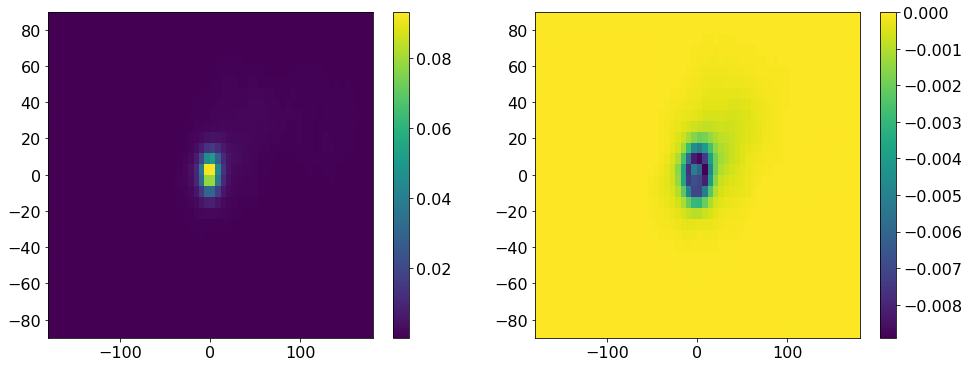

Convolving Delta image, iteration 47



Finding maximum acceleration parameter, iteration 47
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 47
Saving new map, and fitted parameters, iteration 47
Calculating Delta image, iteration 48, numerator


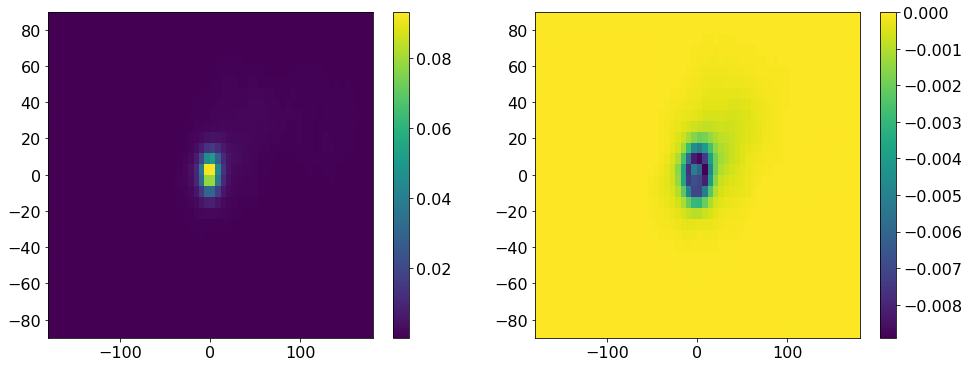

Convolving Delta image, iteration 48



Finding maximum acceleration parameter, iteration 48
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 48
Saving new map, and fitted parameters, iteration 48
Calculating Delta image, iteration 49, numerator


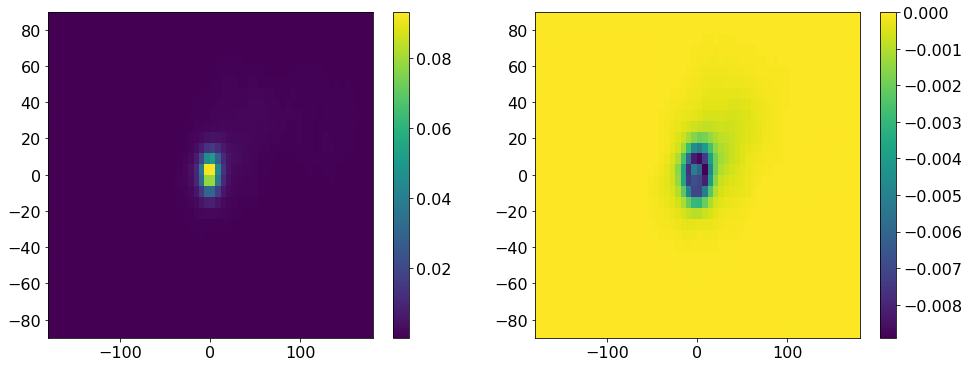

Convolving Delta image, iteration 49



Finding maximum acceleration parameter, iteration 49
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 49
Saving new map, and fitted parameters, iteration 49
Calculating Delta image, iteration 50, numerator


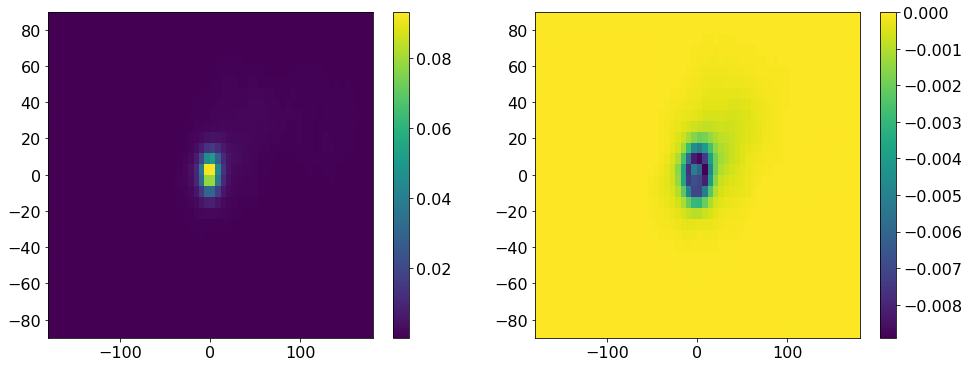

Convolving Delta image, iteration 50



Finding maximum acceleration parameter, iteration 50
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 50
Saving new map, and fitted parameters, iteration 50
Calculating Delta image, iteration 51, numerator


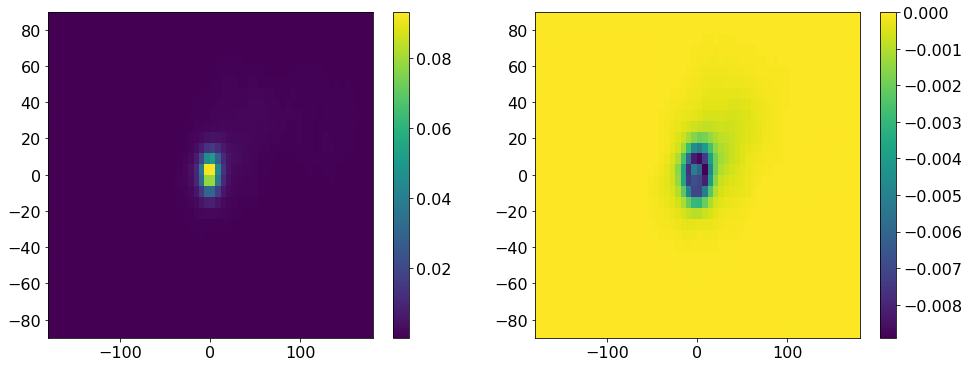

Convolving Delta image, iteration 51



Finding maximum acceleration parameter, iteration 51
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 51
Saving new map, and fitted parameters, iteration 51
Calculating Delta image, iteration 52, numerator


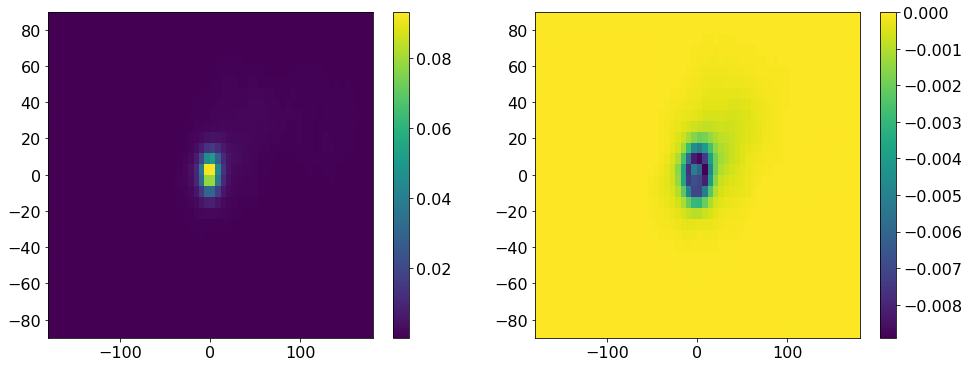

Convolving Delta image, iteration 52



Finding maximum acceleration parameter, iteration 52
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 52
Saving new map, and fitted parameters, iteration 52
Calculating Delta image, iteration 53, numerator


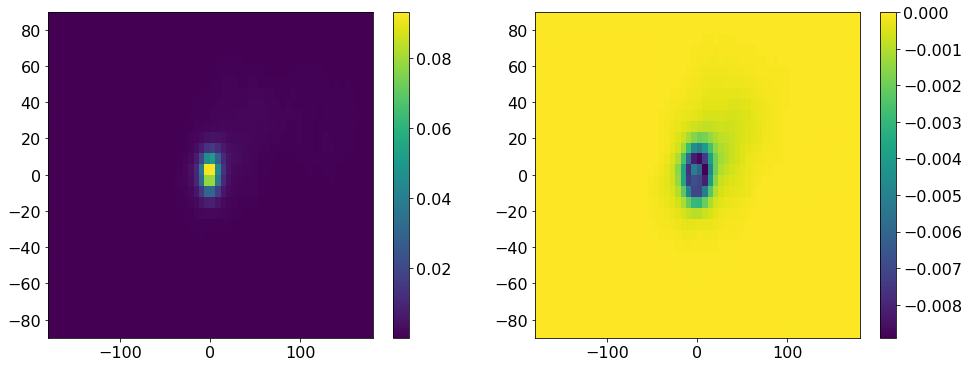

Convolving Delta image, iteration 53



Finding maximum acceleration parameter, iteration 53
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 53
Saving new map, and fitted parameters, iteration 53
Calculating Delta image, iteration 54, numerator


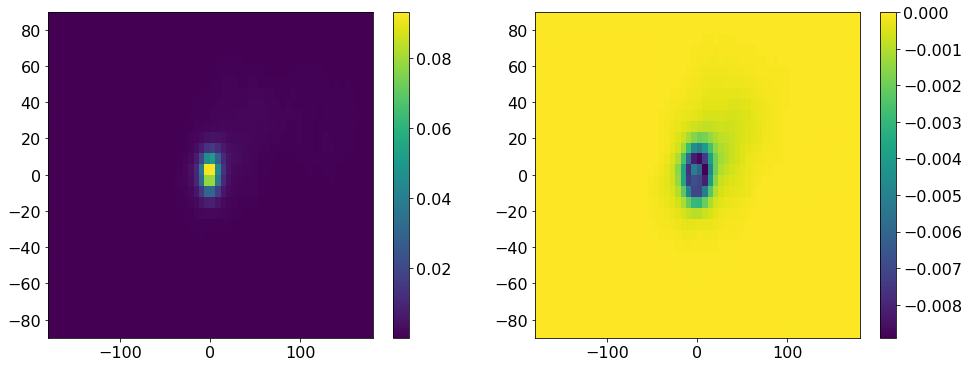

Convolving Delta image, iteration 54



Finding maximum acceleration parameter, iteration 54
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 54
Saving new map, and fitted parameters, iteration 54
Calculating Delta image, iteration 55, numerator


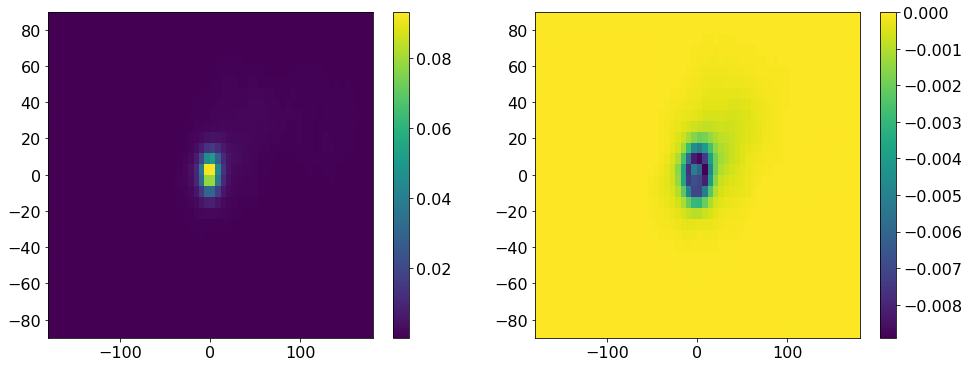

Convolving Delta image, iteration 55



Finding maximum acceleration parameter, iteration 55
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 55
Saving new map, and fitted parameters, iteration 55
Calculating Delta image, iteration 56, numerator


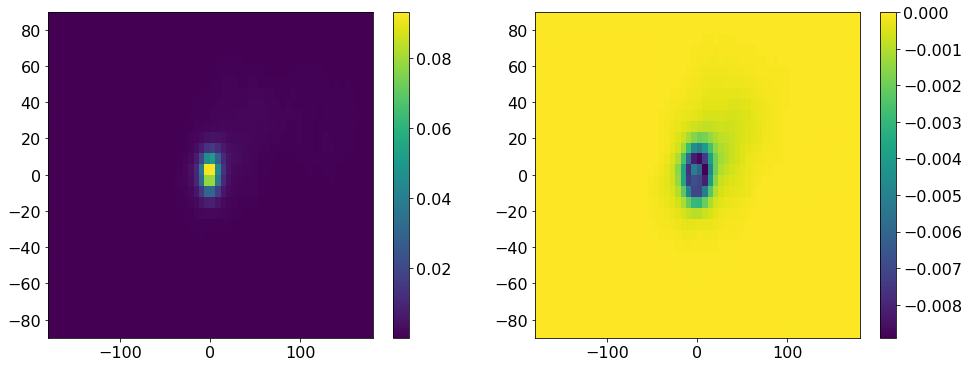

Convolving Delta image, iteration 56



Finding maximum acceleration parameter, iteration 56
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 56
Saving new map, and fitted parameters, iteration 56
Calculating Delta image, iteration 57, numerator


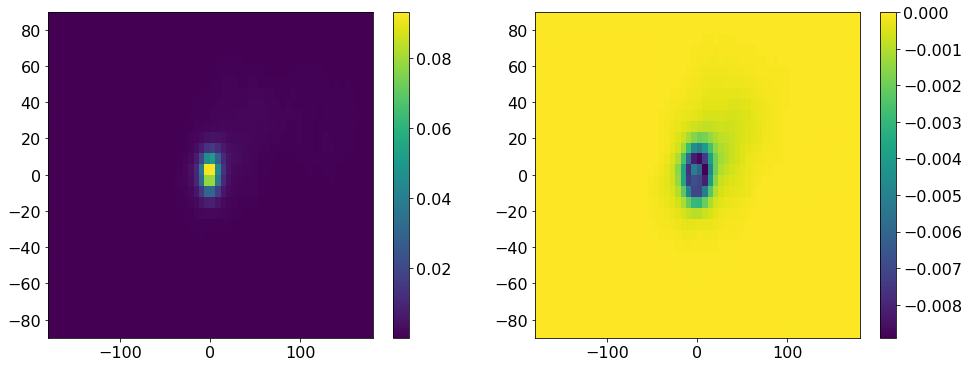

Convolving Delta image, iteration 57



Finding maximum acceleration parameter, iteration 57
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 57
Saving new map, and fitted parameters, iteration 57
Calculating Delta image, iteration 58, numerator


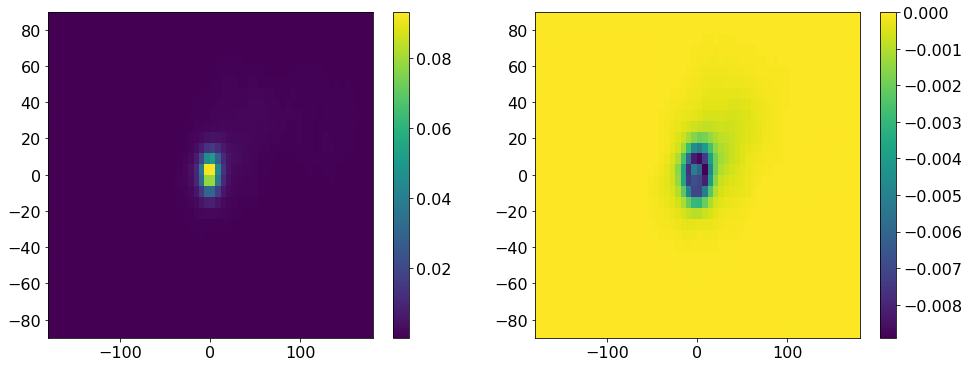

Convolving Delta image, iteration 58



Finding maximum acceleration parameter, iteration 58
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 58
Saving new map, and fitted parameters, iteration 58
Calculating Delta image, iteration 59, numerator


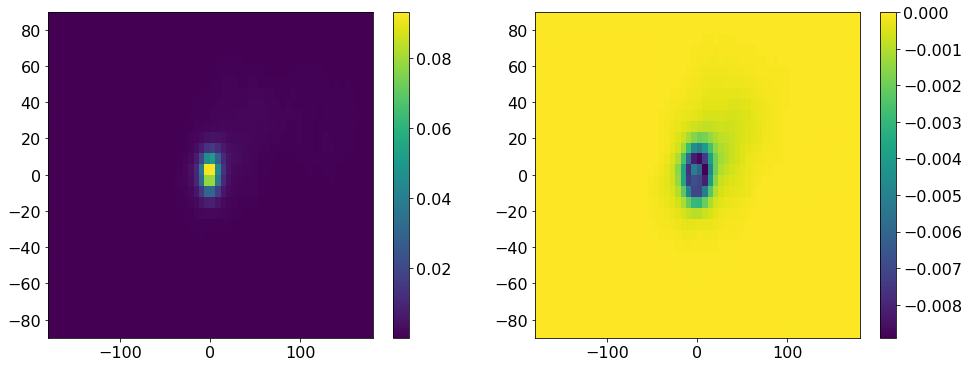

Convolving Delta image, iteration 59



Finding maximum acceleration parameter, iteration 59
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 59
Saving new map, and fitted parameters, iteration 59
Calculating Delta image, iteration 60, numerator


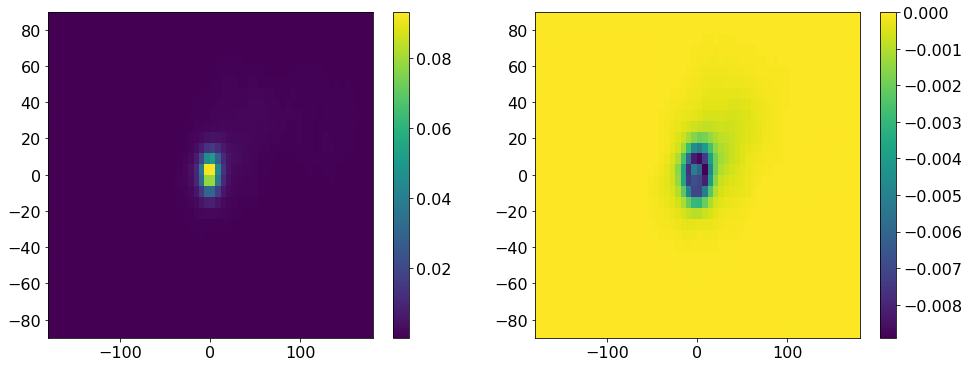

Convolving Delta image, iteration 60



Finding maximum acceleration parameter, iteration 60
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 60
Saving new map, and fitted parameters, iteration 60
Calculating Delta image, iteration 61, numerator


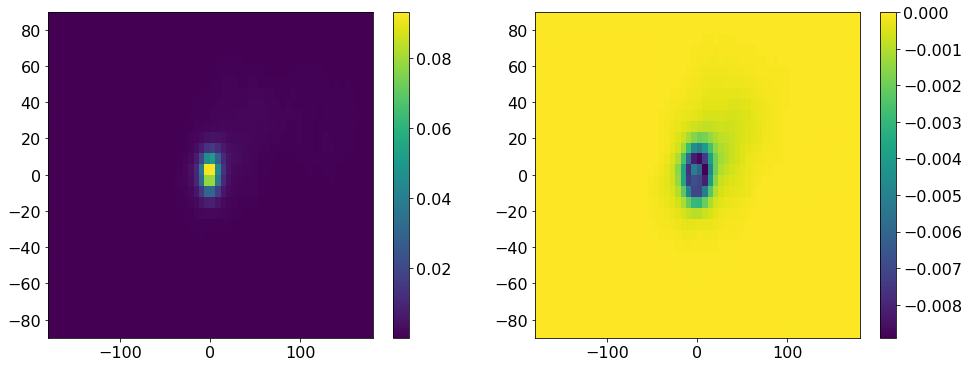

Convolving Delta image, iteration 61



Finding maximum acceleration parameter, iteration 61
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 61
Saving new map, and fitted parameters, iteration 61
Calculating Delta image, iteration 62, numerator


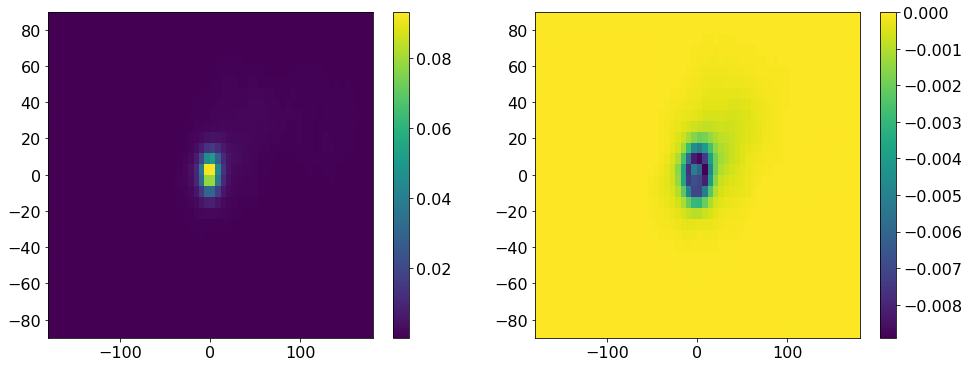

Convolving Delta image, iteration 62



Finding maximum acceleration parameter, iteration 62
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 62
Saving new map, and fitted parameters, iteration 62
Calculating Delta image, iteration 63, numerator


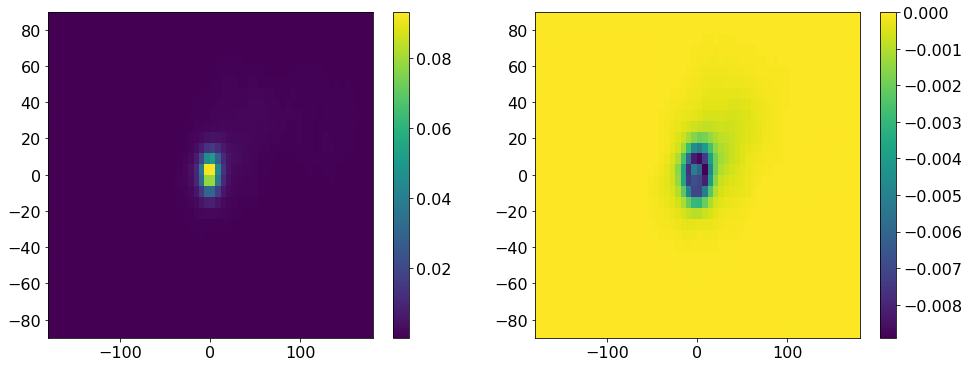

Convolving Delta image, iteration 63



Finding maximum acceleration parameter, iteration 63
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 63
Saving new map, and fitted parameters, iteration 63
Calculating Delta image, iteration 64, numerator


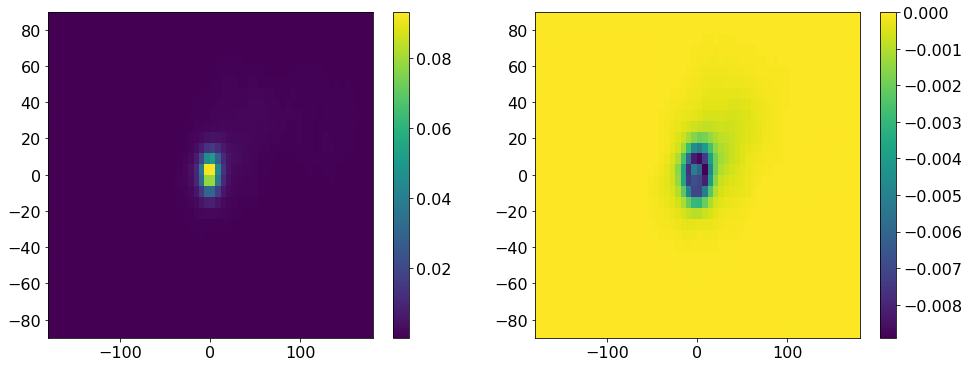

Convolving Delta image, iteration 64



Finding maximum acceleration parameter, iteration 64
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 64
Saving new map, and fitted parameters, iteration 64
Calculating Delta image, iteration 65, numerator


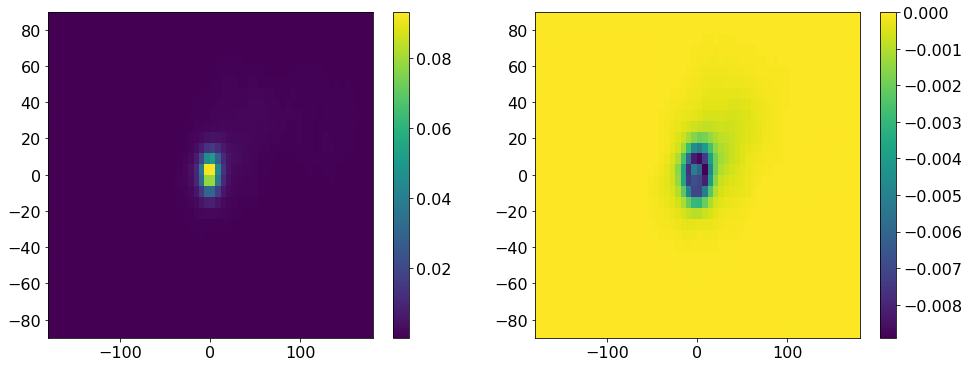

Convolving Delta image, iteration 65



Finding maximum acceleration parameter, iteration 65
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 65
Saving new map, and fitted parameters, iteration 65
Calculating Delta image, iteration 66, numerator


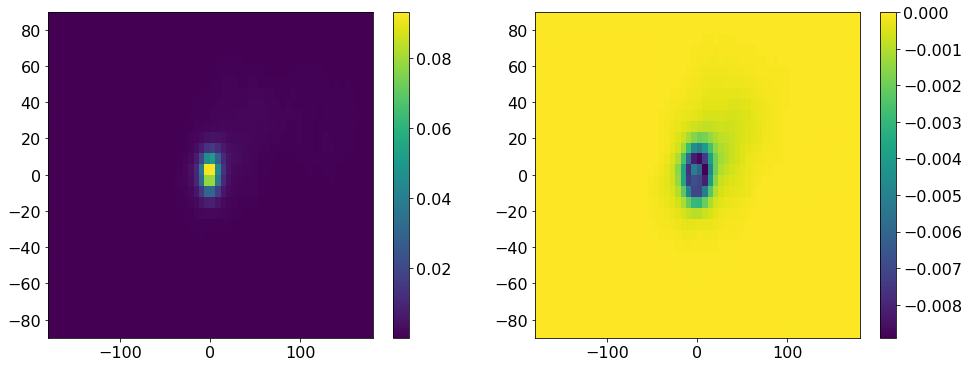

Convolving Delta image, iteration 66



Finding maximum acceleration parameter, iteration 66
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 66
Saving new map, and fitted parameters, iteration 66
Calculating Delta image, iteration 67, numerator


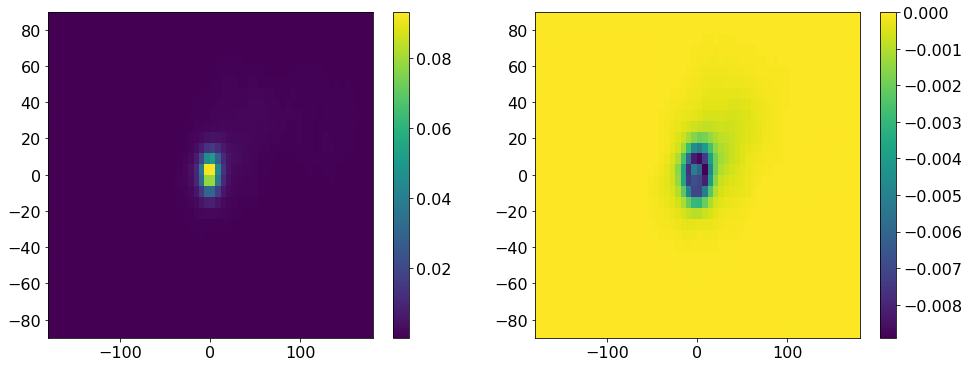

Convolving Delta image, iteration 67



Finding maximum acceleration parameter, iteration 67
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 67
Saving new map, and fitted parameters, iteration 67
Calculating Delta image, iteration 68, numerator


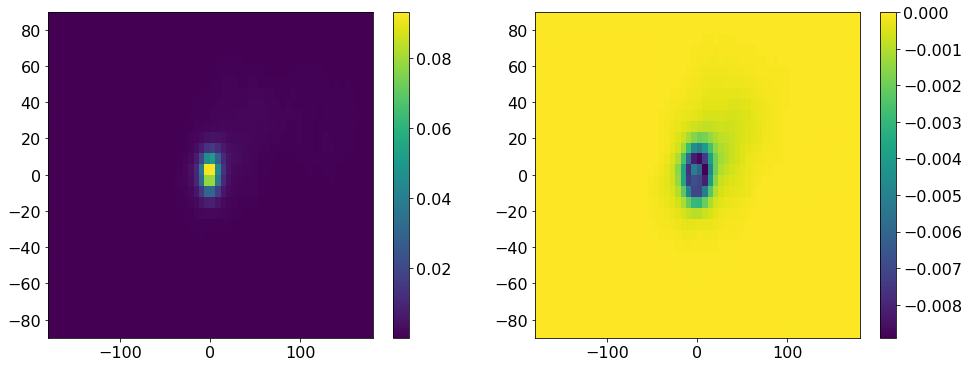

Convolving Delta image, iteration 68



Finding maximum acceleration parameter, iteration 68
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 68
Saving new map, and fitted parameters, iteration 68
Calculating Delta image, iteration 69, numerator


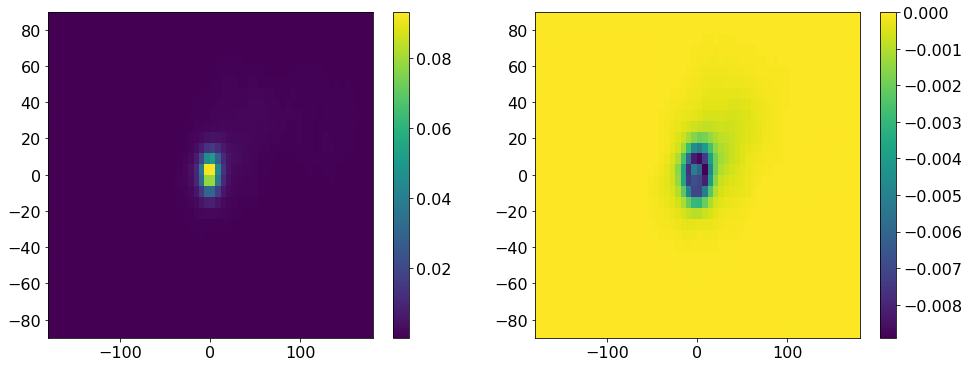

Convolving Delta image, iteration 69



Finding maximum acceleration parameter, iteration 69
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 69
Saving new map, and fitted parameters, iteration 69
Calculating Delta image, iteration 70, numerator


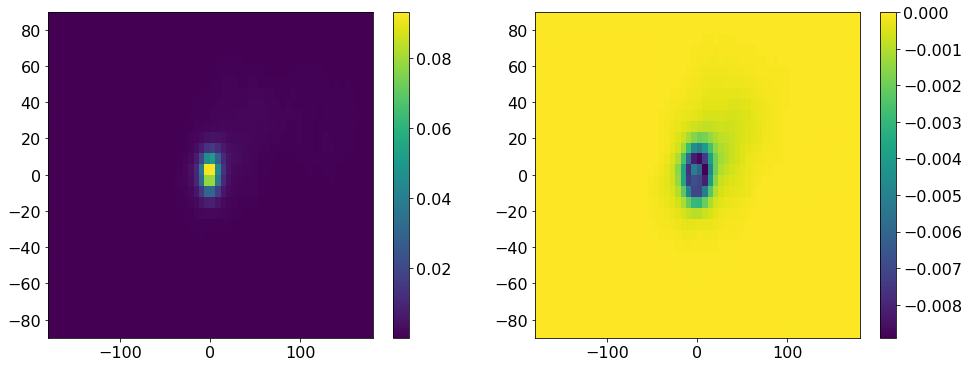

Convolving Delta image, iteration 70



Finding maximum acceleration parameter, iteration 70
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 70
Saving new map, and fitted parameters, iteration 70
Calculating Delta image, iteration 71, numerator


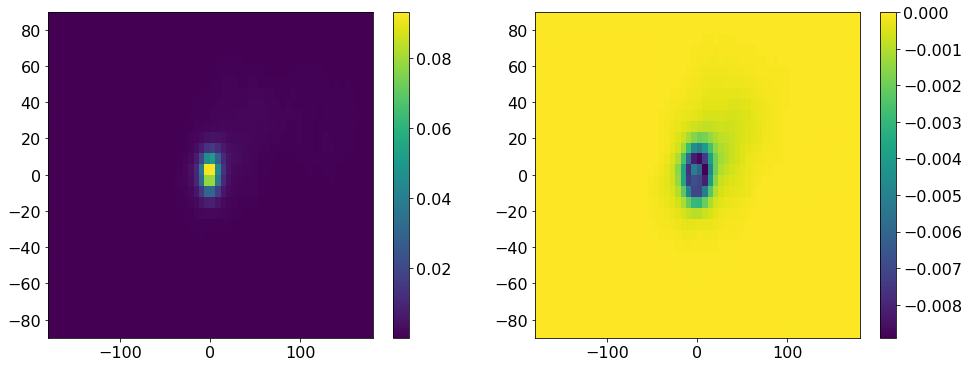

Convolving Delta image, iteration 71



Finding maximum acceleration parameter, iteration 71
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 71
Saving new map, and fitted parameters, iteration 71
Calculating Delta image, iteration 72, numerator


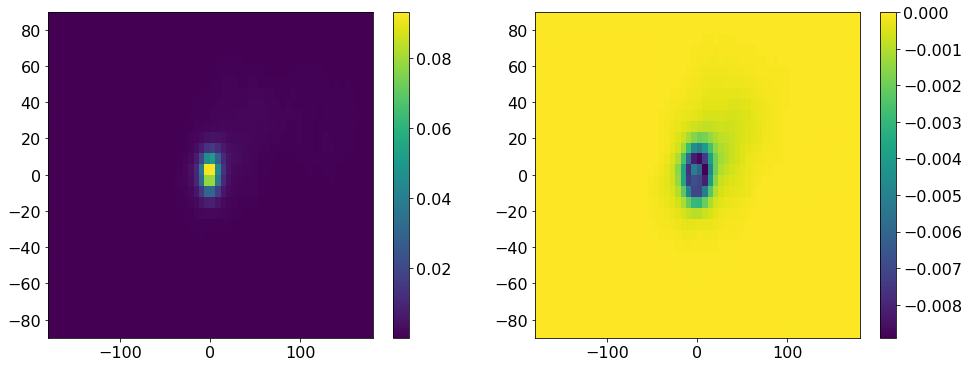

Convolving Delta image, iteration 72



Finding maximum acceleration parameter, iteration 72
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 72
Saving new map, and fitted parameters, iteration 72
Calculating Delta image, iteration 73, numerator


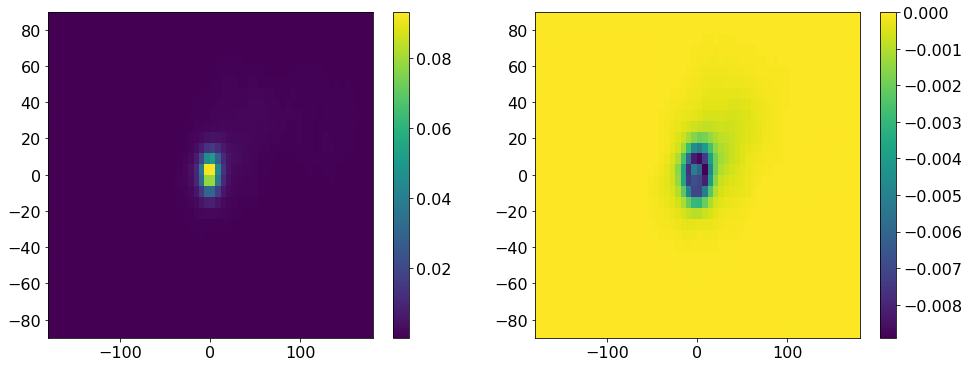

Convolving Delta image, iteration 73



Finding maximum acceleration parameter, iteration 73
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 73
Saving new map, and fitted parameters, iteration 73
Calculating Delta image, iteration 74, numerator


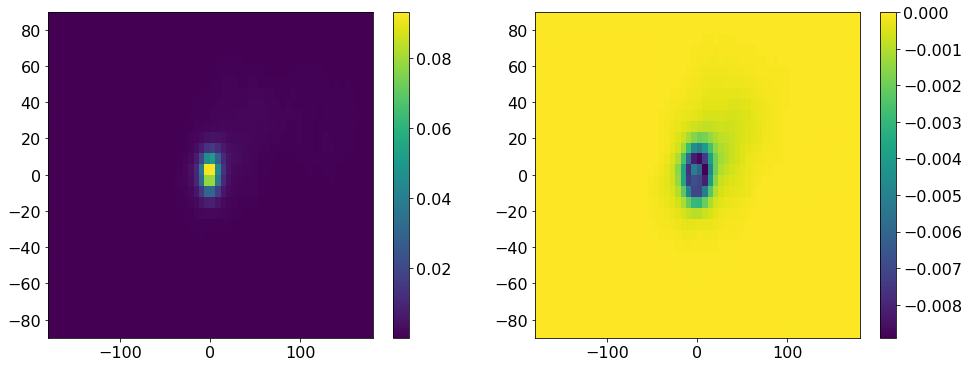

Convolving Delta image, iteration 74



Finding maximum acceleration parameter, iteration 74
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 74
Saving new map, and fitted parameters, iteration 74
Calculating Delta image, iteration 75, numerator


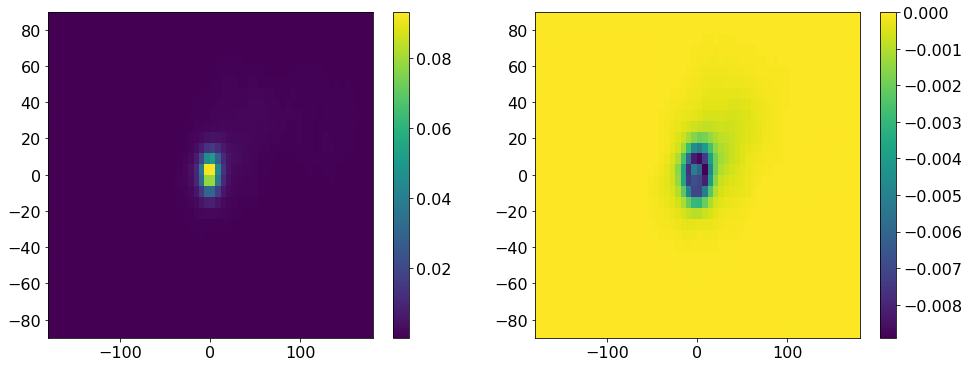

Convolving Delta image, iteration 75



Finding maximum acceleration parameter, iteration 75
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 75
Saving new map, and fitted parameters, iteration 75
Calculating Delta image, iteration 76, numerator


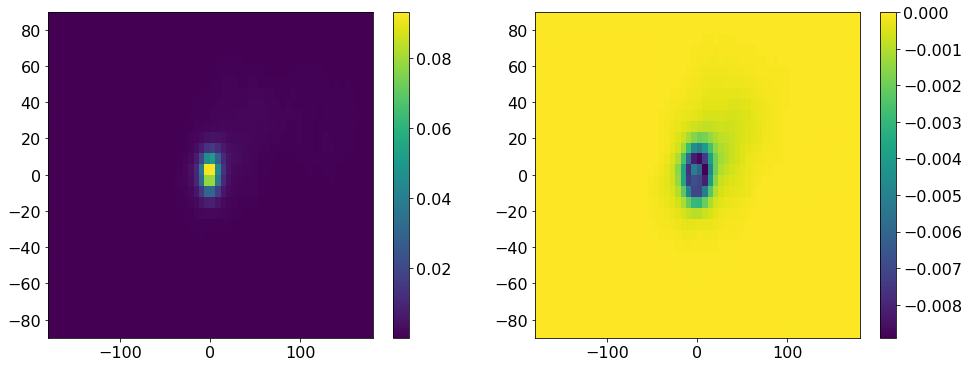

Convolving Delta image, iteration 76



Finding maximum acceleration parameter, iteration 76
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 76
Saving new map, and fitted parameters, iteration 76
Calculating Delta image, iteration 77, numerator


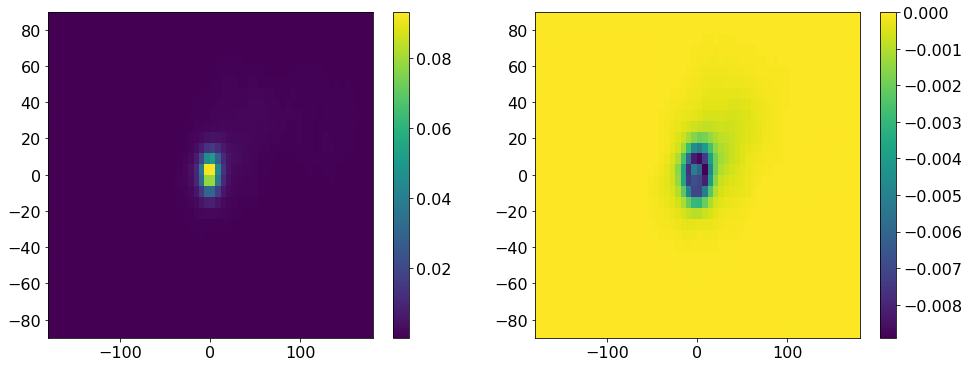

Convolving Delta image, iteration 77



Finding maximum acceleration parameter, iteration 77
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 77
Saving new map, and fitted parameters, iteration 77
Calculating Delta image, iteration 78, numerator


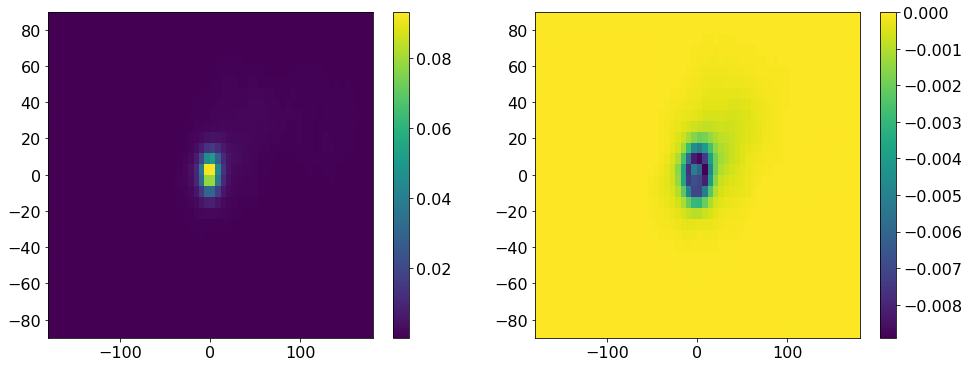

Convolving Delta image, iteration 78



Finding maximum acceleration parameter, iteration 78
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 78
Saving new map, and fitted parameters, iteration 78
Calculating Delta image, iteration 79, numerator


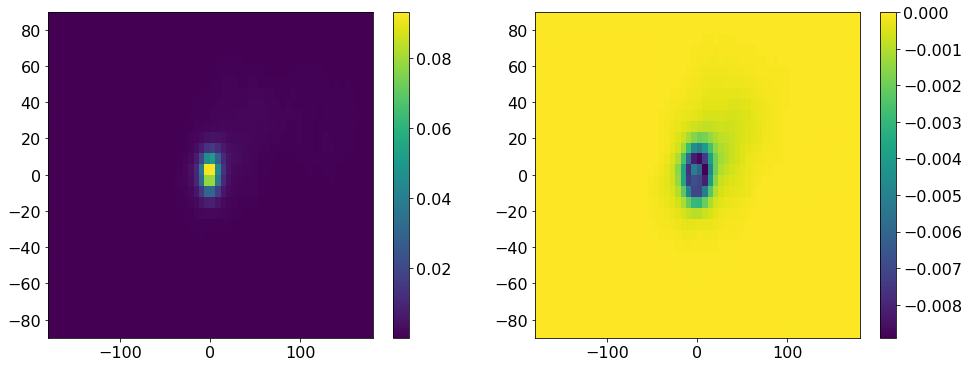

Convolving Delta image, iteration 79



Finding maximum acceleration parameter, iteration 79
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 79
Saving new map, and fitted parameters, iteration 79
Calculating Delta image, iteration 80, numerator


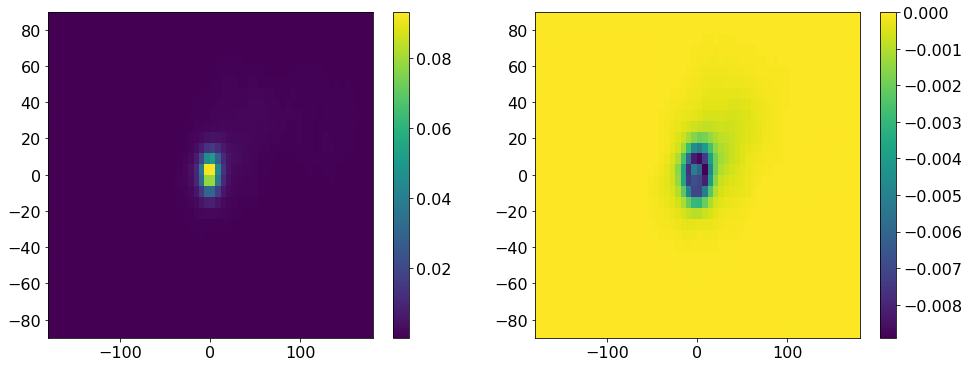

Convolving Delta image, iteration 80



Finding maximum acceleration parameter, iteration 80
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 80
Saving new map, and fitted parameters, iteration 80
Calculating Delta image, iteration 81, numerator


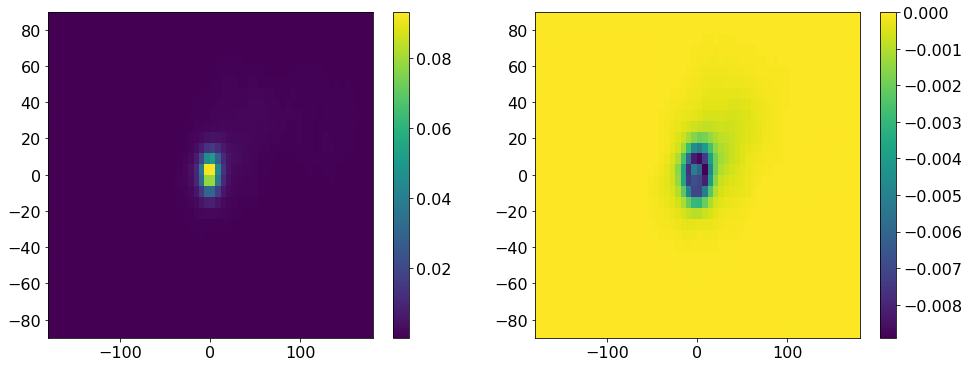

Convolving Delta image, iteration 81



Finding maximum acceleration parameter, iteration 81
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 81
Saving new map, and fitted parameters, iteration 81
Calculating Delta image, iteration 82, numerator


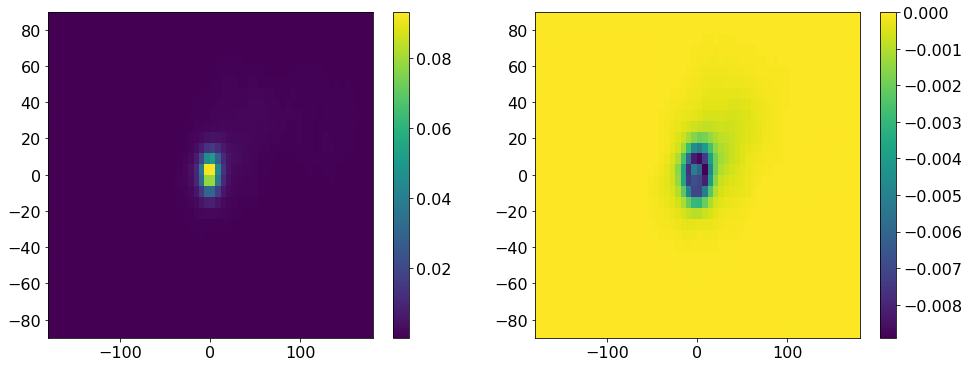

Convolving Delta image, iteration 82



Finding maximum acceleration parameter, iteration 82
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 82
Saving new map, and fitted parameters, iteration 82
Calculating Delta image, iteration 83, numerator


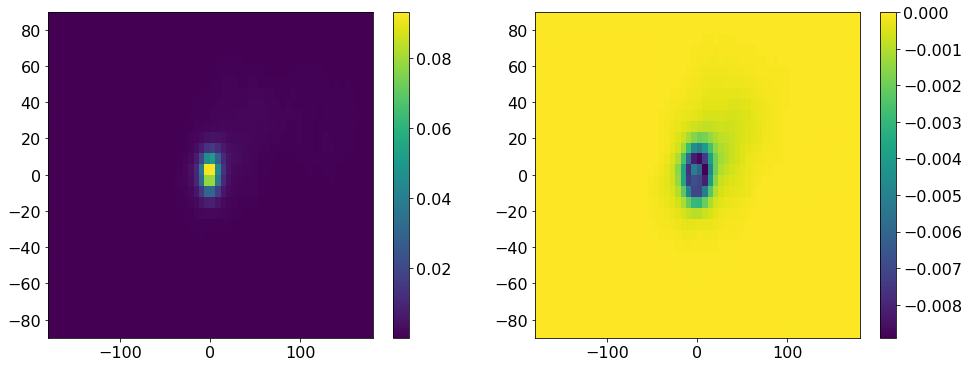

Convolving Delta image, iteration 83



Finding maximum acceleration parameter, iteration 83
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 83
Saving new map, and fitted parameters, iteration 83
Calculating Delta image, iteration 84, numerator


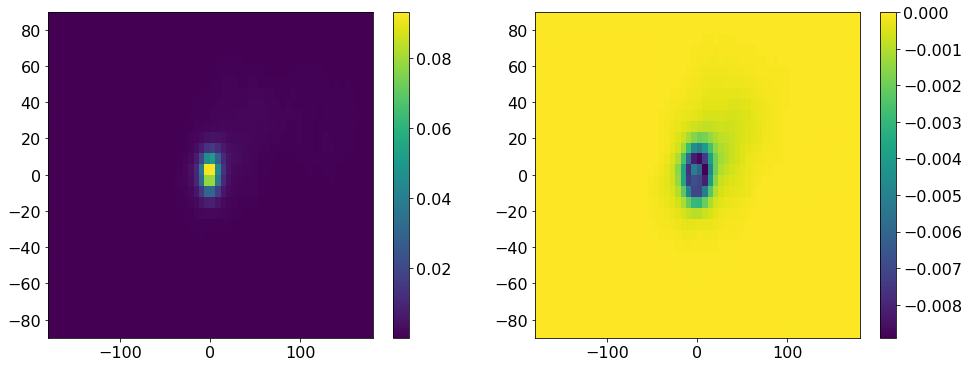

Convolving Delta image, iteration 84



Finding maximum acceleration parameter, iteration 84
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 84
Saving new map, and fitted parameters, iteration 84
Calculating Delta image, iteration 85, numerator


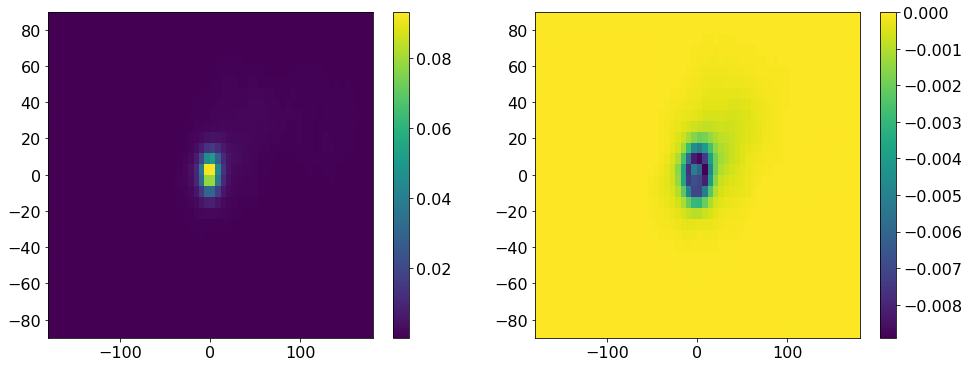

Convolving Delta image, iteration 85



Finding maximum acceleration parameter, iteration 85
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 85
Saving new map, and fitted parameters, iteration 85
Calculating Delta image, iteration 86, numerator


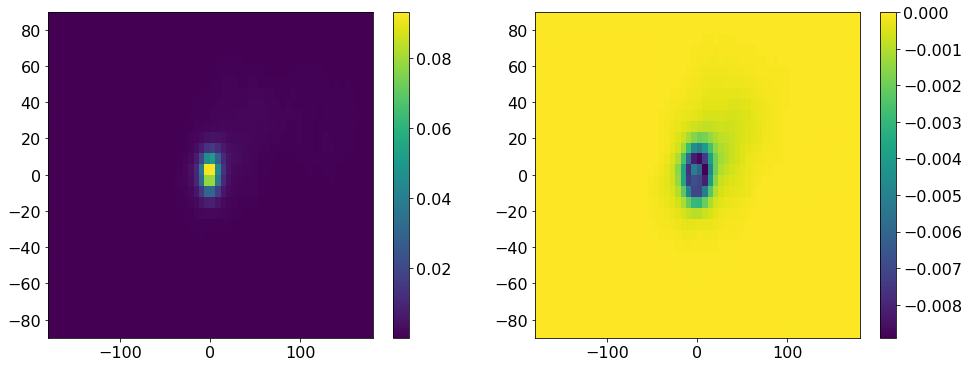

Convolving Delta image, iteration 86



Finding maximum acceleration parameter, iteration 86
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 86
Saving new map, and fitted parameters, iteration 86
Calculating Delta image, iteration 87, numerator


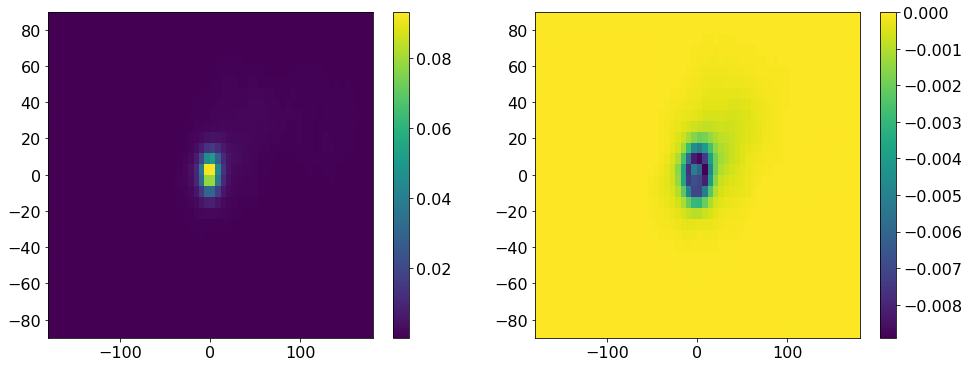

Convolving Delta image, iteration 87



Finding maximum acceleration parameter, iteration 87
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 87
Saving new map, and fitted parameters, iteration 87
Calculating Delta image, iteration 88, numerator


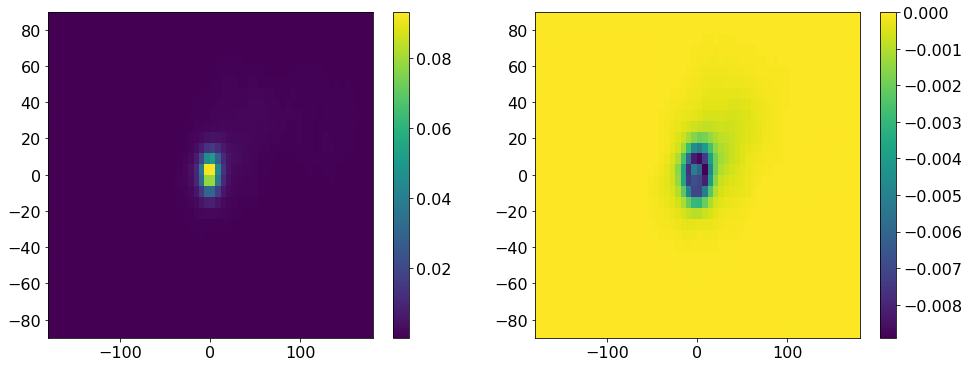

Convolving Delta image, iteration 88



Finding maximum acceleration parameter, iteration 88
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 88
Saving new map, and fitted parameters, iteration 88
Calculating Delta image, iteration 89, numerator


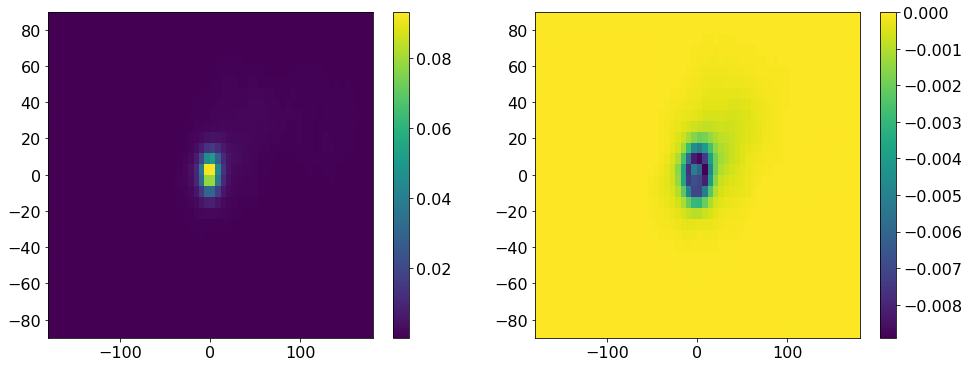

Convolving Delta image, iteration 89



Finding maximum acceleration parameter, iteration 89
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 89
Saving new map, and fitted parameters, iteration 89
Calculating Delta image, iteration 90, numerator


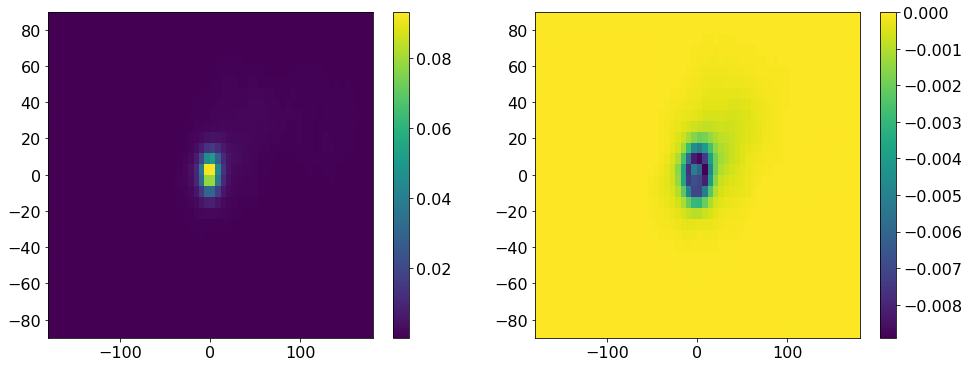

Convolving Delta image, iteration 90



Finding maximum acceleration parameter, iteration 90
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 90
Saving new map, and fitted parameters, iteration 90
Calculating Delta image, iteration 91, numerator


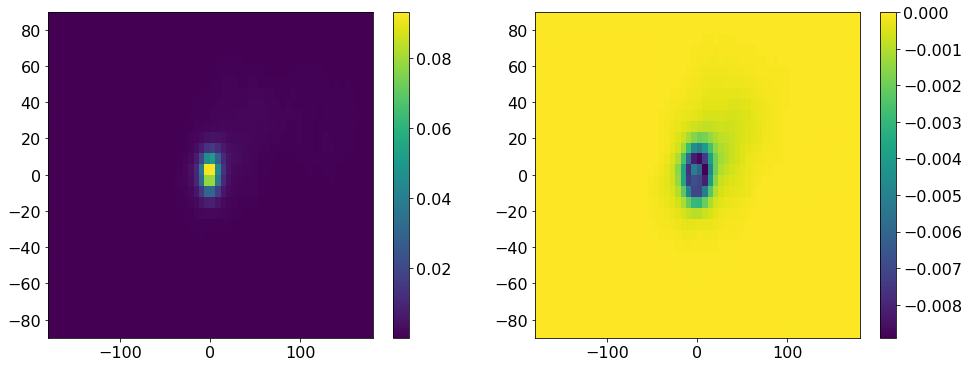

Convolving Delta image, iteration 91



Finding maximum acceleration parameter, iteration 91
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 91
Saving new map, and fitted parameters, iteration 91
Calculating Delta image, iteration 92, numerator


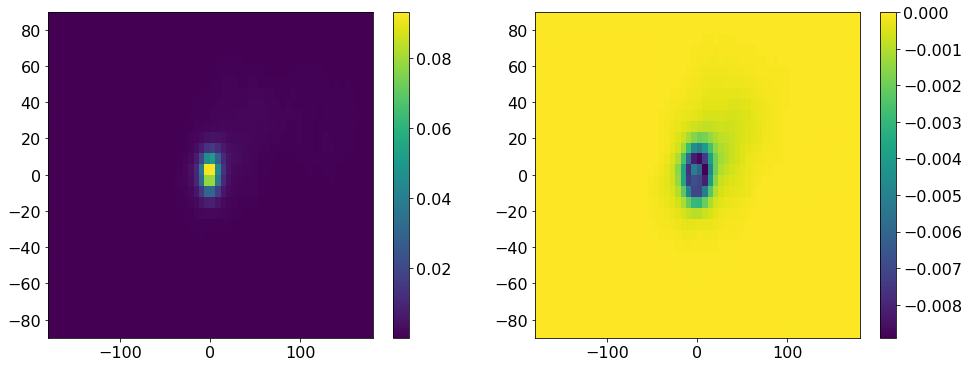

Convolving Delta image, iteration 92



Finding maximum acceleration parameter, iteration 92
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 92
Saving new map, and fitted parameters, iteration 92
Calculating Delta image, iteration 93, numerator


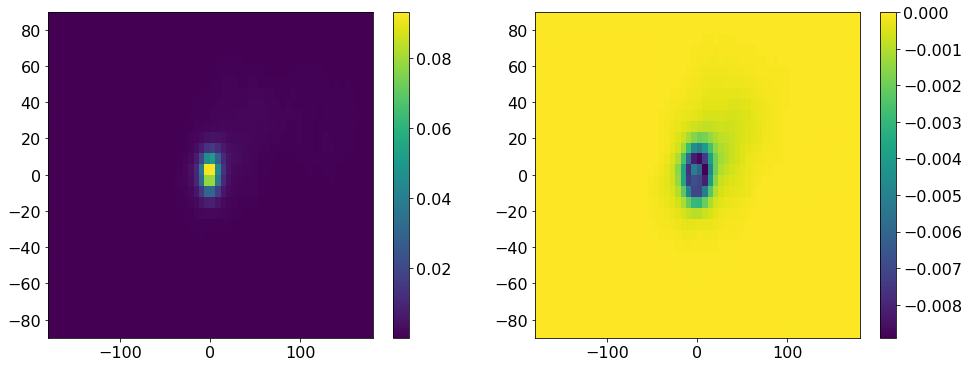

Convolving Delta image, iteration 93



Finding maximum acceleration parameter, iteration 93
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 93
Saving new map, and fitted parameters, iteration 93
Calculating Delta image, iteration 94, numerator


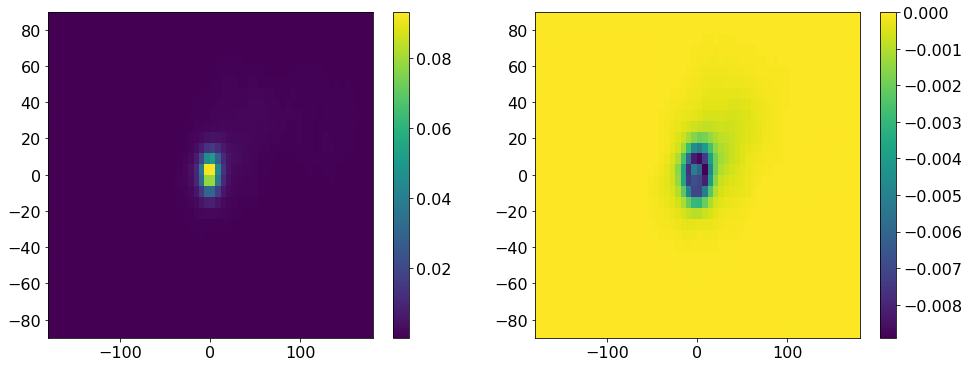

Convolving Delta image, iteration 94



Finding maximum acceleration parameter, iteration 94
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 94
Saving new map, and fitted parameters, iteration 94
Calculating Delta image, iteration 95, numerator


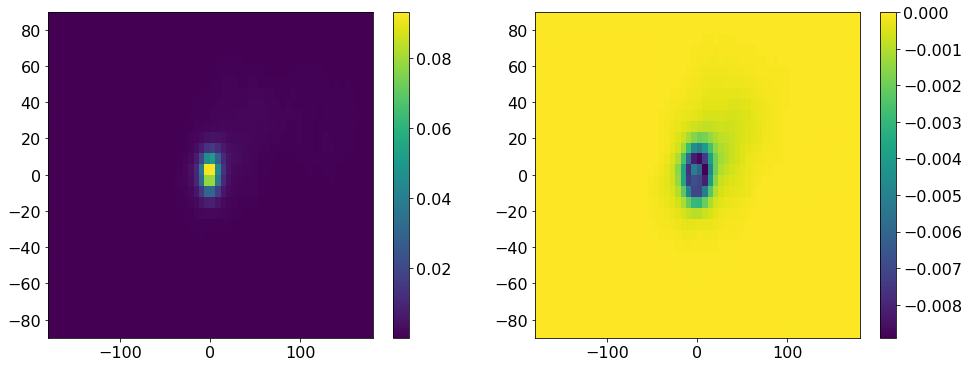

Convolving Delta image, iteration 95



Finding maximum acceleration parameter, iteration 95
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 95
Saving new map, and fitted parameters, iteration 95
Calculating Delta image, iteration 96, numerator


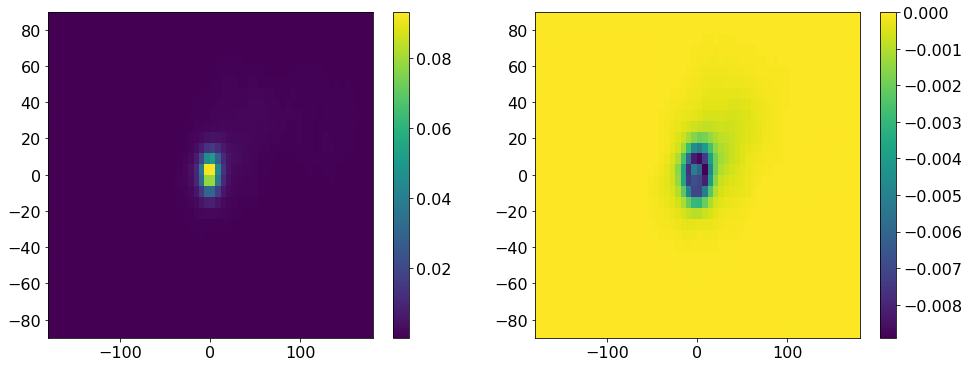

Convolving Delta image, iteration 96



Finding maximum acceleration parameter, iteration 96
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 96
Saving new map, and fitted parameters, iteration 96
Calculating Delta image, iteration 97, numerator


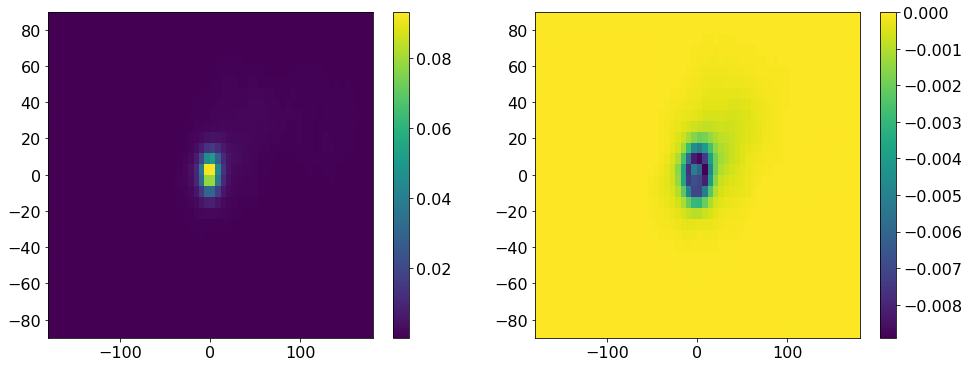

Convolving Delta image, iteration 97



Finding maximum acceleration parameter, iteration 97
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 97
Saving new map, and fitted parameters, iteration 97
Calculating Delta image, iteration 98, numerator


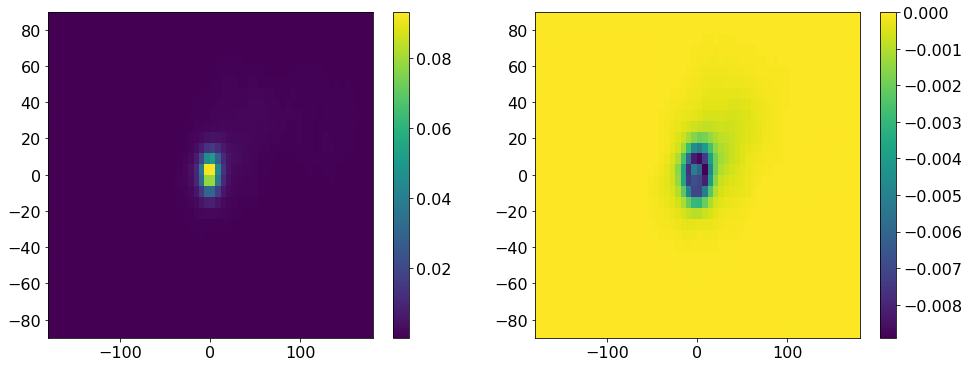

Convolving Delta image, iteration 98



Finding maximum acceleration parameter, iteration 98
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 98
Saving new map, and fitted parameters, iteration 98
Calculating Delta image, iteration 99, numerator


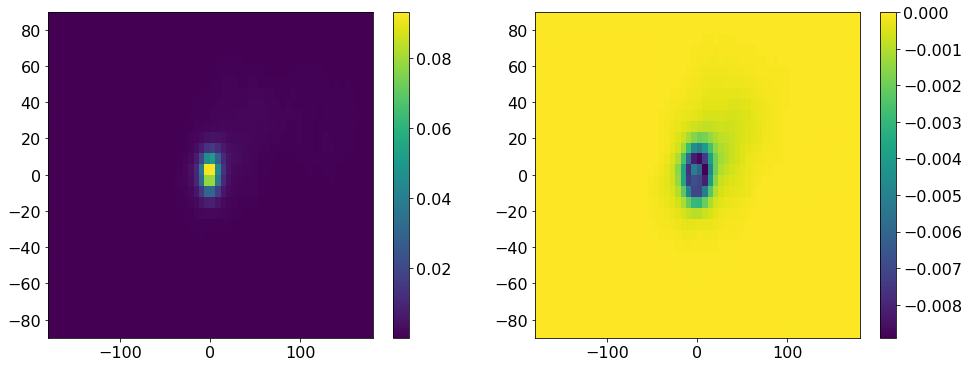

Convolving Delta image, iteration 99



Finding maximum acceleration parameter, iteration 99
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 99
Saving new map, and fitted parameters, iteration 99
Calculating Delta image, iteration 100, numerator


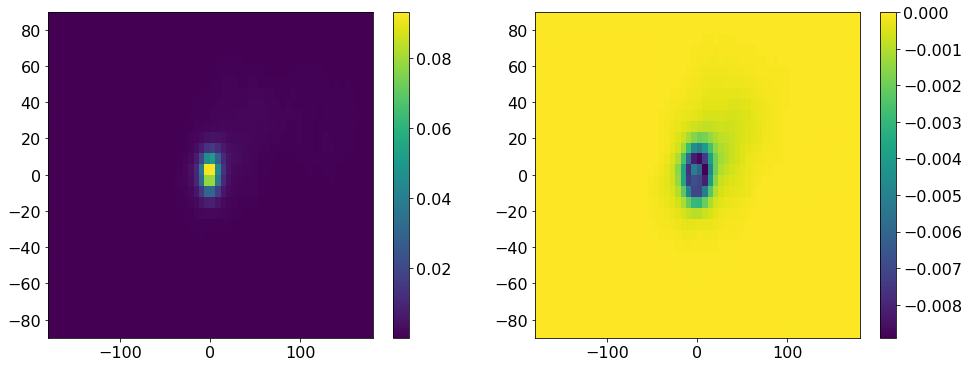

Convolving Delta image, iteration 100



Finding maximum acceleration parameter, iteration 100
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 100
Saving new map, and fitted parameters, iteration 100
Calculating Delta image, iteration 101, numerator


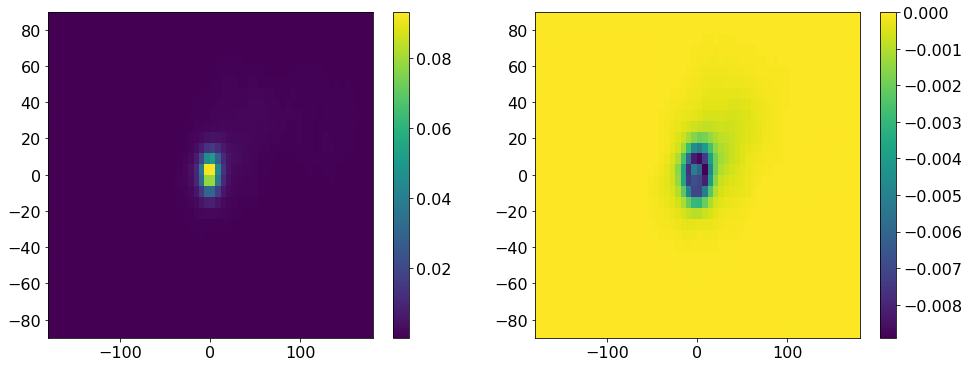

Convolving Delta image, iteration 101



Finding maximum acceleration parameter, iteration 101
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 101
Saving new map, and fitted parameters, iteration 101
Calculating Delta image, iteration 102, numerator


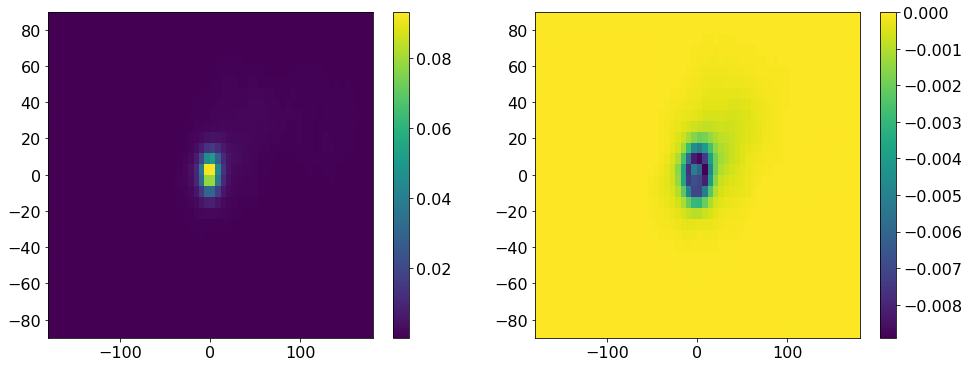

Convolving Delta image, iteration 102



Finding maximum acceleration parameter, iteration 102
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 102
Saving new map, and fitted parameters, iteration 102
Calculating Delta image, iteration 103, numerator


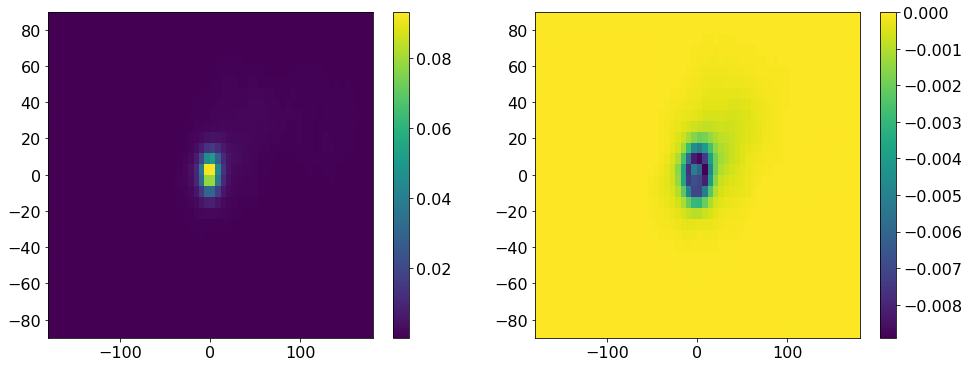

Convolving Delta image, iteration 103



Finding maximum acceleration parameter, iteration 103
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 103
Saving new map, and fitted parameters, iteration 103
Calculating Delta image, iteration 104, numerator


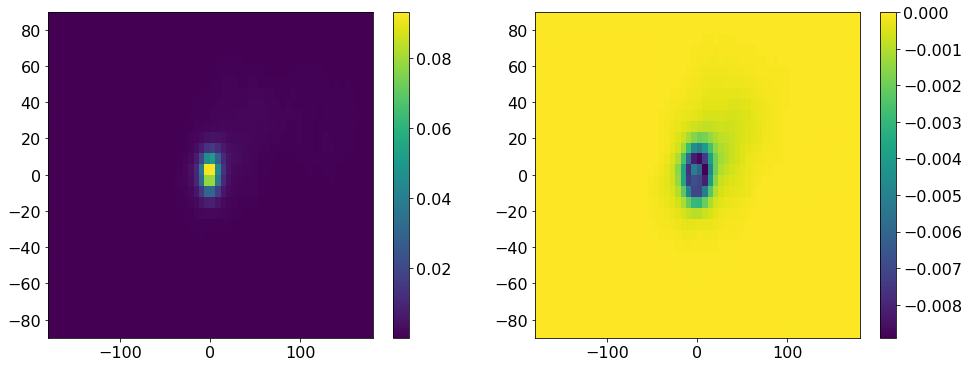

Convolving Delta image, iteration 104



Finding maximum acceleration parameter, iteration 104
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 104
Saving new map, and fitted parameters, iteration 104
Calculating Delta image, iteration 105, numerator


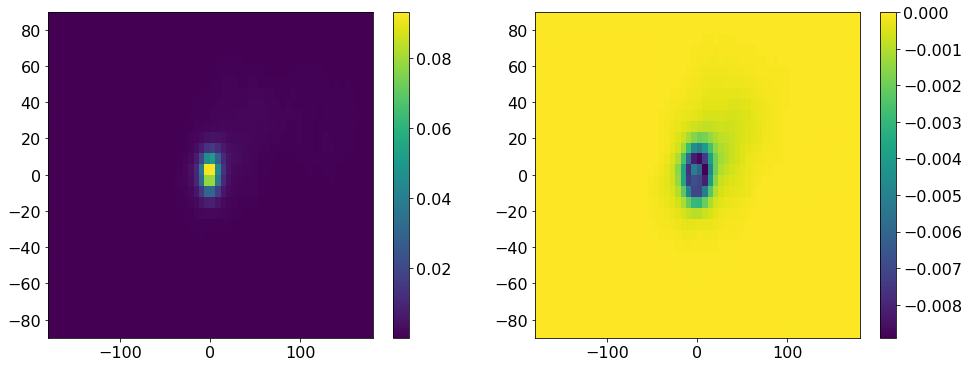

Convolving Delta image, iteration 105



Finding maximum acceleration parameter, iteration 105
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 105
Saving new map, and fitted parameters, iteration 105
Calculating Delta image, iteration 106, numerator


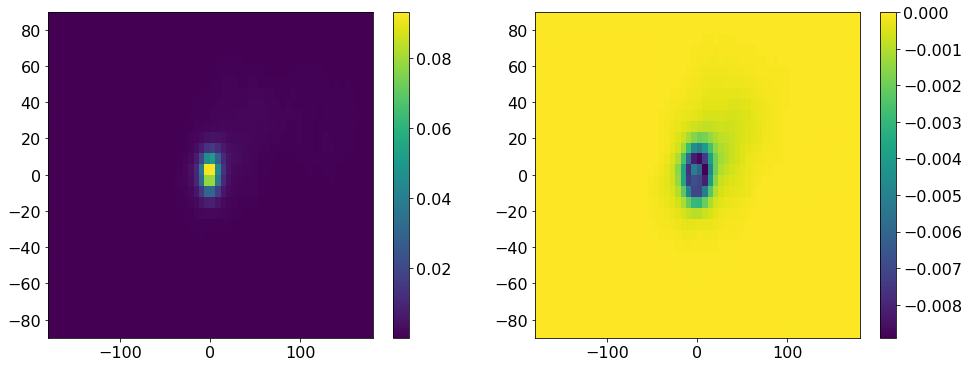

Convolving Delta image, iteration 106



Finding maximum acceleration parameter, iteration 106
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 106
Saving new map, and fitted parameters, iteration 106
Calculating Delta image, iteration 107, numerator


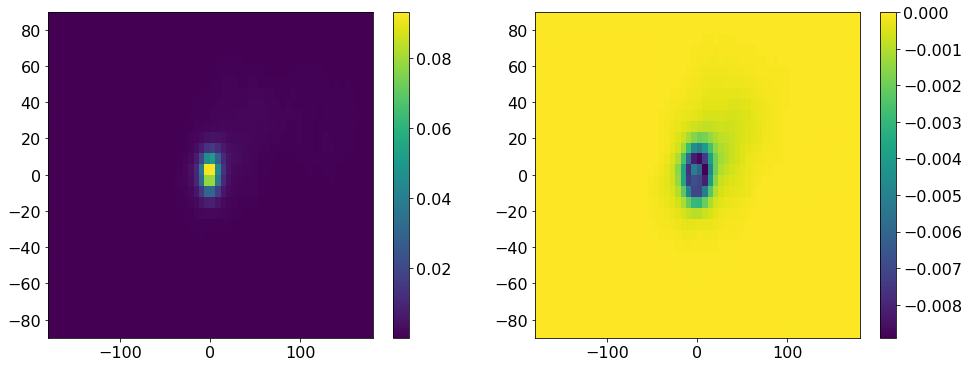

Convolving Delta image, iteration 107



Finding maximum acceleration parameter, iteration 107
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 107
Saving new map, and fitted parameters, iteration 107
Calculating Delta image, iteration 108, numerator


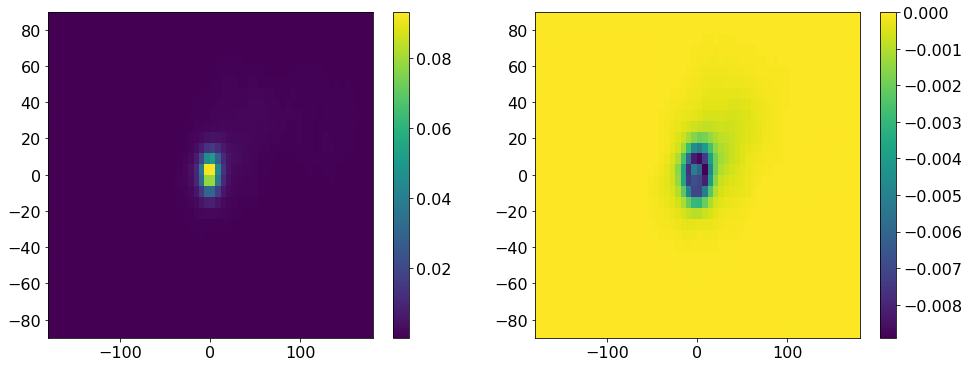

Convolving Delta image, iteration 108



Finding maximum acceleration parameter, iteration 108
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 108
Saving new map, and fitted parameters, iteration 108
Calculating Delta image, iteration 109, numerator


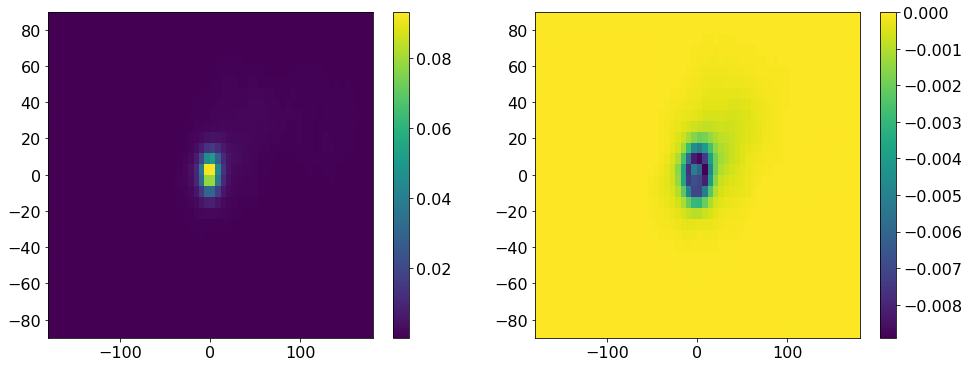

Convolving Delta image, iteration 109



Finding maximum acceleration parameter, iteration 109
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 109
Saving new map, and fitted parameters, iteration 109
Calculating Delta image, iteration 110, numerator


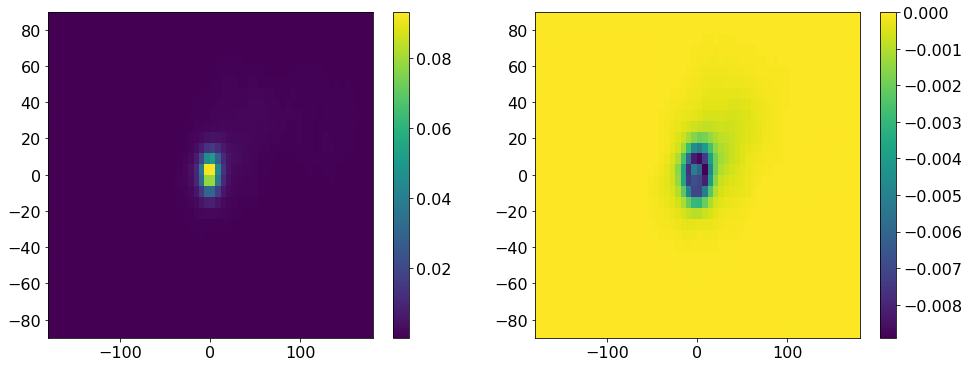

Convolving Delta image, iteration 110



Finding maximum acceleration parameter, iteration 110
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 110
Saving new map, and fitted parameters, iteration 110
Calculating Delta image, iteration 111, numerator


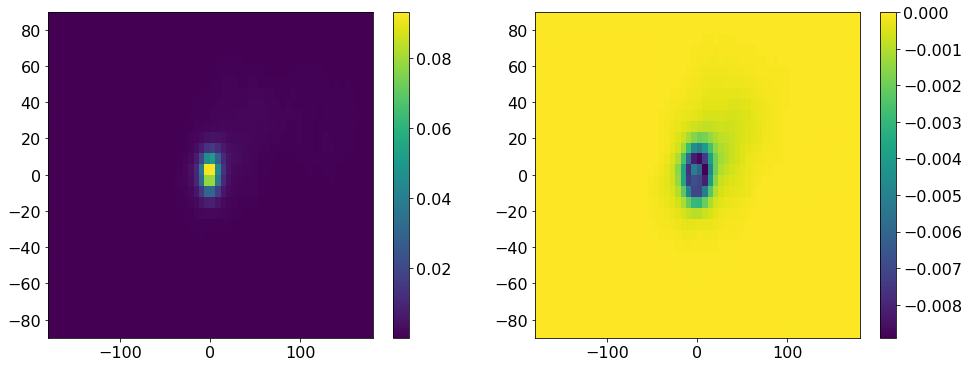

Convolving Delta image, iteration 111



Finding maximum acceleration parameter, iteration 111
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 111
Saving new map, and fitted parameters, iteration 111
Calculating Delta image, iteration 112, numerator


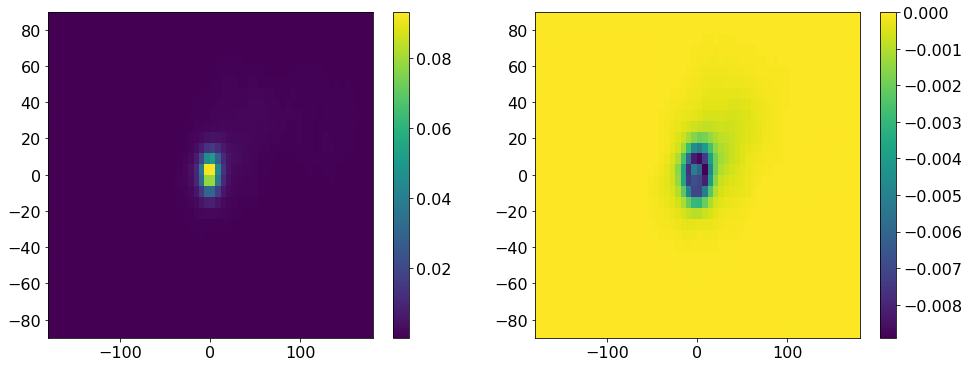

Convolving Delta image, iteration 112



Finding maximum acceleration parameter, iteration 112
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 112
Saving new map, and fitted parameters, iteration 112
Calculating Delta image, iteration 113, numerator


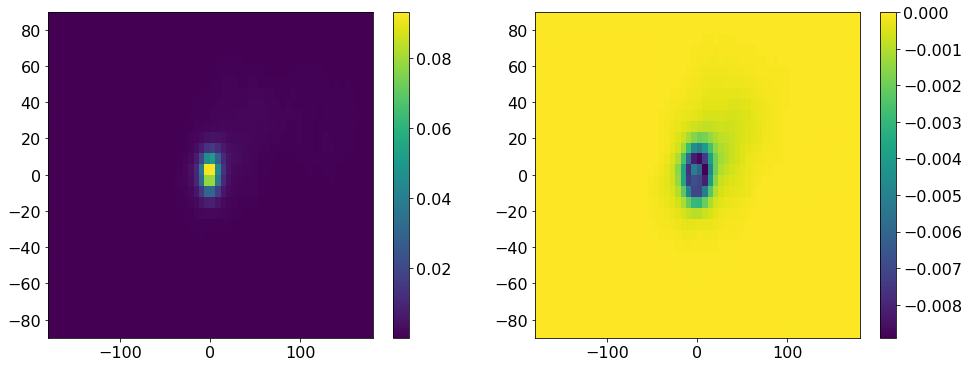

Convolving Delta image, iteration 113



Finding maximum acceleration parameter, iteration 113
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 113
Saving new map, and fitted parameters, iteration 113
Calculating Delta image, iteration 114, numerator


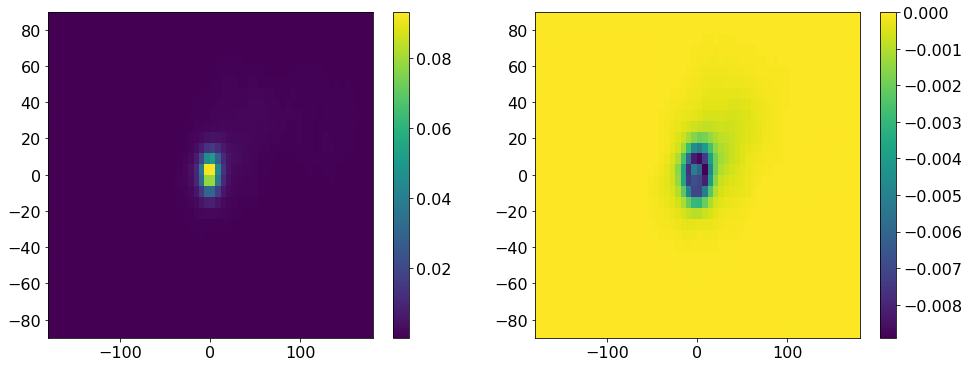

Convolving Delta image, iteration 114



Finding maximum acceleration parameter, iteration 114
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 114
Saving new map, and fitted parameters, iteration 114
Calculating Delta image, iteration 115, numerator


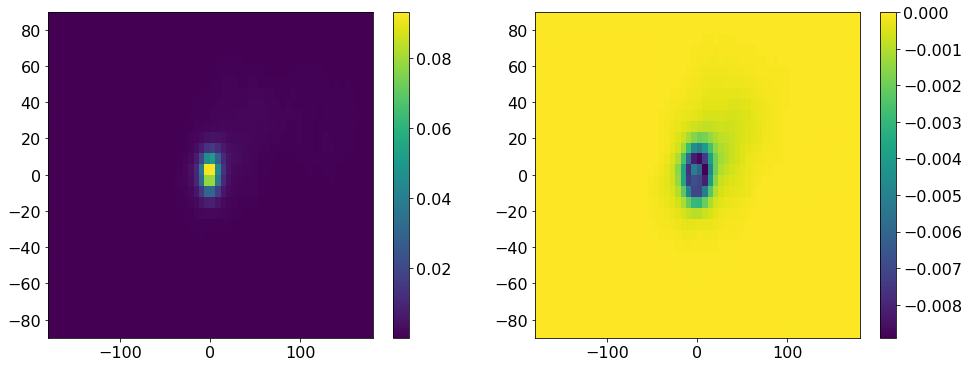

Convolving Delta image, iteration 115



Finding maximum acceleration parameter, iteration 115
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 115
Saving new map, and fitted parameters, iteration 115
Calculating Delta image, iteration 116, numerator


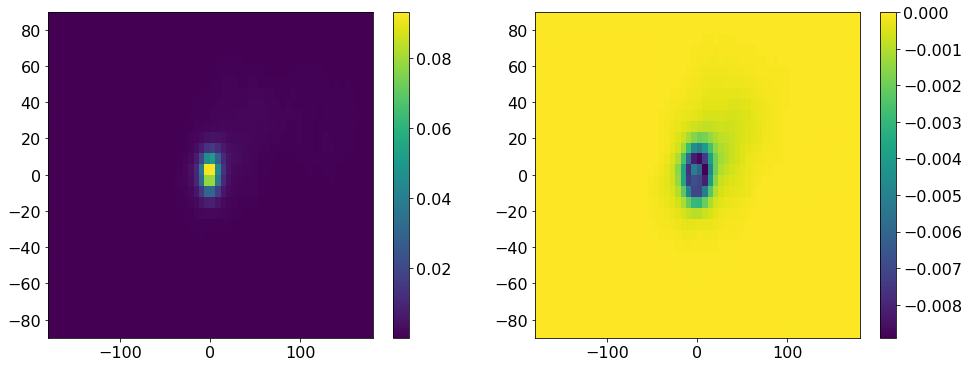

Convolving Delta image, iteration 116



Finding maximum acceleration parameter, iteration 116
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 116
Saving new map, and fitted parameters, iteration 116
Calculating Delta image, iteration 117, numerator


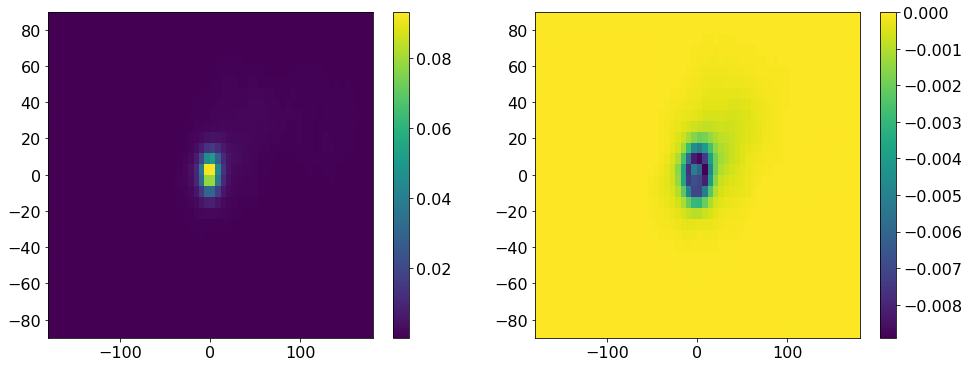

Convolving Delta image, iteration 117



Finding maximum acceleration parameter, iteration 117
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 117
Saving new map, and fitted parameters, iteration 117
Calculating Delta image, iteration 118, numerator


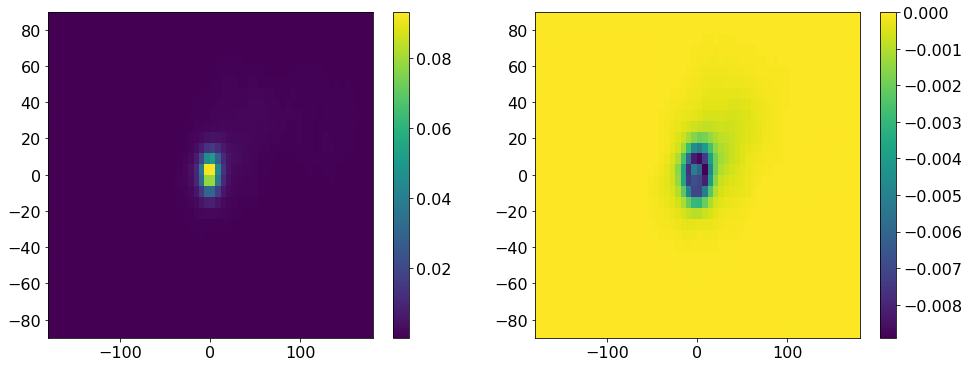

Convolving Delta image, iteration 118



Finding maximum acceleration parameter, iteration 118
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 118
Saving new map, and fitted parameters, iteration 118
Calculating Delta image, iteration 119, numerator


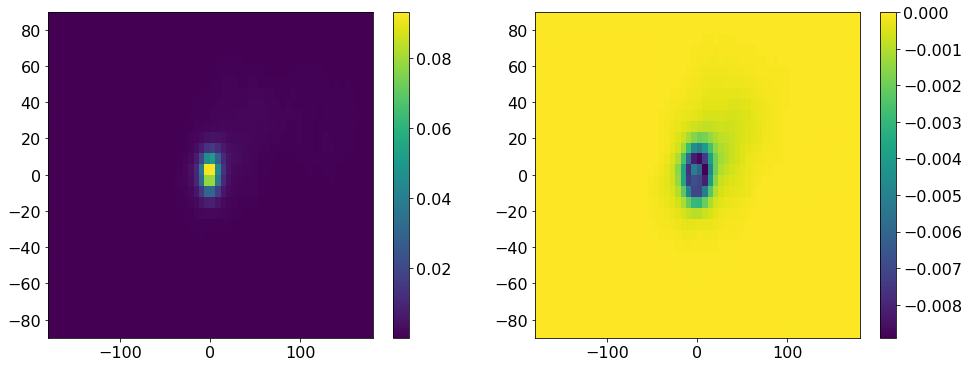

Convolving Delta image, iteration 119



Finding maximum acceleration parameter, iteration 119
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 119
Saving new map, and fitted parameters, iteration 119
Calculating Delta image, iteration 120, numerator


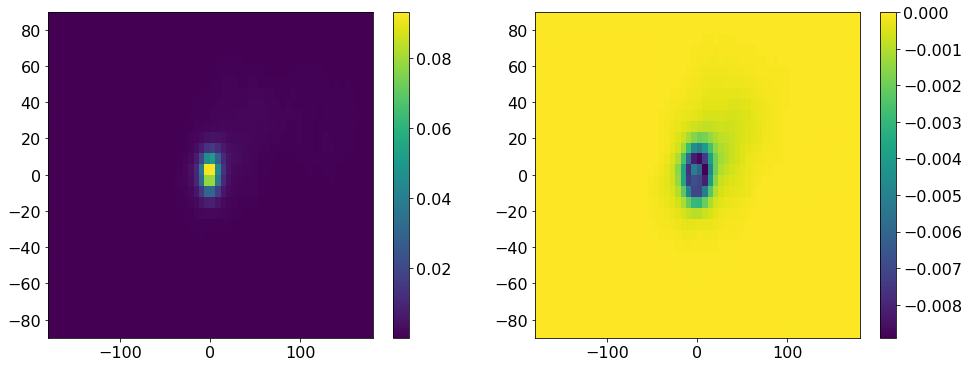

Convolving Delta image, iteration 120



Finding maximum acceleration parameter, iteration 120
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 120
Saving new map, and fitted parameters, iteration 120
Calculating Delta image, iteration 121, numerator


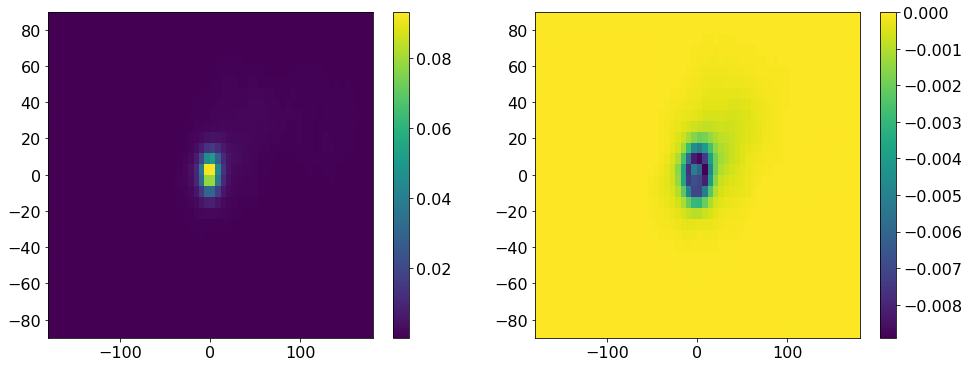

Convolving Delta image, iteration 121



Finding maximum acceleration parameter, iteration 121
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 121
Saving new map, and fitted parameters, iteration 121
Calculating Delta image, iteration 122, numerator


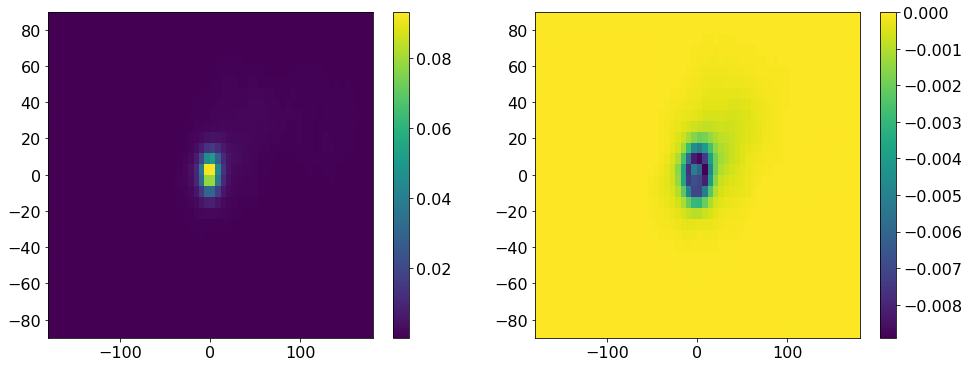

Convolving Delta image, iteration 122



Finding maximum acceleration parameter, iteration 122
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 122
Saving new map, and fitted parameters, iteration 122
Calculating Delta image, iteration 123, numerator


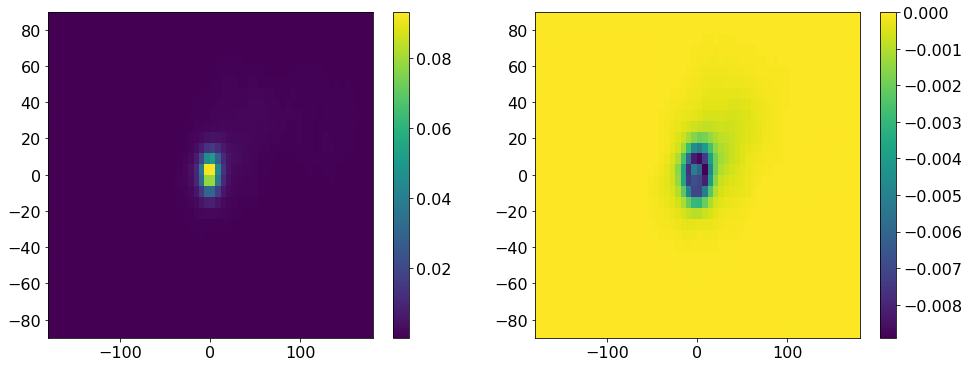

Convolving Delta image, iteration 123



Finding maximum acceleration parameter, iteration 123
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 123
Saving new map, and fitted parameters, iteration 123
Calculating Delta image, iteration 124, numerator


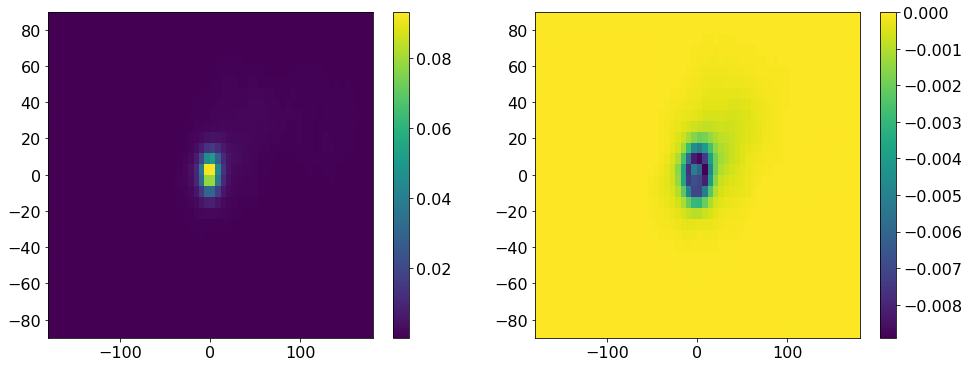

Convolving Delta image, iteration 124



Finding maximum acceleration parameter, iteration 124
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 124
Saving new map, and fitted parameters, iteration 124
Calculating Delta image, iteration 125, numerator


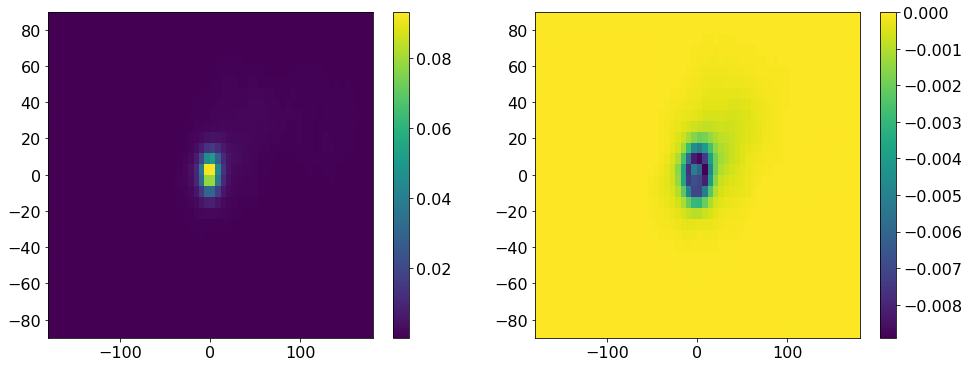

Convolving Delta image, iteration 125



Finding maximum acceleration parameter, iteration 125
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 125
Saving new map, and fitted parameters, iteration 125
Calculating Delta image, iteration 126, numerator


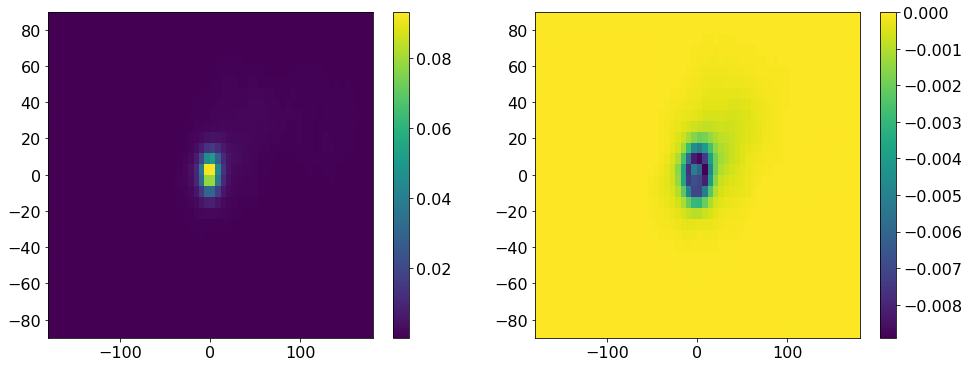

Convolving Delta image, iteration 126



Finding maximum acceleration parameter, iteration 126
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 126
Saving new map, and fitted parameters, iteration 126
Calculating Delta image, iteration 127, numerator


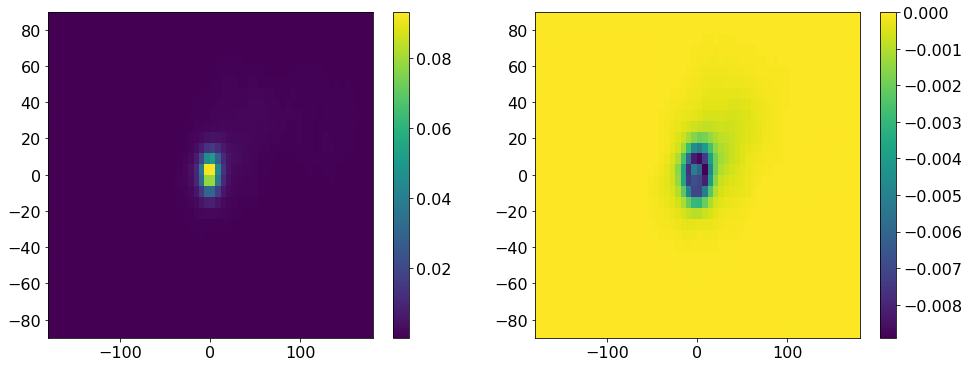

Convolving Delta image, iteration 127



Finding maximum acceleration parameter, iteration 127
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 127
Saving new map, and fitted parameters, iteration 127
Calculating Delta image, iteration 128, numerator


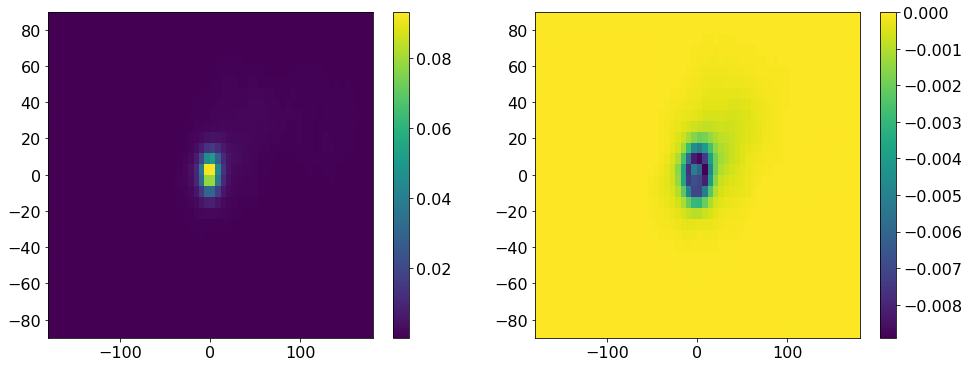

Convolving Delta image, iteration 128



Finding maximum acceleration parameter, iteration 128
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 128
Saving new map, and fitted parameters, iteration 128
Calculating Delta image, iteration 129, numerator


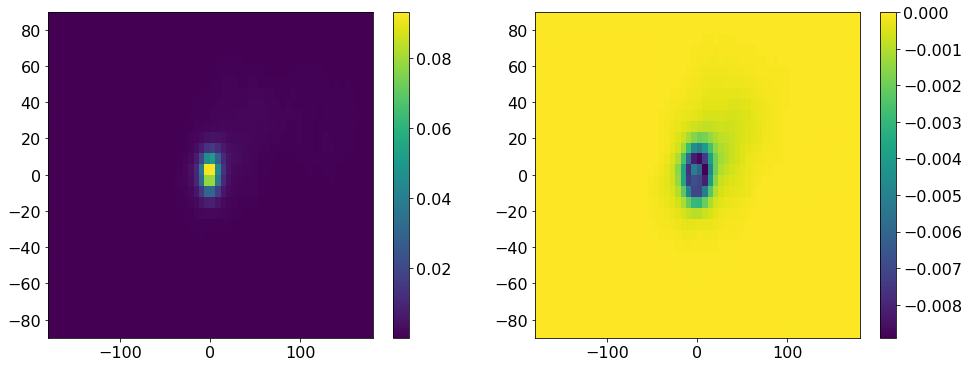

Convolving Delta image, iteration 129



Finding maximum acceleration parameter, iteration 129
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 129
Saving new map, and fitted parameters, iteration 129
Calculating Delta image, iteration 130, numerator


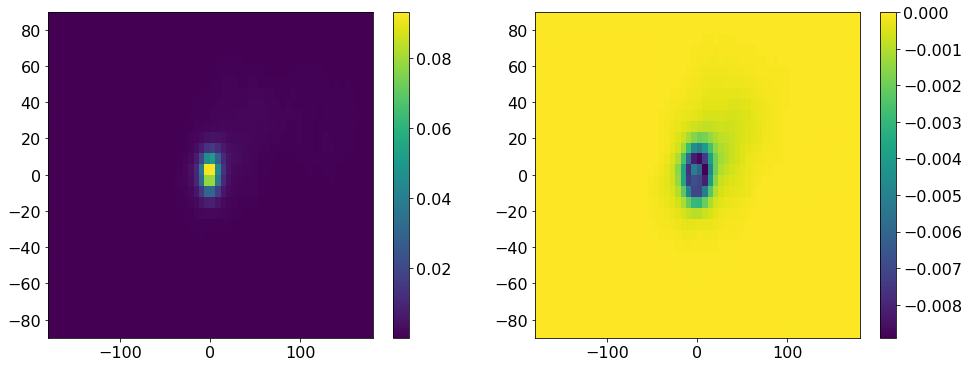

Convolving Delta image, iteration 130



Finding maximum acceleration parameter, iteration 130
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 130
Saving new map, and fitted parameters, iteration 130
Calculating Delta image, iteration 131, numerator


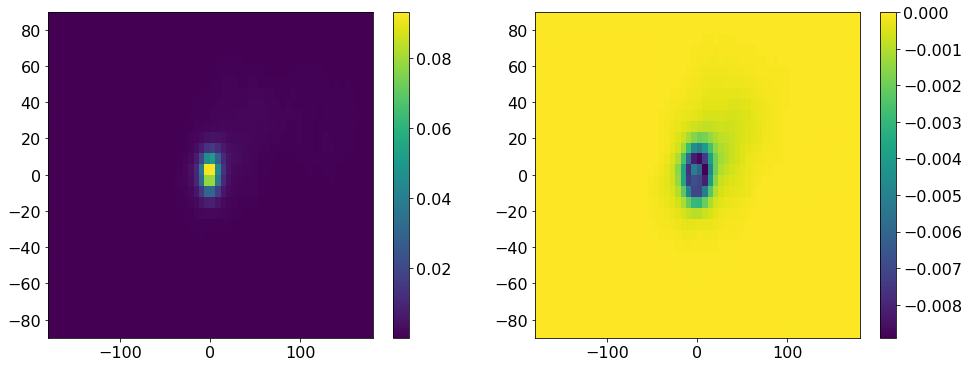

Convolving Delta image, iteration 131



Finding maximum acceleration parameter, iteration 131
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 131
Saving new map, and fitted parameters, iteration 131
Calculating Delta image, iteration 132, numerator


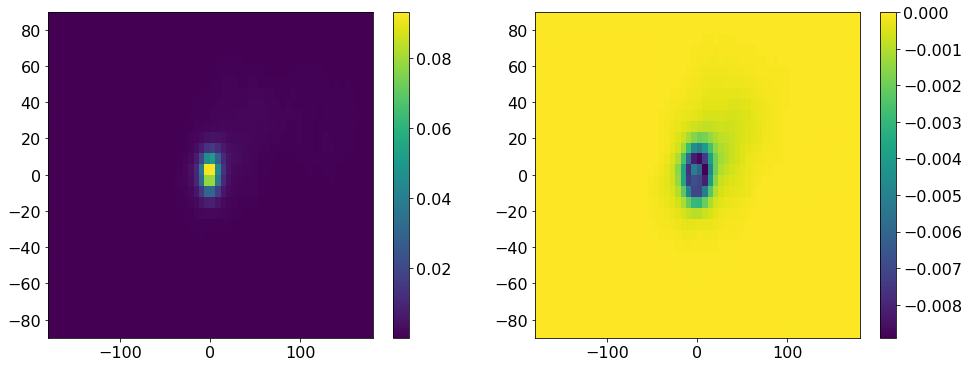

Convolving Delta image, iteration 132



Finding maximum acceleration parameter, iteration 132
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 132
Saving new map, and fitted parameters, iteration 132
Calculating Delta image, iteration 133, numerator


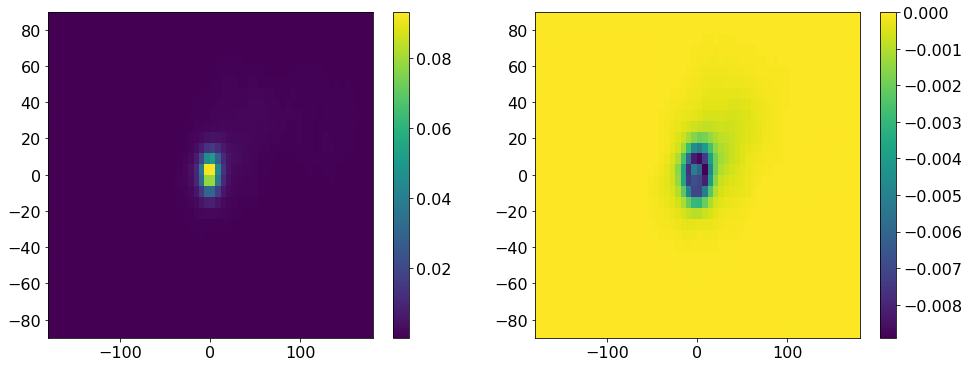

Convolving Delta image, iteration 133



Finding maximum acceleration parameter, iteration 133
Maximum acceleration parameter found:  1.679
Fitting delta-map in addition to old map, iteration 133
############## Fit failed! proceeding without acceleration ##############
Calculating Delta image, iteration 134, numerator


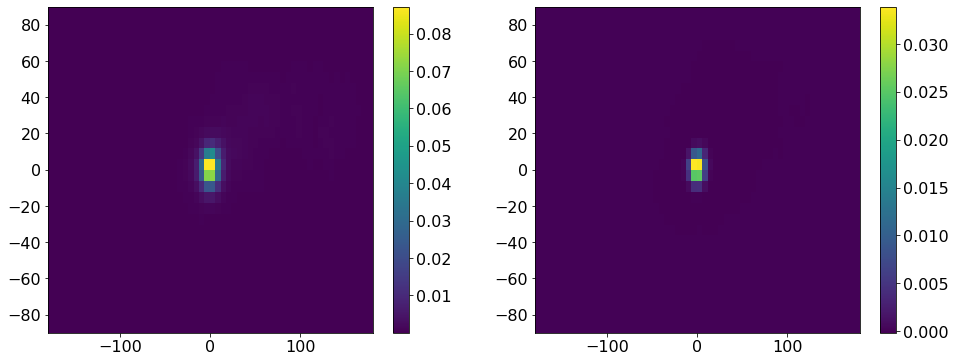

Convolving Delta image, iteration 134



Finding maximum acceleration parameter, iteration 134
Maximum acceleration parameter found:  1.684
Fitting delta-map in addition to old map, iteration 134
Saving new map, and fitted parameters, iteration 134
Calculating Delta image, iteration 135, numerator


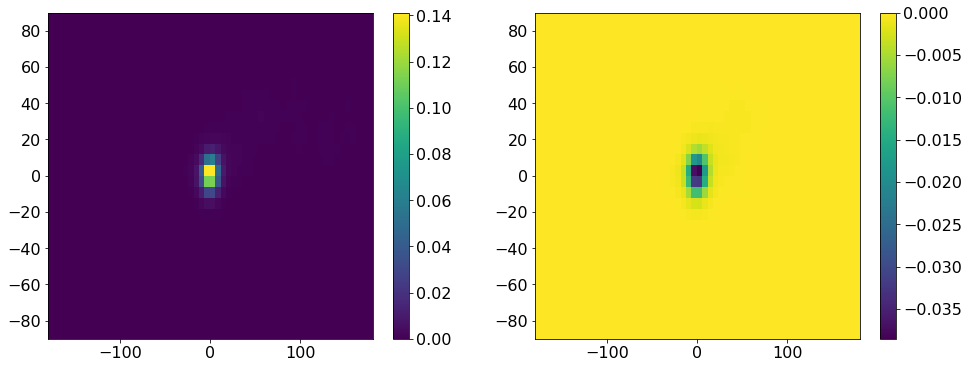

Convolving Delta image, iteration 135



Finding maximum acceleration parameter, iteration 135
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 135
Saving new map, and fitted parameters, iteration 135
Calculating Delta image, iteration 136, numerator


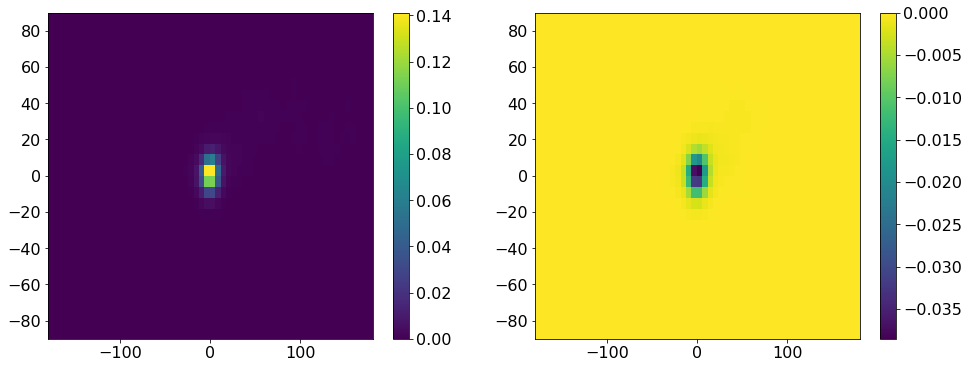

Convolving Delta image, iteration 136



Finding maximum acceleration parameter, iteration 136
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 136
Saving new map, and fitted parameters, iteration 136
Calculating Delta image, iteration 137, numerator


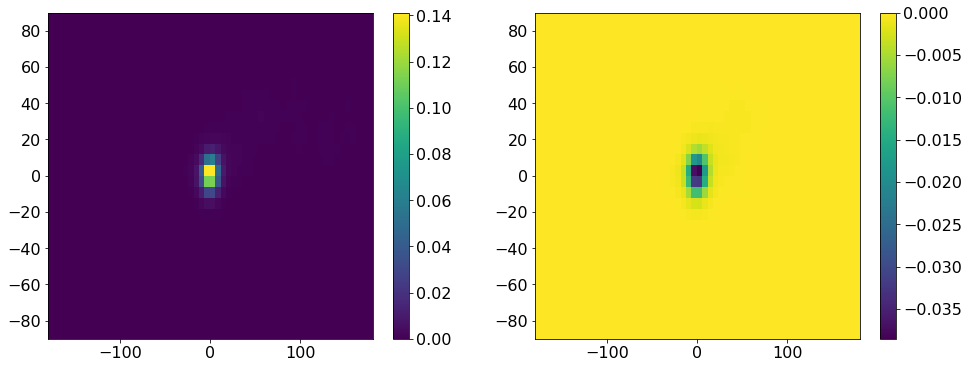

Convolving Delta image, iteration 137



Finding maximum acceleration parameter, iteration 137
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 137
Saving new map, and fitted parameters, iteration 137
Calculating Delta image, iteration 138, numerator


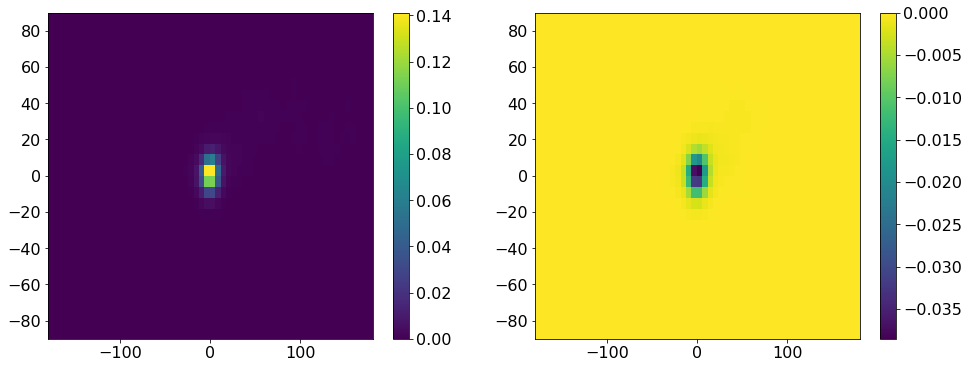

Convolving Delta image, iteration 138



Finding maximum acceleration parameter, iteration 138
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 138
Saving new map, and fitted parameters, iteration 138
Calculating Delta image, iteration 139, numerator


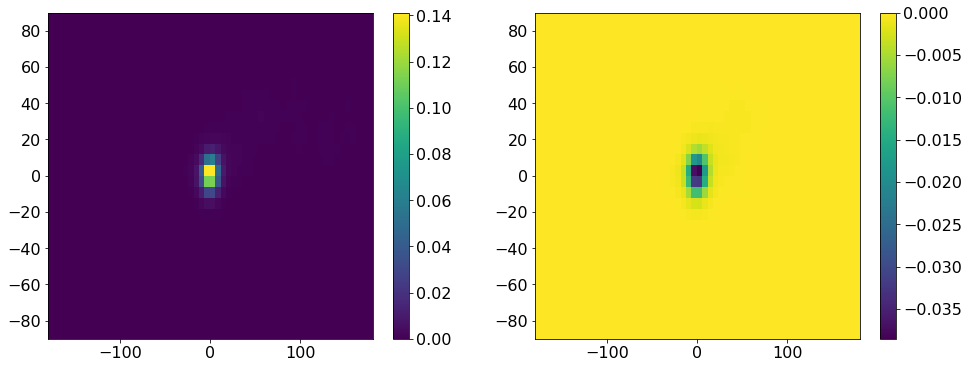

Convolving Delta image, iteration 139



Finding maximum acceleration parameter, iteration 139
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 139
Saving new map, and fitted parameters, iteration 139
Calculating Delta image, iteration 140, numerator


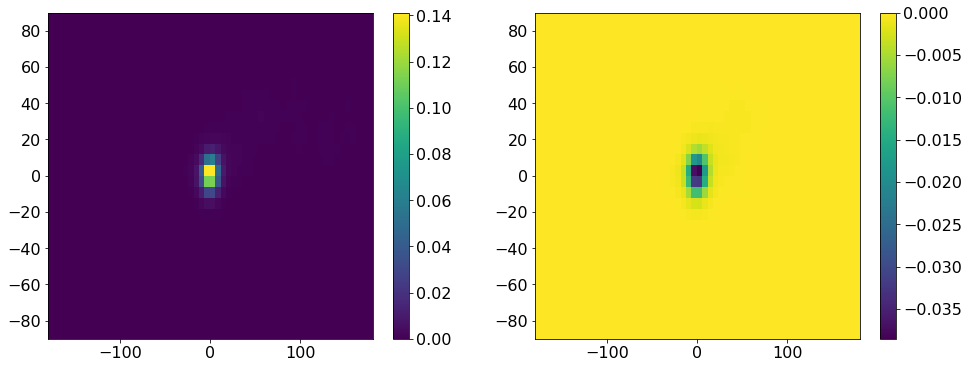

Convolving Delta image, iteration 140



Finding maximum acceleration parameter, iteration 140
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 140
Saving new map, and fitted parameters, iteration 140
Calculating Delta image, iteration 141, numerator


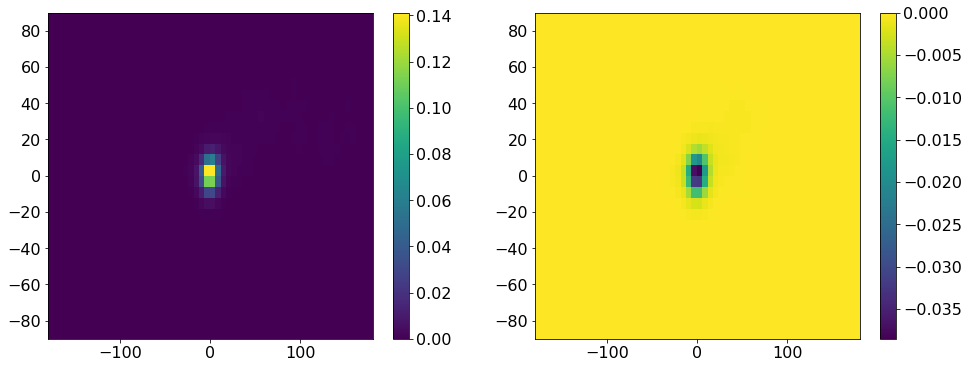

Convolving Delta image, iteration 141



Finding maximum acceleration parameter, iteration 141
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 141
Saving new map, and fitted parameters, iteration 141
Calculating Delta image, iteration 142, numerator


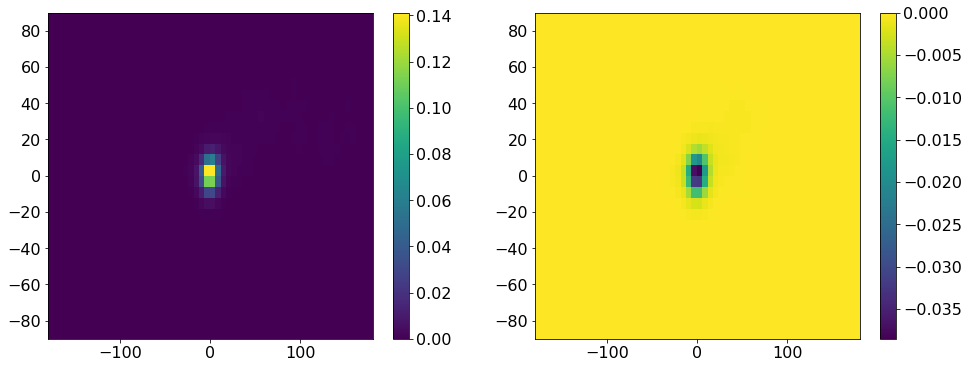

Convolving Delta image, iteration 142



Finding maximum acceleration parameter, iteration 142
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 142
Saving new map, and fitted parameters, iteration 142
Calculating Delta image, iteration 143, numerator


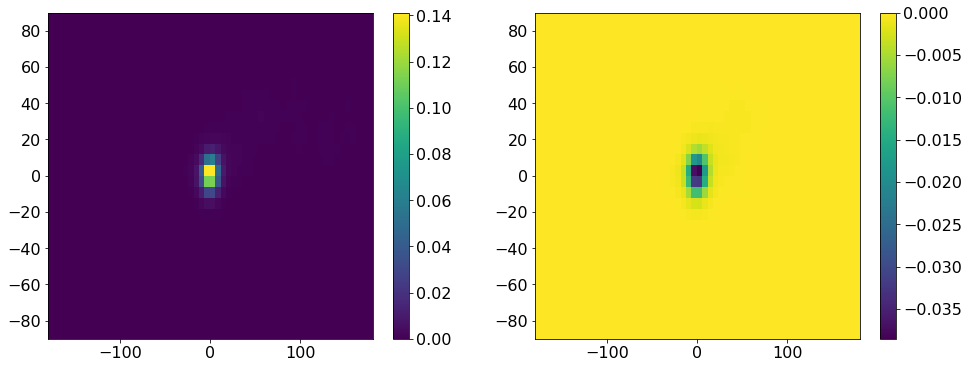

Convolving Delta image, iteration 143



Finding maximum acceleration parameter, iteration 143
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 143
Saving new map, and fitted parameters, iteration 143
Calculating Delta image, iteration 144, numerator


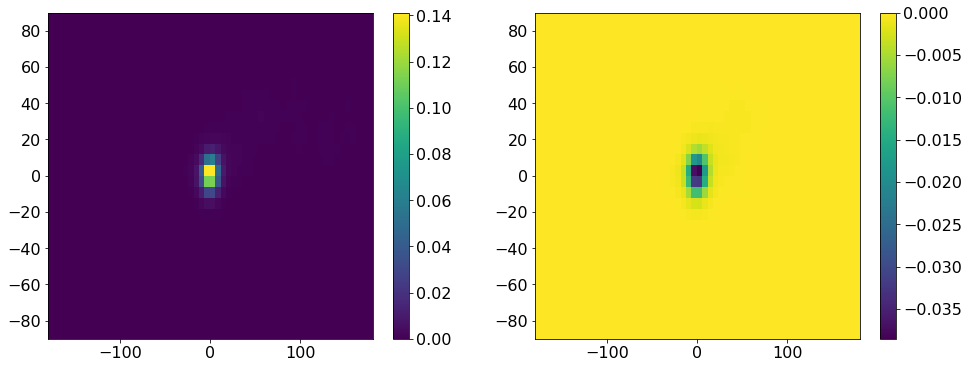

Convolving Delta image, iteration 144



Finding maximum acceleration parameter, iteration 144
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 144
Saving new map, and fitted parameters, iteration 144
Calculating Delta image, iteration 145, numerator


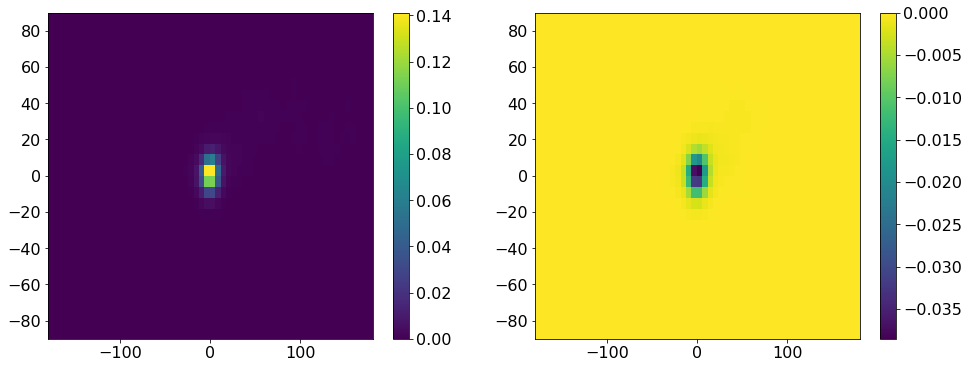

Convolving Delta image, iteration 145



Finding maximum acceleration parameter, iteration 145
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 145
Saving new map, and fitted parameters, iteration 145
Calculating Delta image, iteration 146, numerator


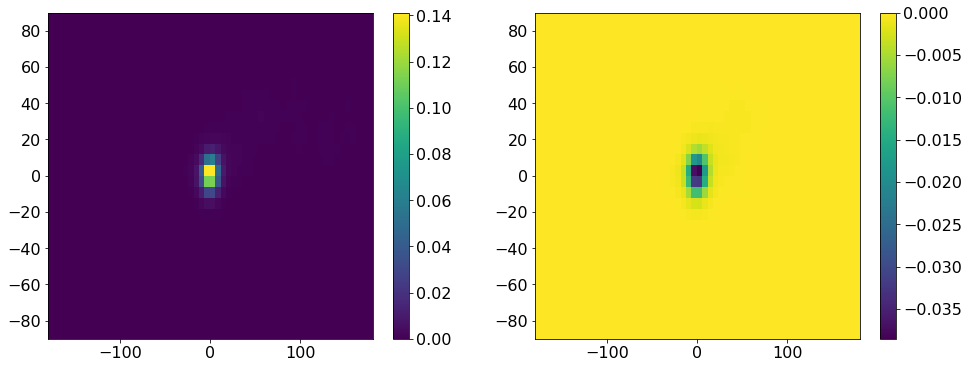

Convolving Delta image, iteration 146



Finding maximum acceleration parameter, iteration 146
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 146
Saving new map, and fitted parameters, iteration 146
Calculating Delta image, iteration 147, numerator


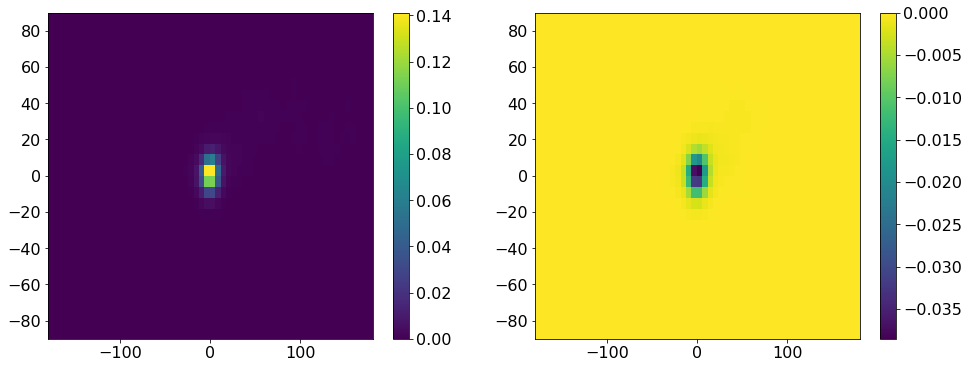

Convolving Delta image, iteration 147



Finding maximum acceleration parameter, iteration 147
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 147
Saving new map, and fitted parameters, iteration 147
Calculating Delta image, iteration 148, numerator


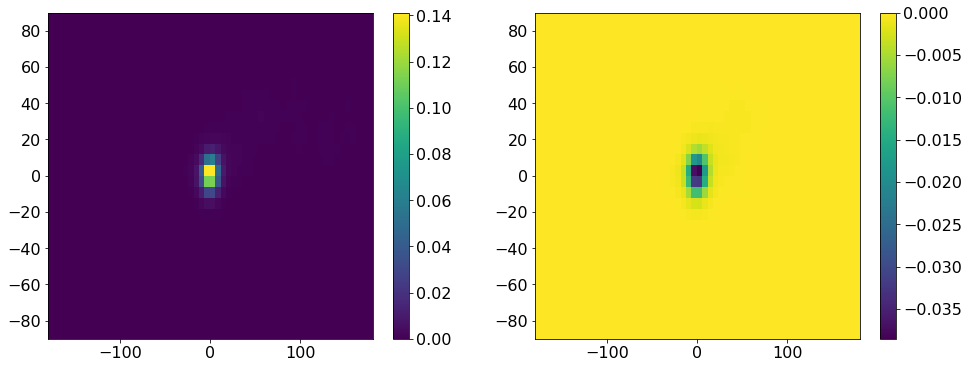

Convolving Delta image, iteration 148



Finding maximum acceleration parameter, iteration 148
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 148
Saving new map, and fitted parameters, iteration 148
Calculating Delta image, iteration 149, numerator


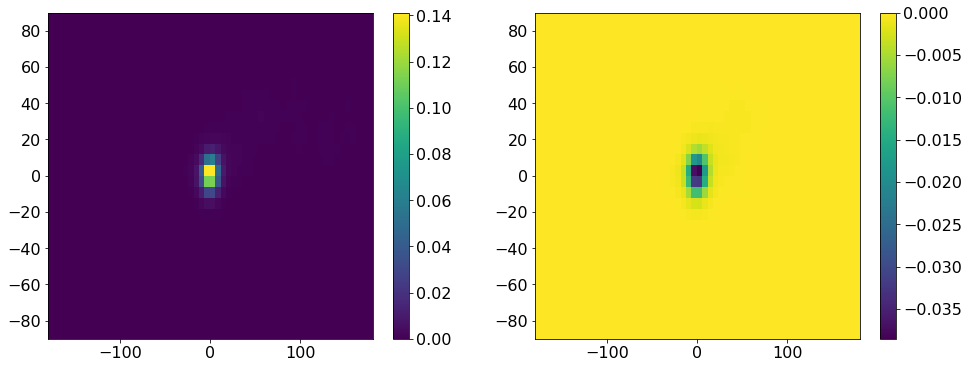

Convolving Delta image, iteration 149



Finding maximum acceleration parameter, iteration 149
Maximum acceleration parameter found:  1.686
Fitting delta-map in addition to old map, iteration 149
Saving new map, and fitted parameters, iteration 149

Initial log joint probability = -855408
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       -855264      0.112629       5.87896      0.1044           1       27   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      38       -855264      0.665893     0.0372153           1           1       51   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance
Initial log joint probability = -855053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       -854860      0.595633        34.237           1           1       22   
    Iter      log prob        ||dx||      ||grad||      

In [48]:
# Experiment with these variables!
#############################
# initial map (isotropic flat, small value)
map_init = IsoMap(L_ARR, B_ARR, 0.01)

# number of RL iterations, Usually test with ~150 iterations. 
iterations = 150 

# acceleration parameter
afl_scl = 1000.
#############################


## Define background (to be sure it's the same as before)
bg_cuts, idx_arr, Ncuts = background1.bg_cuts, background1.idx_arr, background1.Ncuts
 
    
## Save intermediate iterations: initialise arrays to save images and other parameters
# maps per iteration
map_iterations = np.zeros((n_b, n_l, iterations))

# likelihood of maps (vs. initial i.e. basically only background)
map_likelihoods = np.zeros(iterations)

# fit likelihoods, ie fit quality
intermediate_lp = np.zeros(iterations)

# acceleration parameters (lambda)
acc_par = np.zeros(iterations)

# fitted background parameters 
bg_pars = np.zeros((iterations,Ncuts))


## Zeroth iteration: copy initial map to become the 'old map' (see below)
map_old = map_init

# cf. Knoedlseder+1997 what the values denominator etc are
# this is the response R summed over the CDS and the time bins
denominator = expo_map

# zeroth iteration is then just the initial map
map_iterations[:,:,0] = map_old#[]

# convolve this map with the response
expectation_init = 0
print('Convolving with response (init expectation), iteration 0')
for i in tqdm(range(n_b)):
    for j in range(n_l):
        expectation_init += sky_response_scaled[:,i,j,:]*map_init[i,j]

# set old expectation (in data space bins) to new expectation (convolved image)
expectation_old = expectation_init

### now we have the expectation of the image. Need to go to the BG 
        
###########################################################
###########################################################
## here run over the number of iterations #################
###########################################################
## the time for the convolutions is very large ############
## this can be 10 minutes (!) per iteration ###############
## this should be tested for a few iterations #############
## and then run overnight or similar ######################
###########################################################
###########################################################
for its in tqdm(range(1,iterations)):
    
    # setting the map to zero where we selected a bad exposure (we didn't, but to keep it general)
    map_old[bad_expo[0],bad_expo[1]] = 0
    
    # check for each pixel to be finite
    map_old[np.where(np.isnan(map_old) == True)] = 0
    
    # make new background for the next iteration
    bg_cuts, idx_arr, Ncuts = background1.bg_cuts, background1.idx_arr, background1.Ncuts
    
    # temporary background model
    tmp_model_bg = np.zeros((d2h,background1.bg_model_reduced[ebin].shape[1]))
    
    # there could be something different for the first iteration (here it isn't, same function call)
    if its == 1:
        for g in range(d2h):
            tmp_model_bg[g,:] = background_model[g,:]*fitted_bg[idx_arr-1][g]
    else:
        for g in range(d2h):
            tmp_model_bg[g,:] = background_model[g,:]*fitted_bg[idx_arr-1][g]
            
    # expectation (in data space) is the image (expectation_old) plus the background (tmp_model_bg)
    expectation_tot_old = expectation_old + tmp_model_bg 

    # calculate likelihood of currect total expectation
    map_likelihoods[its-1] = cashstat(dataset.ravel(),expectation_tot_old.ravel())
    
    # calculate numerator of RL algorithm
    numerator = 0
    print('Calculating Delta image, iteration '+str(its)+', numerator')
    for i in tqdm(range(d2h)):
        for j in range(dataset.shape[1]):
            numerator += (dataset[i,j]/expectation_tot_old[i,j]-1)*sky_response_scaled[i,:,:,j]
    
    # calculate delta map (denominator scaled by fourth root to avoid exposure edge effects)
    # You can try changing 0.25 to 0, 0.5, for example
    delta_map_tot_old = (numerator/denominator)*map_old*(denominator)**0.25
    
    # Alternatively, you can also try to smooth it 
    #delta_map_tot_old = gaussian_filter(delta_map_tot_old, 0.5)
    
    #################################
    
    
    
    # check again for finite values and zero our bad exposure regions
    nan_idx = np.where(np.isnan(delta_map_tot_old) == 1)
    delta_map_tot_old[nan_idx[0],nan_idx[1]] = 0
    delta_map_tot_old[bad_expo[0],bad_expo[1]] = 0

    # plot each iterations and its delta map 
    # (not required, but nice to see how the algorithm is doing)
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    plt.pcolormesh(L_ARRg,B_ARRg,np.roll(map_old, axis=1, shift=0)) 
    plt.colorbar()

    plt.subplot(122)
    plt.pcolormesh(L_ARRg,B_ARRg,np.roll(delta_map_tot_old, axis=1, shift=0)) 
    plt.colorbar()
    plt.show()
    
    # convolve delta image
    print('Convolving Delta image, iteration '+str(its))
    conv_delta_map_tot = 0
    for i in tqdm(range(n_b)):
        for j in range(n_l):
            conv_delta_map_tot += sky_response_scaled[:,i,j,:]*delta_map_tot_old[i,j]
    
    # find maximum acceleration parameter to multiply delta image with
    # so that the total image is still positive everywhere
    print('Finding maximum acceleration parameter, iteration '+str(its))
    try:
        len_arr = []
        for i in range(0,10000):
            len_arr.append(len(np.where((map_old+delta_map_tot_old*i/afl_scl) < 0)[0]))
        len_arr = np.array(len_arr)
        afl = np.max(np.where(len_arr == 0)[0])
        print('Maximum acceleration parameter found: ',afl/afl_scl)

        
        # fit delta map and current map to speed up RL algorithm
        print('Fitting delta-map in addition to old map, iteration '+str(its))
        # dictionary for data set and prior
        # note that here the value for N should be your response CDS dimension
        # should be last dimension of the scaled response thing (change to your value)
        data_multimap = dict(N = dataset.shape[1],
                     Nh = d2h,
                     Ncuts = Ncuts,
                     Nsky = 2,
                     acceleration_factor_limit=afl*0.95,
                     bg_cuts = bg_cuts,
                     bg_idx_arr = idx_arr,
                     y = dataset.ravel().astype(int),
                     bg_model = tmp_model_bg,
                     conv_sky = np.concatenate([[expectation_old],[conv_delta_map_tot/afl_scl]]),
                     mu_flux = np.array([1,afl/2]),
                     sigma_flux = np.array([1e-2,afl]),
                     mu_Abg = fitted_bg,    # can play with this
                     sigma_Abg = fitted_bg) # can play with this

        # fit;
        # initial values for fit (somewhat sensitive here with COSI data)
        init = {}
        init['flux'] = np.array([1.,afl/2.])
        init['Abg'] = np.repeat(fitted_bg, Ncuts) # can play with this
        
        # fit: might take some time but it shouldn't be more than a minute
        op2D = model_multimap.optimizing(data=data_multimap,init=init,as_vector=False,verbose=True,
                                                tol_rel_grad=1e3,tol_obj=1e-20)

        # save values
        print('Saving new map, and fitted parameters, iteration '+str(its))
        intermediate_lp[its-1] = op2D['value']
        acc_par[its-1] = op2D['par']['flux'][1]
        bg_pars[its-1,:] = op2D['par']['Abg']
  
        # make new map as old map plus scaled delta map
        map_new = map_old+op2D['par']['flux'][1]*delta_map_tot_old/afl_scl
    
        # same with expectation (data space)
        expectation_new = expectation_old + op2D['par']['flux'][1]*conv_delta_map_tot/afl_scl
        

    except:
        # if the fit failed...
        # this shouldn't happen too often (or at all)
        print('############## Fit failed! proceeding without acceleration ##############')
        map_new = map_old + delta_map_tot_old
        expectation_new = expectation_old + conv_delta_map_tot
    
    # check finite values again
    if its == 1:
        bad_index_init = np.where(np.isnan(map_new) == True)
    
    # also here
    map_new[bad_expo[0],bad_expo[1]] = 0
    map_new[np.where(np.isnan(map_new) == True)] = 0
    map_iterations[:,:,its] = map_new

    # swap maps
    map_old = map_new
    
    # and expectations
    expectation_old = expectation_new
    
    # and repeat


## Plot the fitted background parameter and the map flux

Text(0, 0.5, 'Flux')

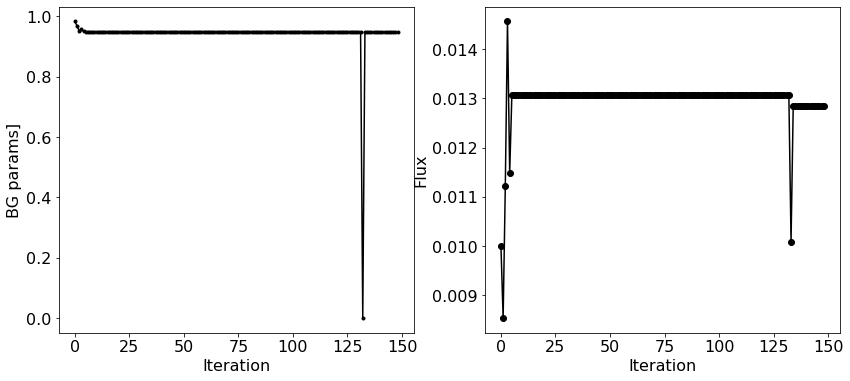

In [49]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(range(its), [i[0] for i in bg_pars[:its]], '.-')
plt.xlabel('Iteration')
plt.ylabel('BG params]')


plt.subplot(122)
map_fluxes = np.zeros(its)
for i in range(its):
    map_fluxes[i] = np.sum(map_iterations[:,:,i]*domega)
    
plt.plot(map_fluxes[:its],'o-')
plt.xlabel('Iteration')
plt.ylabel('Flux')# [ph/keV]')

## Did the algorithm converge? Look at the likelihoods.
intermediate_lp: Fit likelihoods, i.e. fit quality

map_likelihoods: likelihood of maps (vs. initial i.e. basically only background)

Text(0, 0.5, 'likelihood (map_likelihoods)')

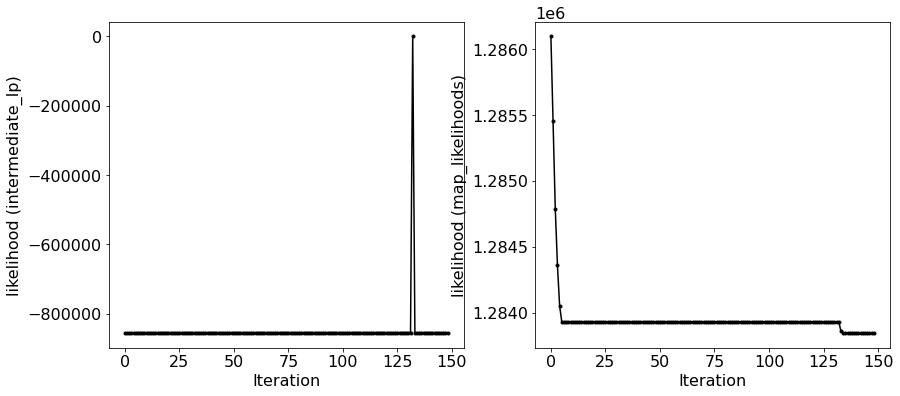

In [50]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(range(its+1)[:-1], intermediate_lp[:its+1][:-1], '.-')
plt.xlabel('Iteration')
plt.ylabel('likelihood (intermediate_lp)')

plt.subplot(122)
plt.plot(range(its+1)[:-1], map_likelihoods[:its+1][:-1], '.-')
plt.xlabel('Iteration')
plt.ylabel('likelihood (map_likelihoods)')


## Make the image!
You can loop over all iterations to make a GIF or just show one iteration (usually the final iteration).

In [51]:
from IPython.display import Image
from IPython.display import Video
from tqdm.autonotebook import tqdm

from matplotlib import animation

from matplotlib import colors

from scipy.ndimage import gaussian_filter as smooth

In [52]:
# Choose an image to plot
idx = its 


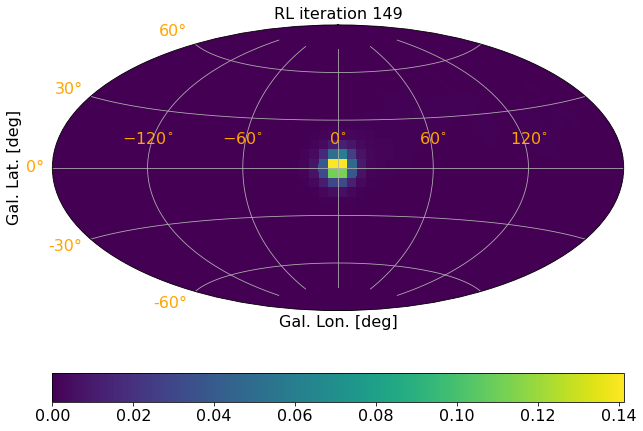

In [53]:
# Choose a color map like viridis (matplotlib default), nipy_spectral, twilight_shifted, etc. Not jet.
cmap = plt.get_cmap('viridis') 

# Bad exposures will be gray
cmap.set_bad('lightgray')


##################
# Select here which pixels should be gray
map_iterations_nan = np.copy(map_iterations)

# Select also non-zero exposures here to be gray (avoiding the edge effects)
# You can play with this. Most success in testing with 1e4, 1e3
bad_expo = np.where(expo_map/domega <= 1e4) 

for i in range(iterations):
    map_iterations_nan[bad_expo[0], bad_expo[1], i] = np.nan
#################    


# Set up the plot
fig, ax = plt.subplots(figsize=(10.24,7.68), subplot_kw={'projection':'aitoff'}, nrows=1, ncols=1)

ax.set_xticks(np.array([-120,-60,0,60,120])*deg2rad)
ax.set_xticklabels([r'$-120^{\circ}$'+'\n',
                            r'$-60^{\circ}$'+'\n',
                            r'$0^{\circ}$'+'\n',
                            r'$60^{\circ}$'+'\n',
                            r'$120^{\circ}$'+'\n'])
ax.tick_params(axis='x', colors='orange')

ax.set_yticks(np.array([-60,-30,0,30,60])*deg2rad)
ax.tick_params(axis='y', colors='orange')

plt.xlabel('Gal. Lon. [deg]')
plt.ylabel('Gal. Lat. [deg]')



# "ims" is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []


# If you want to make a GIF of all iterations:
#for i in range(iterations):

# If you only want to plot one image:
for i in [idx]:

    ttl = plt.text(0.5, 1.01, f'RL iteration {i}', horizontalalignment='center', 
                   verticalalignment='bottom', transform=ax.transAxes)
    
    # Either gray-out bad exposure (map_iterations_nan) or don't mask (map_iterations)
    # Masking out bad exposure 
    #image = map_iterations_nan[:, :, i]
    image = map_iterations[:, :, i]

    
    img = ax.pcolormesh(L_ARRg*deg2rad,B_ARRg*deg2rad,
                        
                        # Can shift the image along longitude. Here, no shift.
                        np.roll(image, axis=1, shift=0),
            
                        # Optionally smooth with gaussian filter
                        #smooth(np.roll(image, axis=1, shift=0), 0.75/pixel_size),
                        
                        cmap=plt.cm.viridis,
                        
                        # Optionally set the color scale. Default: linear
                        #norm=colors.PowerNorm(0.33)
                       )
    ax.grid()
    
    ims.append([img, ttl])

cbar = fig.colorbar(img, orientation='horizontal')
#cbar.ax.set_xlabel(r'Flux [10$^{-2}$ ph cm$^{-2}$ s$^{-1}$]')
    

# Can save a sole image as a PDF 
#plt.savefig(data_dir + f'images/511keV_RL_image_iteration{idx}.pdf', bbox_inches='tight')
    
    
# # Can save all iterations as a GIF
# ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=0)
# ani.save(f'/home/jacqueline/511keV_RL_image_{idx}iterations.gif')


# What do we see?

We clearly see the "bulge" emission of positron-electron annihilation at the center of the Milky Way. This was also seen in the published image of real COSI-balloon flight data [(Siegert et al. 2020)](https://iopscience.iop.org/article/10.3847/1538-4357/ab9607/meta):

![COSI 511 keV spectrum (Siegert et al. 2020)](Siegert_2020_COSI_511keV.png)


The extended disk emission seen in the SPI image above is not visible here. This is expected; SPI saw about 1 photon per week from the disk and has over a decade of observation time. There is not enough data in the 46-day balloon flight to image the disk.

However, we can still probe the emission morphology of the bulge by fitting a 2-D Gaussian, for example, to our simulated image. Constraining the parameters of this fit is important for modeling the physics (positron propogation, point sources of positrons, etc.) behind this enduring mystery.  

## Fit a 2D Gaussian to the emission

In [54]:
def gauss_2d(xtuple, A, x0, y0, sigma_x, sigma_y, theta):
    # theta: rotate the blob by positive, counterclockwise angle theta
    (x, y) = xtuple
    x0 = float(x0)
    y0 = float(y0)
    a = np.cos(theta)**2/(2*sigma_x**2) + np.sin(theta)**2/(2*sigma_y**2)
    b = np.sin(2*theta)/(4*sigma_x**2) - np.sin(2*theta)/(4*sigma_y**2)
    c = np.sin(theta)**2/(2*sigma_x**2) + np.cos(theta)**2/(2*sigma_y**2)
    tot = A*np.exp( -( a*(x-x0)**2 + 2*b*(x-x0)*(y-y0) + c*(y-y0)**2 ) )
    return tot.ravel()

In [55]:
import scipy.optimize as opt
initial_guess = (2, 0, 0, 10, 10, 4)
x = (L_ARRg*deg2rad)[:-1, :-1]
y = (B_ARRg*deg2rad)[:-1, :-1]
z = map_iterations_nan[:,:,idx]
nan = np.isnan(z)
z[nan] = 0.
popt, pcov = opt.curve_fit(gauss_2d, (x, y), z.ravel(), p0=initial_guess)

im_fitted = gauss_2d((x, y), *popt)

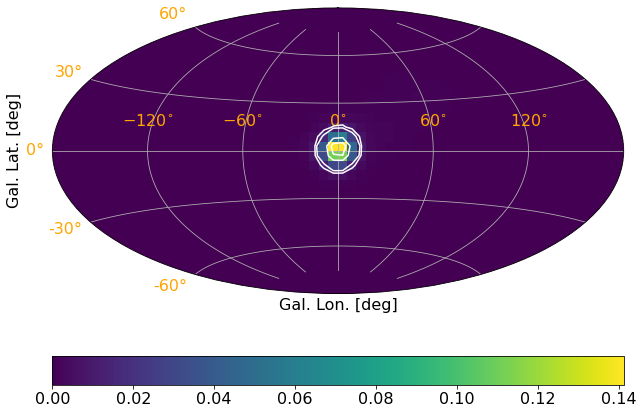

In [56]:
fig, ax = plt.subplots(figsize=(10.24,7.68),subplot_kw={'projection':'aitoff'},nrows=1,ncols=1)

ax.set_xticks(np.array([-120,-60,0,60,120])*deg2rad)
ax.tick_params(axis='x', colors='orange')
ax.set_xticklabels([r'$-120^{\circ}$'+'\n',
                            r'$-60^{\circ}$'+'\n',
                            r'$0^{\circ}$'+'\n',
                            r'$60^{\circ}$'+'\n',
                            r'$120^{\circ}$'+'\n'])
ax.set_yticks(np.array([-60,-30,0,30,60])*deg2rad)
ax.tick_params(axis='y', colors='orange')

ax.set_xlabel('Gal. Lon. [deg]')
ax.set_ylabel('Gal. Lat. [deg]')

# Plot original image
ax.pcolormesh(L_ARRg*deg2rad, B_ARRg*deg2rad, z.reshape(len(x), len(x[0])), cmap=plt.cm.viridis)

# Plot contours
num_contours = 2
levels = [np.max(im_fitted)*0.05, np.max(im_fitted)*0.1,
          np.max(im_fitted)*0.5, np.max(im_fitted)*0.8]

#plt.contour(x, y, im_fitted.reshape(len(x), len(x[0])), levels=num_contours, colors='w')

plt.contour(L_ARR*deg2rad, B_ARR*deg2rad, im_fitted.reshape(len(x), len(x[0])), levels = levels, colors='white')

cbar = fig.colorbar(img, orientation='horizontal')
#cbar.ax.set_xlabel(r'Flux [10$^{-2}$ ph cm$^{-2}$ s$^{-1}$]')
    
ax.grid()

In [57]:
print('A:', popt[0])
print('x0 [deg]:', popt[1]*180/np.pi)
print('y0 [deg]:', popt[2]*180/np.pi)
print('sigma_x [deg]:', popt[3]*180/np.pi, '--> FWHM_x [deg]:', 2*np.sqrt(2*np.log(2))*popt[3]*180/np.pi)
print('sigma_y [deg]:', popt[4]*180/np.pi, '--> FWHM_y [deg]:', 2*np.sqrt(2*np.log(2))*popt[4]*180/np.pi)
print('theta [deg]:', popt[5]*180/np.pi)

A: 0.16758952177639594
x0 [deg]: -2.753409989026663
y0 [deg]: -1.803001831272334
sigma_x [deg]: -5.647750380803288 --> FWHM_x [deg]: -13.299435806046759
sigma_y [deg]: 5.846253258696121 --> FWHM_y [deg]: 13.766874361905135
theta [deg]: 865.5172608146363
